# ==========
# = Iteration #9 =
# ==========

## Stage 1: Planning
The tasks for this stage are:
1. Compose the project team
2. Set the research question
3. Schedule all review meeting to ensure iterations are time-boxed.

### 8.1.1. Compose the project team
The project team and Clinical Review Board are CMI and CB.

### 8.1.2. Set the research question
The research question is:

_How does changing the inclusion criteria affect the output of the sequence-mining investigation?_

I only include patient diagnosed before 2000, and I only view their sequences after 2010.

Since the previous iteration:
1. the diabetes medications have also been recategorised.
2. a longer sequence of test events and prescription events are studied.
3. the R syntax for generating the cohort, formatting the data, and for creating the STS objects is bundled into a separate R script that is called within this notebook.

### 8.1.3. Schedule all review meeting to ensure iterations are time-boxed
CMI and CB will meet in their regular Thursday-morning meeting, which will now be fortnightly.

## Stage 2: Extraction
This tasks for this stage are:
1. Gather knowledge and insight into the processes under study and the data-generating mechanisms.
2. Obtain data for processing

### 8.2.1. Gather knowledge and insight into the processes under study and the data-generating mechanisms.
Regarding the processes under study, I, the modeller, discuss the project during weekly meetings with an experienced GP who is a professor of primary medical care.
Regarding data-generating mechanisms, I, the modeller, have gathered knowledge from over half a decade experience collaborating with clinicians and patients on research projects about electronic healthcare 
records. 

### 8.2.2. Obtain data for processing
Data have been obtain by agreement via Connected Bradford. Data are queryable via this Jupyter notebook on the GoogleCloudPlatform using AI Vertex Workbench.

Select which portions of the notebook to run.

In [1]:
# Select which portions of the notebook to run.
# ## Some of these are dependent on others so you might get
# ## warning messages if requisite data aren't available
# ## because a portion of the notebook was skipped.
run_all <- TRUE # {TRUE, FALSE, NA}
run_install <- ifelse( is.na( run_all ), TRUE, run_all )
run_define_cohort <- ifelse( is.na( run_all ), TRUE, run_all )
run_add_stratification_variables <- ifelse( is.na( run_all ), TRUE, run_all )
run_create_sts_objects <- ifelse( is.na( run_all ), TRUE, run_all )
run_process_mining_summary <- ifelse( is.na( run_all ), FALSE, run_all )
run_complexity_statistics <- ifelse( is.na( run_all ), FALSE, run_all )
run_Sankey_plots <- ifelse( is.na( run_all ), TRUE, run_all )
run_laneSwitching_plots <- ifelse( is.na( run_all ), FALSE, run_all )
run_evaluation_rig <- ifelse( is.na( run_all ), FALSE, run_all )

# Get requisite packages.

In [2]:
# Get requisite packages.
if( !"pacman" %in% installed.packages() )
{
  install.packages( "pacman" )
  libray( pacman )
}
pacman::p_load(
    bigrquery # Version ‘1.5.1’
    ,data.table # Version ‘1.16.0’
    ,GGally # Version ‘2.2.1’
    ,gtable # Version ‘0.3.6’
    ,grid # Version ‘4.4.1’
    ,gridExtra # Version ‘2.3’
    ,paletteer # Version ‘1.6.0’
    ,readr # Version ‘2.1.5’
    ,tidytext # Version ‘0.4.2’
    ,tidyverse # Version ‘2.0.0’
    ,TraMineR # Version ‘2.2.10’
    ,TraMineRextras # Version ‘0.6.8’
)
#devtools::install_github("davidsjoberg/ggsankey")
#remove.packages("ggsankey")
devtools::install_github("ciaranmci/ggsankey", force = TRUE )

pillar (1.10.2 -> 1.11.0) [CRAN]


Installing 1 packages: pillar

Installing package into ‘/home/jupyter/.R/library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/var/tmp/Rtmpw83Lud/remotes10bd634b32b1/ciaranmci-ggsankey-3fb514e/DESCRIPTION’ ... OK
* preparing ‘ggsankey’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘ggsankey_0.0.99999.tar.gz’



Installing package into ‘/home/jupyter/.R/library’
(as ‘lib’ is unspecified)



# Generate the cohort.

In [3]:
source('RESHAPE_cohort_generator.r')

Warning message:
“The `check_from` argument of `tbl_sql()` is deprecated as of dbplyr 2.5.0.
ℹ The deprecated feature was likely used in the dbplyr package.
  Please report the issue at <https://github.com/tidyverse/dbplyr/issues>.”
Warning message:
“Missing values are always removed in SQL aggregation functions.
Use `na.rm = TRUE` to silence this warning
This warning is displayed once every 8 hours.”


# Format the data.

In [4]:
source('RESHAPE_format_the_data.r')

`summarise()` has grouped output by 'person_id'. You can override using the
`.groups` argument.


# Create STS objects.

In [5]:
source('RESHAPE_create_STS_objects.r')

# Summary of parameter values.

In [6]:
data.frame(
    row.names = c(
        "The date before which a patient must have had their diagnosis."
        ,"The follow-up delay, in years."
        ,"The follow-up duration, in years."
        ,"The date after which test and intervention records will be studied."
        ,"The date before which test and intervention records will be studied."
        ,"Lower threshold for acceptable values of the test."
        ,"Upper threshold for acceptable values of the test."
        ,"Number of tests, treatments, or iterations after diagnosis that should be tracked."
        ,"The window within which mutimorbidity diagnoses and the index diagnosis must fit in, in months."
        ,"The window outwith which at least two mutimorbidity diagnoses must be of each other, in months."
        )
    ,Value = c(
        date_diagnosis_threshold %>% as.character()
        ,followup_delay_in_years %>% as.character()
        ,followup_duration_in_years %>% as.character()
        ,date_followup_start %>% as.character()
        ,date_followup_end %>% as.character()
        ,test_value_cutoff_lower %>% as.character()
        ,test_value_cutoff_upper %>% as.character()
        ,n_iterations %>% as.character()
        ,multimorb_inclusion_window_months %>% as.character()
        ,multimorb_gap_window_months %>% as.character()
    )
)

Value     
The date before which a patient must have had their diagnosis.                                  2000-01-01
The follow-up delay, in years.                                                                  0         
The follow-up duration, in years.                                                               10        
The date after which test and intervention records will be studied.                             2000-01-01
The date before which test and intervention records will be studied.                            2010-01-01
Lower threshold for acceptable values of the test.                                              20        
Upper threshold for acceptable values of the test.                                              200       
Number of tests, treatments, or iterations after diagnosis that should be tracked.              20        
The window within which mutimorbidity diagnoses and the index diagnosis must fit in, in months. 60        
The window outwith which at least two mutimorbidity diagnoses must be of each other, in months. 1

## Stage 4: Mining and analysis
This tasks for this stage are:
1. Discover / Mine process models
2. Build simulation models
3. Design and test model evaluation rig
4. Set up and/or update the evidence template

### 8.4.1 Discover / Mine process models       
This iterations analysis will focus on various data-processing steps for 'trajectory' mining without using process-mining or sequence-pattern mining R packages. Instead, I will only use `TraMineR`.

Plot the top-10 most-frequent patient journeys.

In [112]:
if ( run_process_mining_summary )
    {
        TraMineR::seqtab( sts_seqmine ) %>%
        attributes() %>%
        purrr::pluck( "freq" ) %>%
        tibble::rownames_to_column( "sequence" ) %>%
        dplyr::arrange( desc( Freq ) ) %>%
        dplyr::mutate( cum_sum_percent = cumsum( Percent ) ) %>%
        # Remove the leading "None/[0-9]"
        dplyr::mutate_at(
            .vars = vars( sequence )
            ,.funs = funs( stringr::str_replace_all( ., "None/[0-9]*-", "" ) )
            ) %>%
        # Replace the "-" that joins the events with an arrow.
        dplyr::mutate_at(
            .vars = vars( sequence )
            ,.funs = funs( stringr::str_replace_all( ., "-", " \u2192 " ) )
            ) %>%
        # Use words instead of symbols for the number of timesteps.
        dplyr::mutate_at(
            .vars = vars( sequence )
            ,.funs = funs( stringr::str_replace_all( ., "/", " for " ) )
            ) %>%
        # Repalce "Unobserved for [0-9]*" with "End".
        dplyr::mutate_at(
            .vars = vars( sequence )
            ,.funs = funs( stringr::str_replace_all( ., "Unobserved for [0-9]*", "END" ) )
            ) %>%
        suppressWarnings()
    }

sequence                         Freq Percent    cum_sum_percent
1  END                              1226 15.7018443 15.70184       
2  Test Status = Green for 1 → END   134  1.7161885 17.41803       
3  Test Status = Red for 1 → END     125  1.6009221 19.01895       
4  Test Status = Yellow for 1 → END  125  1.6009221 20.61988       
5  Test Status = Amber for 1 → END   117  1.4984631 22.11834       
6  Test Status = Green for 2 → END    67  0.8580943 22.97643       
7  Test Status = Red for 2 → END      56  0.7172131 23.69365       
8  Test Status = Green for 4 → END    40  0.5122951 24.20594       
9  Test Status = Amber for 2 → END    39  0.4994877 24.70543       
10 Test Status = Yellow for 2 → END   39  0.4994877 25.20492

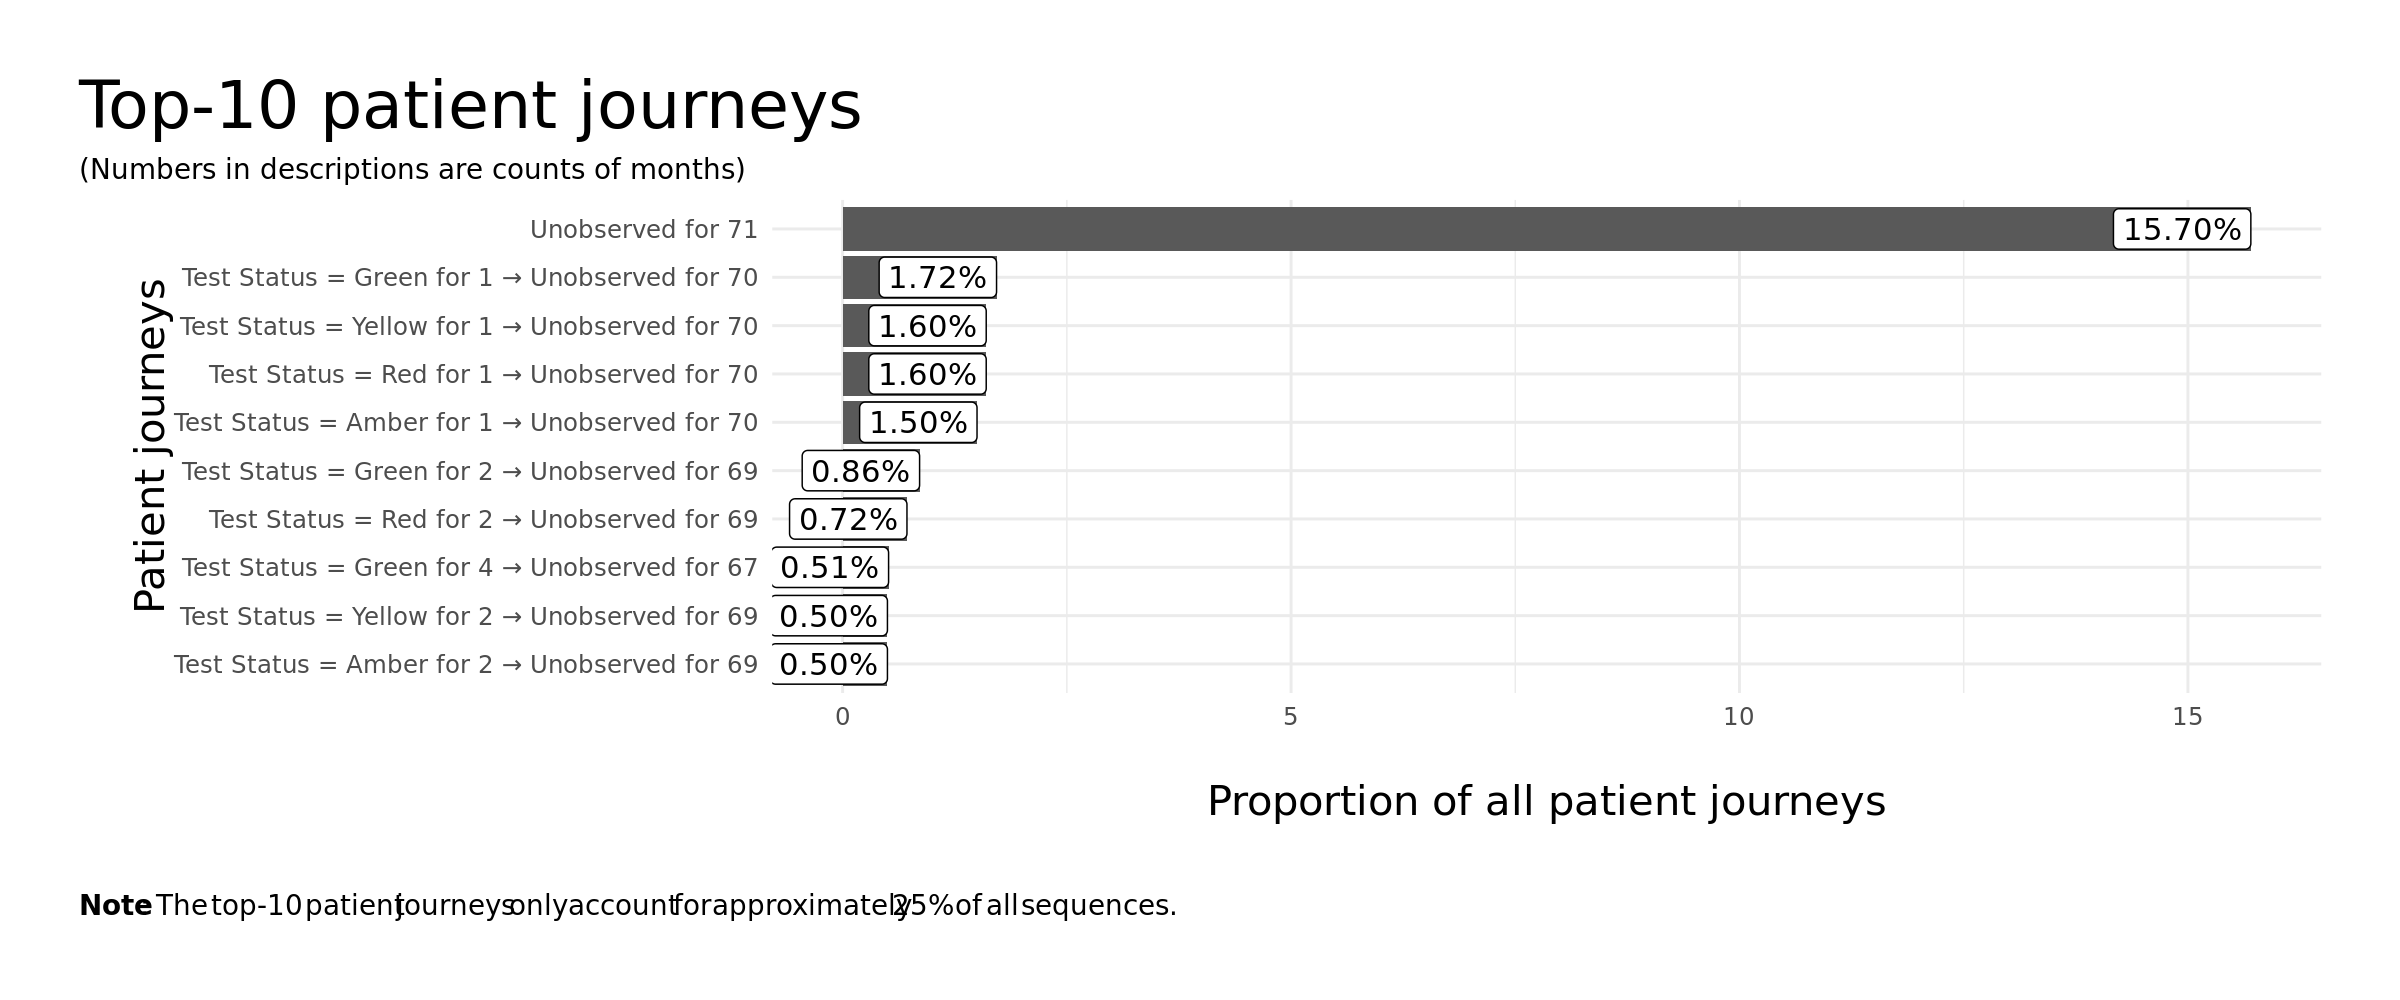

In [113]:
if ( run_process_mining_summary )
    {
        options( repr.plot.width = 12, repr.plot.height = 5, repr.plot.res = 200 )

        # Make plot data.
        plot_data <-
            TraMineR::seqtab( sts_seqmine ) %>%
            attributes() %>%
            purrr::pluck( "freq" ) %>%
            tibble::rownames_to_column( "sequence" ) %>%
            dplyr::arrange( desc( Freq ) ) %>%
            dplyr::mutate( cum_sum_percent = cumsum( Percent ) ) %>%
            # Remove the leading "None/[0-9]"
            dplyr::mutate_at(
                .vars = vars( sequence )
                ,.funs = funs( stringr::str_replace_all( ., "None/[0-9]*-", "" ) )
                ) %>%
            # Replace the "-" that joins the events with an arrow.
            dplyr::mutate_at(
                .vars = vars( sequence )
                ,.funs = funs( stringr::str_replace_all( ., "-", " \u2192 " ) )
                ) %>%
            # Use words instead of symbols for the number of timesteps.
            dplyr::mutate_at(
                .vars = vars( sequence )
                ,.funs = funs( stringr::str_replace_all( ., "/", " for " ) )
                ) %>%
            suppressWarnings()


        # Plot plot data.
        plot_data %>%
            ggplot(
                aes(
                    x = reorder( sequence, Freq )
                    ,y = Percent )
                , stat = "identity"
            ) +
            geom_col() +
            geom_label(
                    aes(
                        label = Percent %>% `/`(100) %>% round(4) %>% scales::percent()
                    )
                    ,hjust = 1 ) +
            coord_flip() +
            labs(
                x = "Patient journeys"
                ,y = "Proportion of all patient journeys"
                ,title = "Top-10 patient journeys"
                ,subtitle = "(Numbers in descriptions are counts of months)"
                ,caption = paste0(
                    "**Note**: The top-10 patient journeys only account for approximately "
                    ,round( max( plot_data$cum_sum_percent ))
                           ,"% of all sequences."
                          )
            ) +
            theme_minimal() +
            theme(
                title = element_text( size = 20 )
                ,plot.subtitle = element_text( size = 10 )
                ,axis.title = element_text( size = 15 )
                ,plot.caption = ggtext::element_markdown( size = 10, hjust = 0 )
                ,plot.caption.position = 'plot'
                ,plot.title.position = 'plot'
                ,legend.position = "none"
                ,plot.margin = unit( c(1, 1, 1, 1), "cm")
                ,axis.title.x = element_text( margin = margin( t = 20, b = 20 ) )
                ,axis.title.y = element_text( margin = margin( r = 20, l = 20, t = 20 ) )
                )
    }

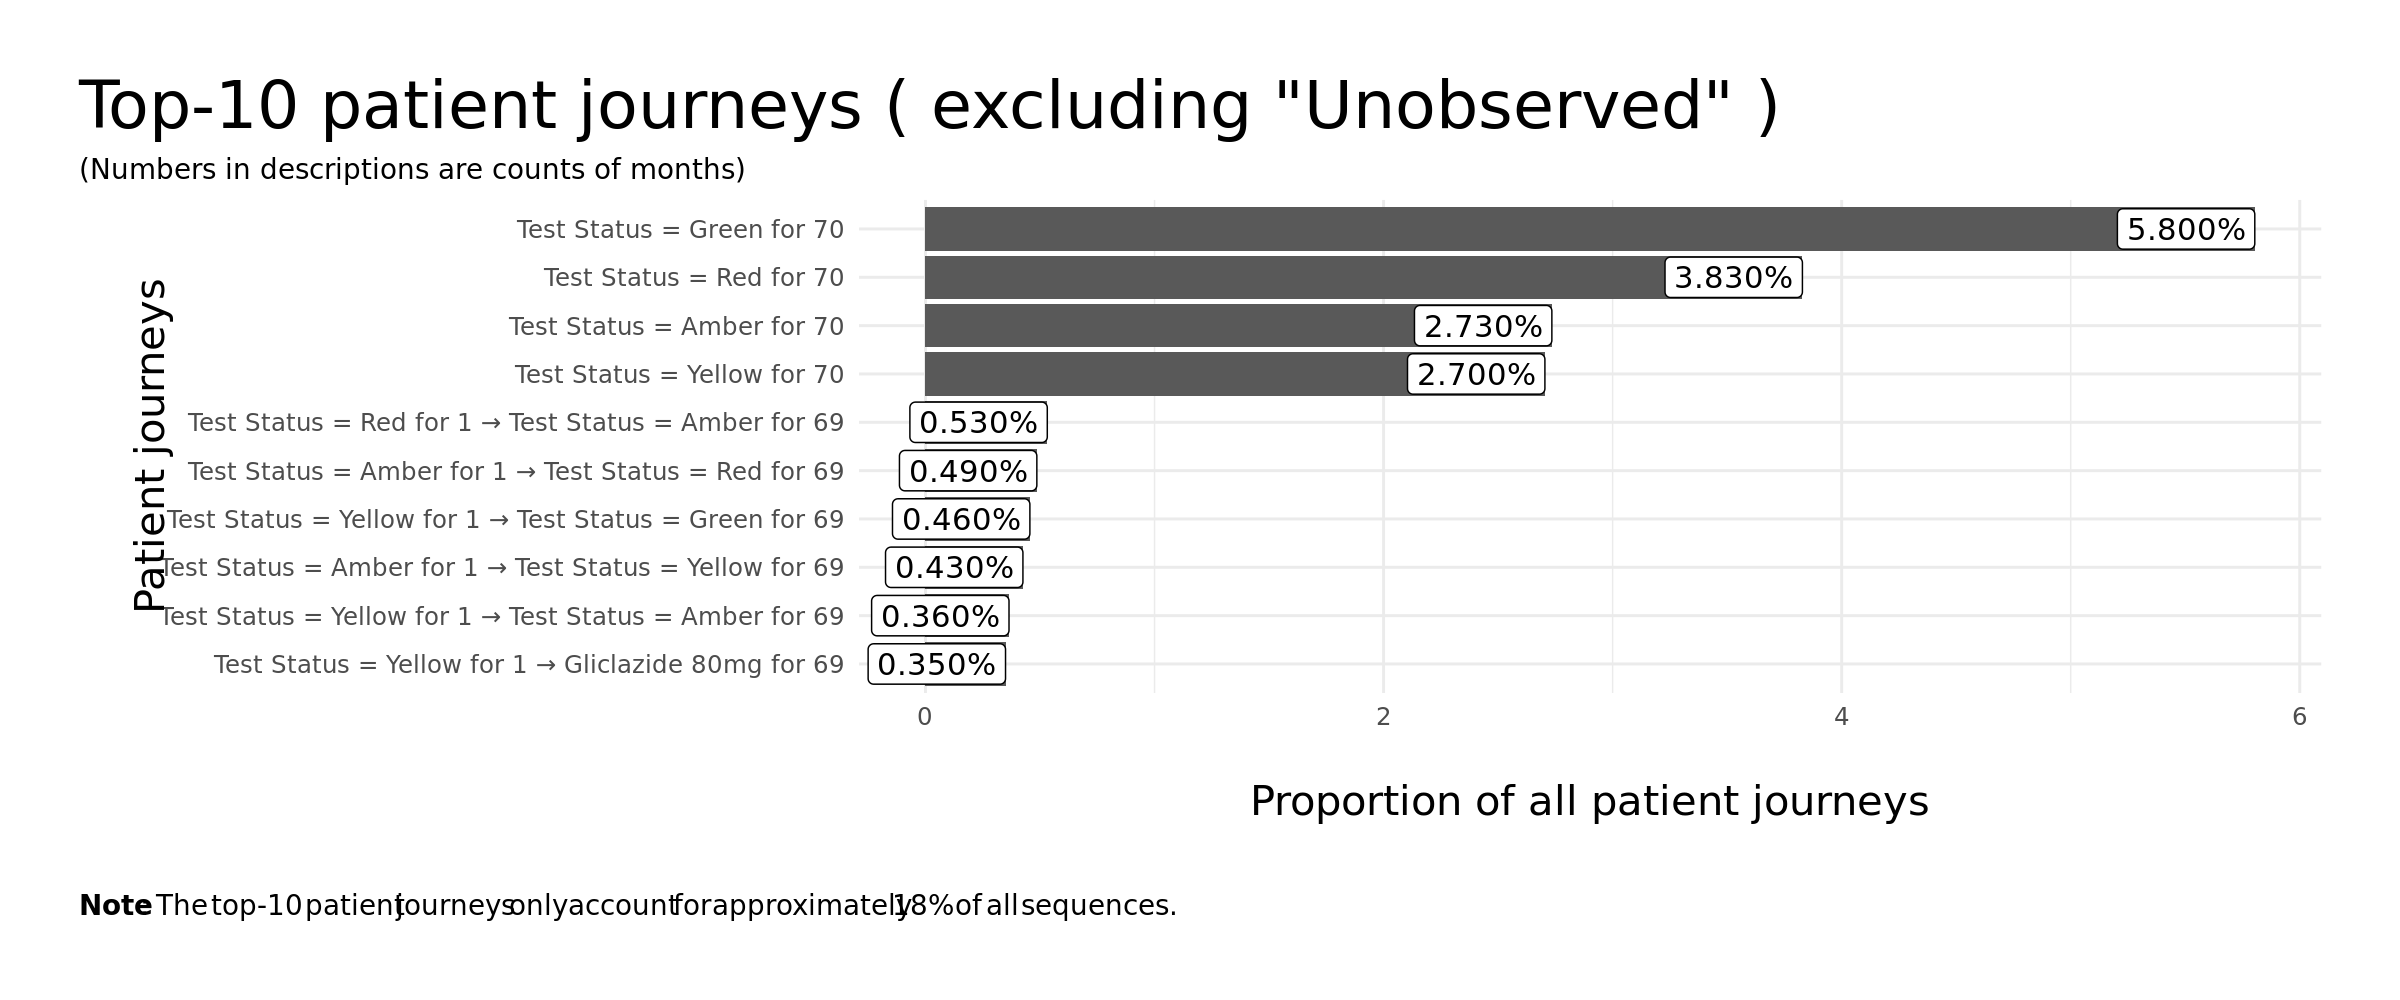

In [114]:
if ( run_process_mining_summary )
    {
        options( repr.plot.width = 12, repr.plot.height = 5, repr.plot.res = 200 )

        # Make plot data.
        plot_data <-
            TraMineR::seqtab( sts_seqmine_excludingUnobserved ) %>%
            attributes() %>%
            purrr::pluck( "freq" ) %>%
            tibble::rownames_to_column( "sequence" ) %>%
            dplyr::arrange( desc( Freq ) ) %>%
            dplyr::mutate( cum_sum_percent = cumsum( Percent ) ) %>%
            # Remove the leading "None/[0-9]"
            dplyr::mutate_at(
                .vars = vars( sequence )
                ,.funs = funs( stringr::str_replace_all( ., "None/[0-9]*-", "" ) )
                ) %>%
            # Replace the "-" that joins the events with an arrow.
            dplyr::mutate_at(
                .vars = vars( sequence )
                ,.funs = funs( stringr::str_replace_all( ., "-", " \u2192 " ) )
                ) %>%
            # Use words instead of symbols for the number of timesteps.
            dplyr::mutate_at(
                .vars = vars( sequence )
                ,.funs = funs( stringr::str_replace_all( ., "/", " for " ) )
                ) %>%
            suppressWarnings()


        # Plot plot data.
        plot_data %>%
            ggplot(
                aes(
                    x = reorder( sequence, Freq )
                    ,y = Percent )
                , stat = "identity"
            ) +
            geom_col() +
            geom_label(
                    aes(
                        label = Percent %>% `/`(100) %>% round(4) %>% scales::percent()
                    )
                    ,hjust = 1 ) +
            coord_flip() +
            labs(
                x = "Patient journeys"
                ,y = "Proportion of all patient journeys"
                ,title = "Top-10 patient journeys ( excluding \"Unobserved\" )"
                ,subtitle = "(Numbers in descriptions are counts of months)"
                ,caption = paste0(
                    "**Note**: The top-10 patient journeys only account for approximately "
                    ,round( max( plot_data$cum_sum_percent ))
                           ,"% of all sequences."
                          )
            ) +
            theme_minimal() +
            theme(
                title = element_text( size = 20 )
                ,plot.subtitle = element_text( size = 10 )
                ,axis.title = element_text( size = 15 )
                ,plot.caption = ggtext::element_markdown( size = 10, hjust = 0 )
                ,plot.caption.position = 'plot'
                ,plot.title.position = 'plot'
                ,legend.position = "none"
                ,plot.margin = unit( c(1, 1, 1, 1), "cm")
                ,axis.title.x = element_text( margin = margin( t = 20, b = 20 ) )
                ,axis.title.y = element_text( margin = margin( r = 20, l = 20, t = 20 ) )
                )
    }

Below are the month-by-month relative propotions of each event.

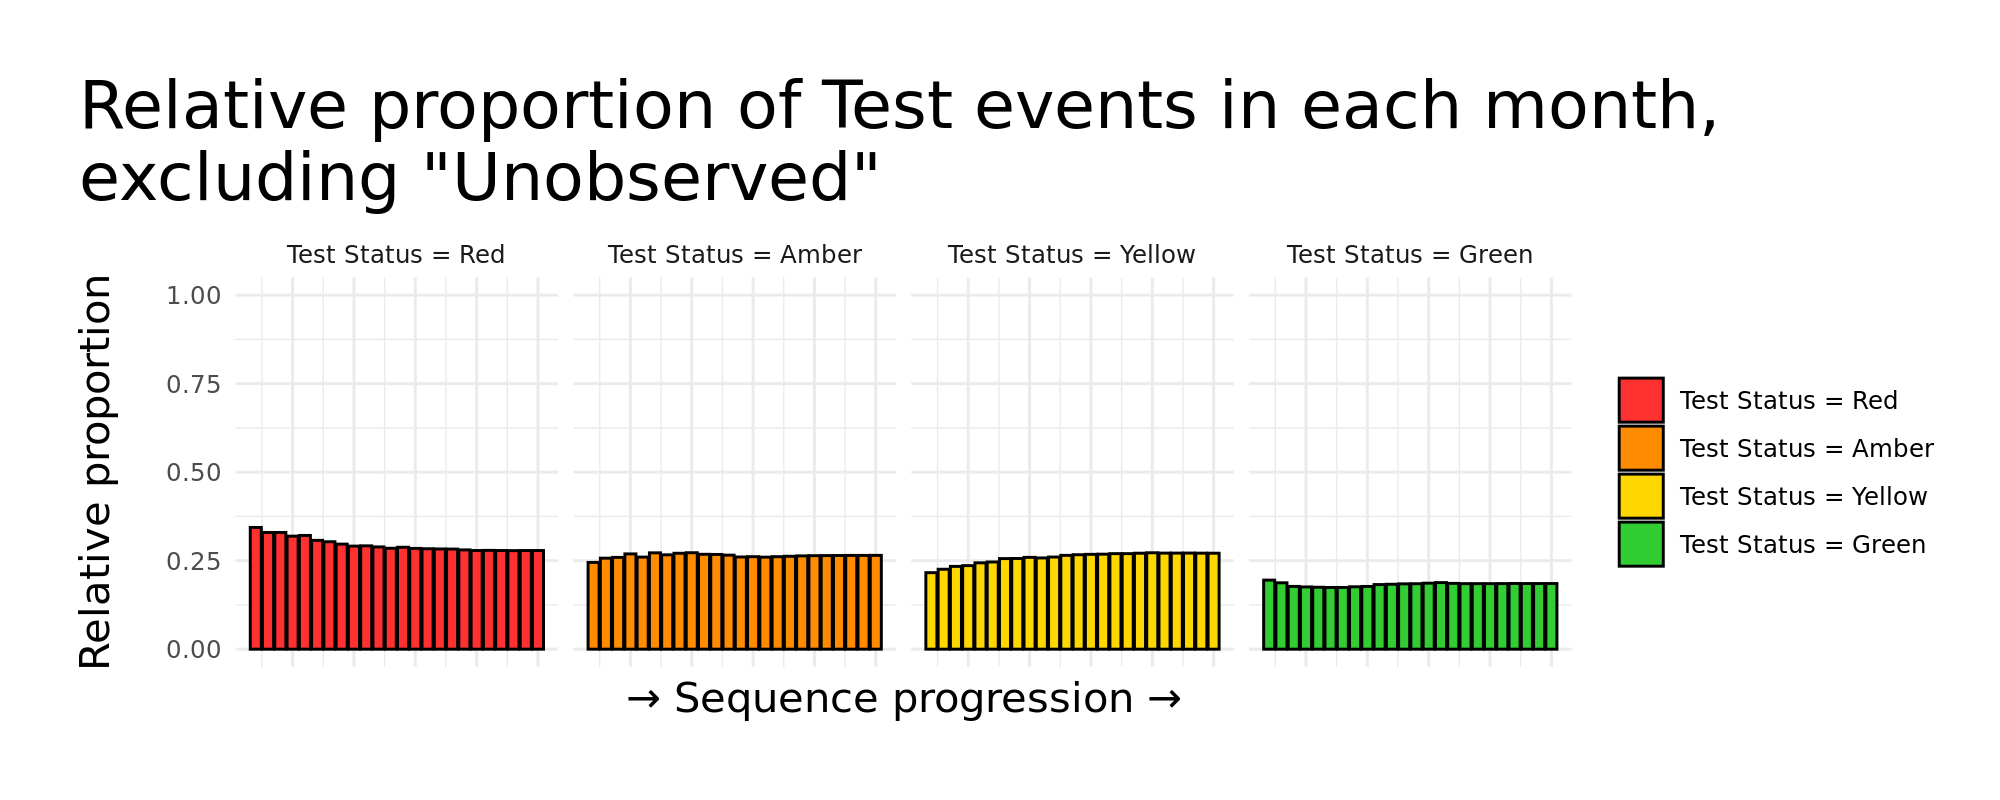

In [115]:
if ( run_process_mining_summary )
    {
    # Prepare plot data.
        plot_data <-
            TraMineR::seqstatd( sts_seqmine_test_only_excludingUnobserved ) %>%
            purrr::pluck( "Frequencies" ) %>%
            as.data.frame() %>%
            tibble::rownames_to_column( "event" ) %>%
            dplyr::filter( !(event %in% c( "None", "Unobserved" ) ) ) %>%
            tidyr::pivot_longer(
                cols = !event
                ,names_to = "month"
                ,values_to = "proportion"
            ) %>%
            dplyr::mutate_at(
                .vars = vars( event )
                ,.funs = funs( factor (., levels = df_event_factor %>% dplyr::select( event_fct_order ) %>% dplyr::pull() ) )
            ) %>%
            dplyr::mutate_at(
                .vars = vars( month )
                ,.funs = funs( stringr::str_replace_all( ., "a", "" ) %>% as.integer() )
            ) %>%
            suppressWarnings()

        # Plotting.
        options( repr.plot.width = 10, repr.plot.height = 4, repr.plot.res = 200 )
        plot_relProp_TestStatuses <-
            plot_data %>%
            ggplot() +
            geom_bar(
                aes(
                    x = month
                    ,y = proportion
                    ,fill = event
                )
                ,stat = "identity"
                ,colour = "black"
            ) +
            facet_wrap( ~ event, nrow = 1) +
            scale_fill_manual( values = df_event_factor %>% dplyr::select( event_colours_order ) %>% dplyr::pull() ) +
            labs(
                x = "\u2192 Sequence progression \u2192"
                ,y = "Relative proportion"
                ,title = "Relative proportion of Test events in each month,\nexcluding \"Unobserved\""
            ) +
            ylim(0, 1) +
            theme_minimal() +
            theme(
                title = element_text( size = 20 )
                ,plot.subtitle = element_text( size = 10 )
                ,axis.title = element_text( size = 15 )
                ,plot.caption = ggtext::element_markdown( size = 10, hjust = 0 )
                ,plot.caption.position = 'plot'
                ,plot.title.position = 'plot'
                ,axis.text.x = element_blank()
                ,legend.title = element_blank()
                ,plot.margin = unit( c(1, 1, 1, 1), "cm")
                ,axis.title.y = element_text( margin = margin( r = 20 ) )
                )

        plot_relProp_TestStatuses
    }

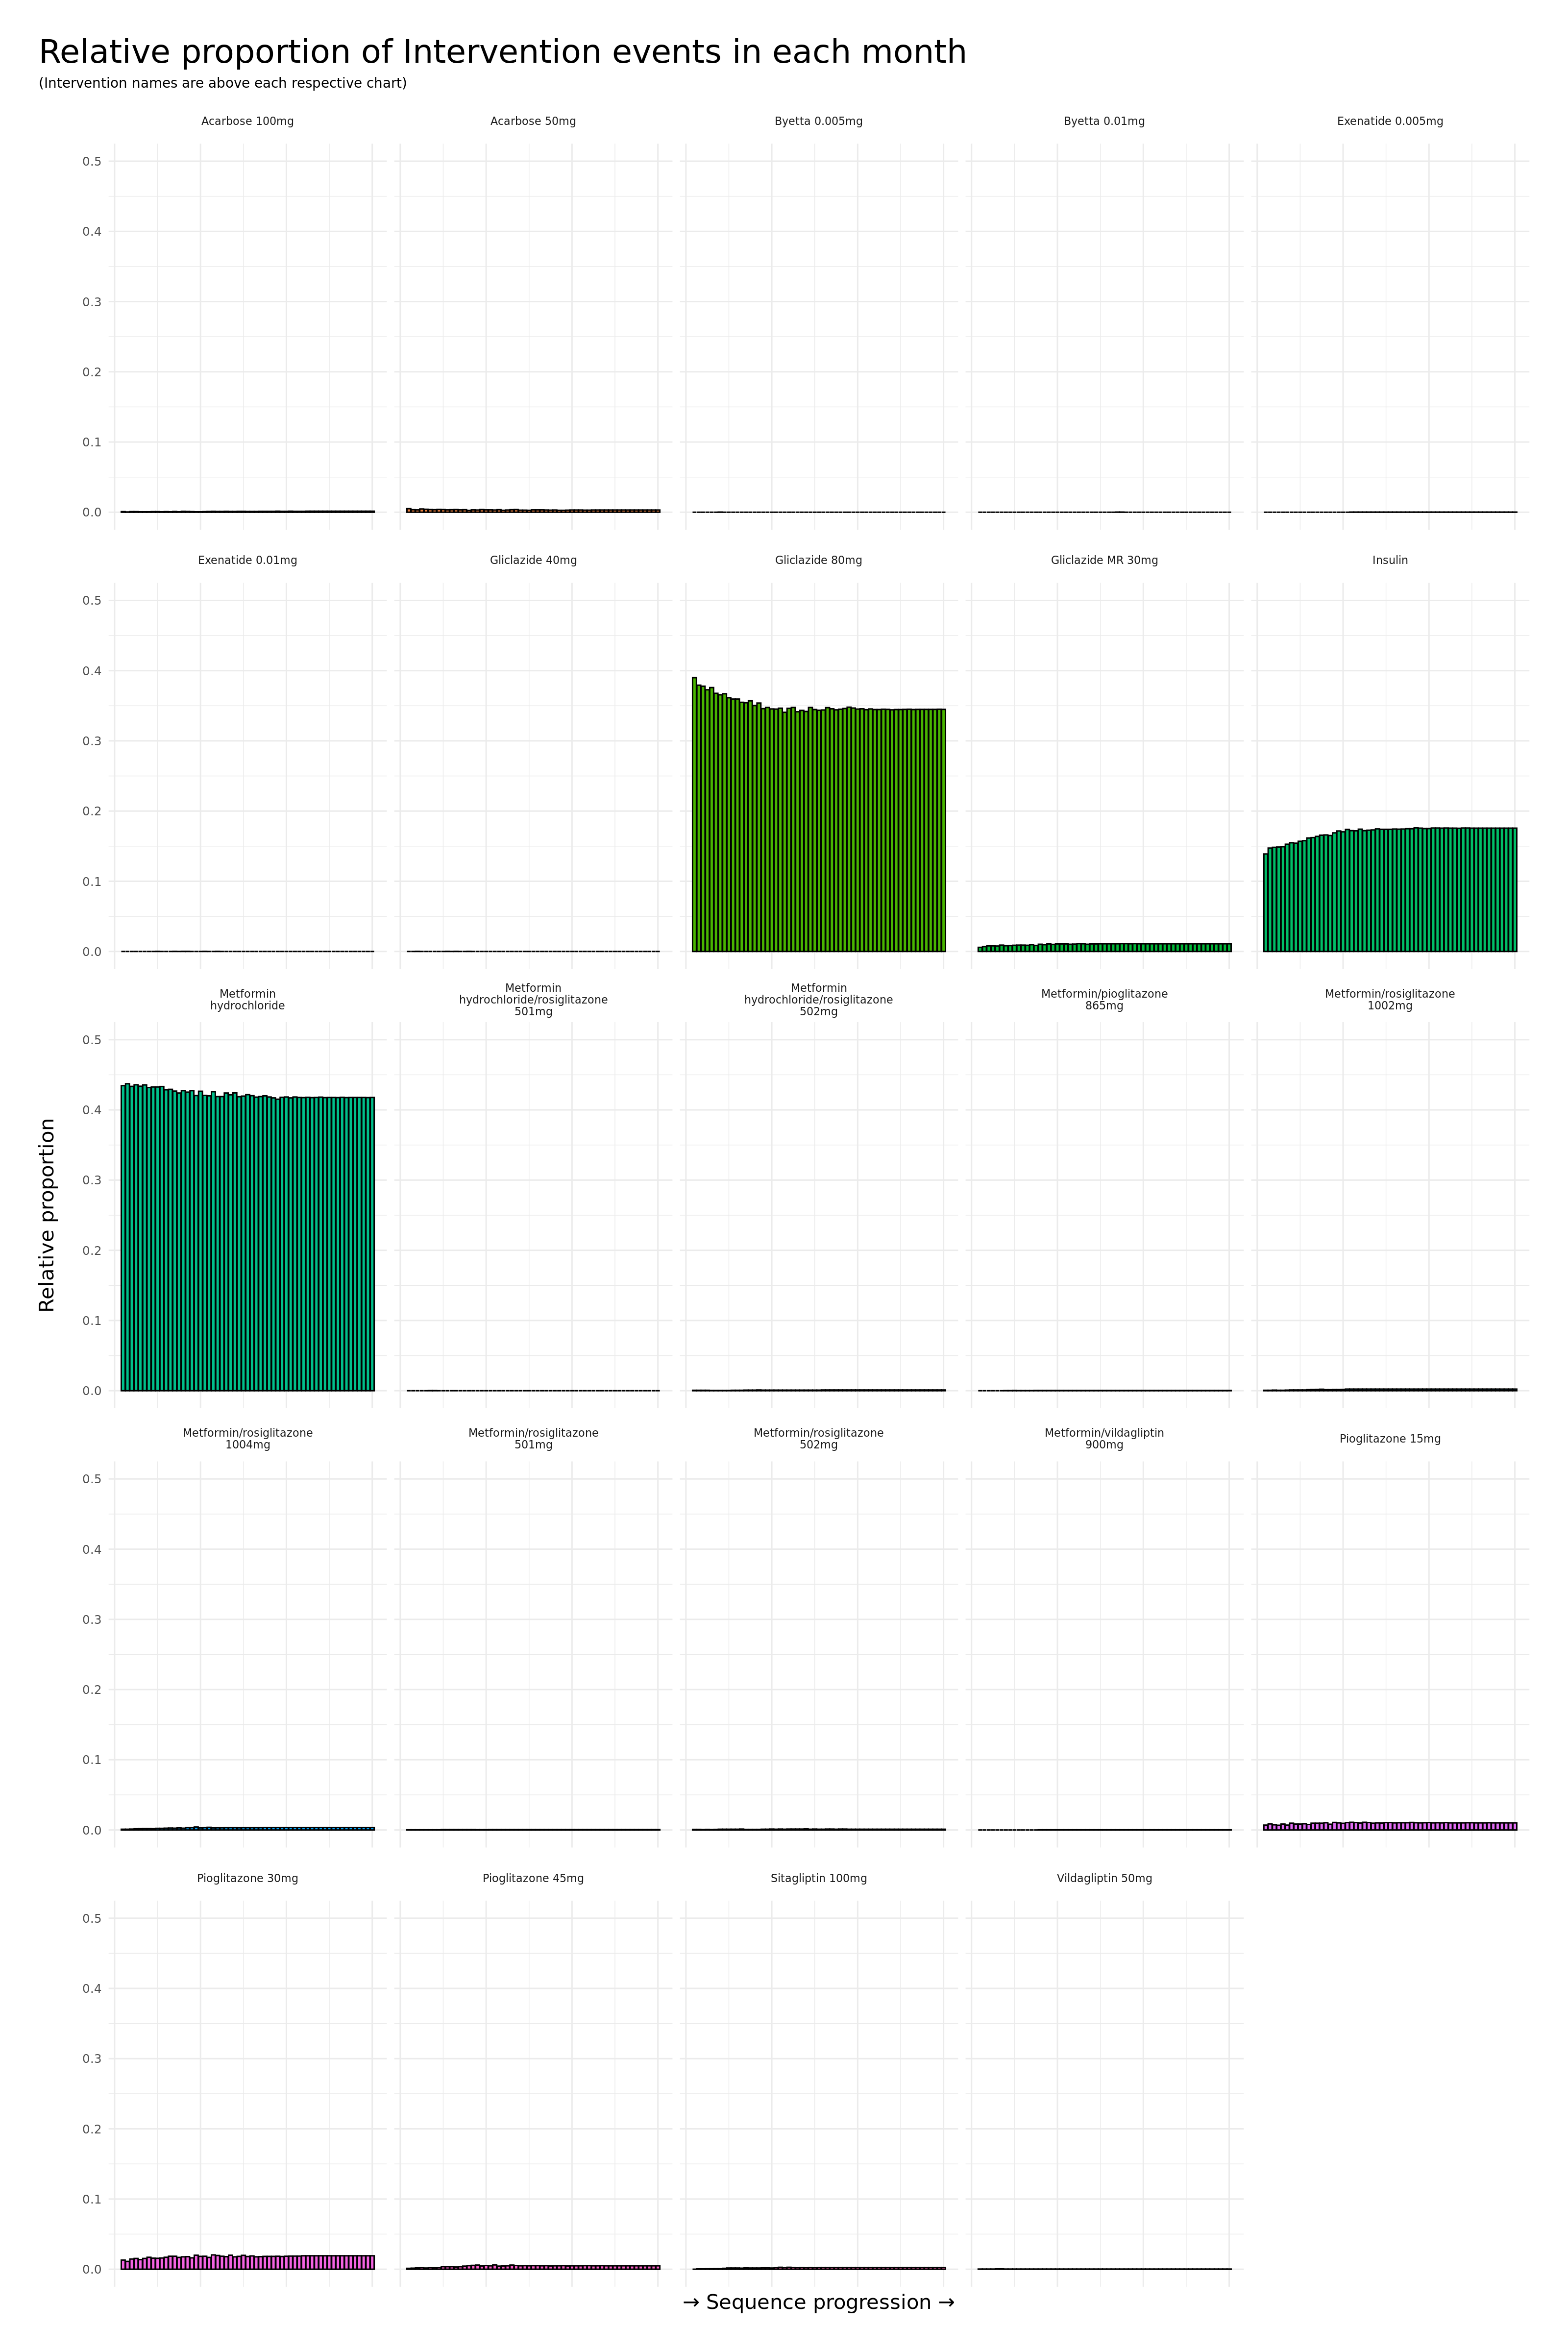

In [116]:
if ( run_process_mining_summary )
    {
        # Prepare plot data.
        plot_data <-
            TraMineR::seqstatd( sts_seqmine_intervention_only_excludingUnobserved ) %>%
            purrr::pluck( "Frequencies" ) %>%
            as.data.frame() %>%
            tibble::rownames_to_column( "event" ) %>%
            dplyr::filter( !(event %in% c( "None", "Unobserved" ) ) ) %>%
            tidyr::pivot_longer(
                cols = !event
                ,names_to = "month"
                ,values_to = "proportion"
            ) %>%
            # Reorder the `event` variable values to make their colours.
            dplyr::mutate_at(
                .vars = vars( event )
                ,.funs = funs( factor(., levels = df_event_factor %>% dplyr::select( event_fct_order ) %>% dplyr::pull() ) )
            ) %>%
            # Remove the "a" in the `month` variable values that were added by the TraMineR functions.
            dplyr::mutate_at(
                .vars = vars( month )
                ,.funs = funs( stringr::str_replace_all( ., "a", "" ) %>% as.integer() )
            ) %>%
            suppressWarnings()

        # Plotting.
        options( repr.plot.width = 16, repr.plot.height = 24, repr.plot.res = 200 )

        plot_relProp_Treatments <-
            plot_data %>%
            ggplot() +
            geom_bar(
                aes(
                    x = month
                    ,y = proportion
                    ,fill = event
                )
                ,stat = "identity"
                ,colour = "black"
            ) +
            facet_wrap( ~ event, labeller = label_wrap_gen( 20 ) ) +
            labs(
                x = "\u2192 Sequence progression \u2192"
                ,y = "Relative proportion"
                ,title = "Relative proportion of Intervention events in each month"
                ,subtitle = "(Intervention names are above each respective chart)"
            ) +
            ylim(0, 0.5) +
            theme_minimal() +
            theme(
                title = element_text( size = 20 )
                ,plot.subtitle = element_text( size = 10 )
                ,axis.title = element_text( size = 15 )
                ,plot.caption = ggtext::element_markdown( size = 10, hjust = 0 )
                ,plot.caption.position = 'plot'
                ,plot.title.position = 'plot'
                ,axis.text.x = element_blank()
                ,legend.position = 'None'
                ,plot.margin = unit( c(1, 1, 1, 1), "cm")
                ,axis.title.y = element_text( margin = margin( r = 20 ) )
                ,strip.text = element_text( size = 8 )
                )

        plot_relProp_Treatments
    }

Average duration that a patient spends in a "state" without changing.

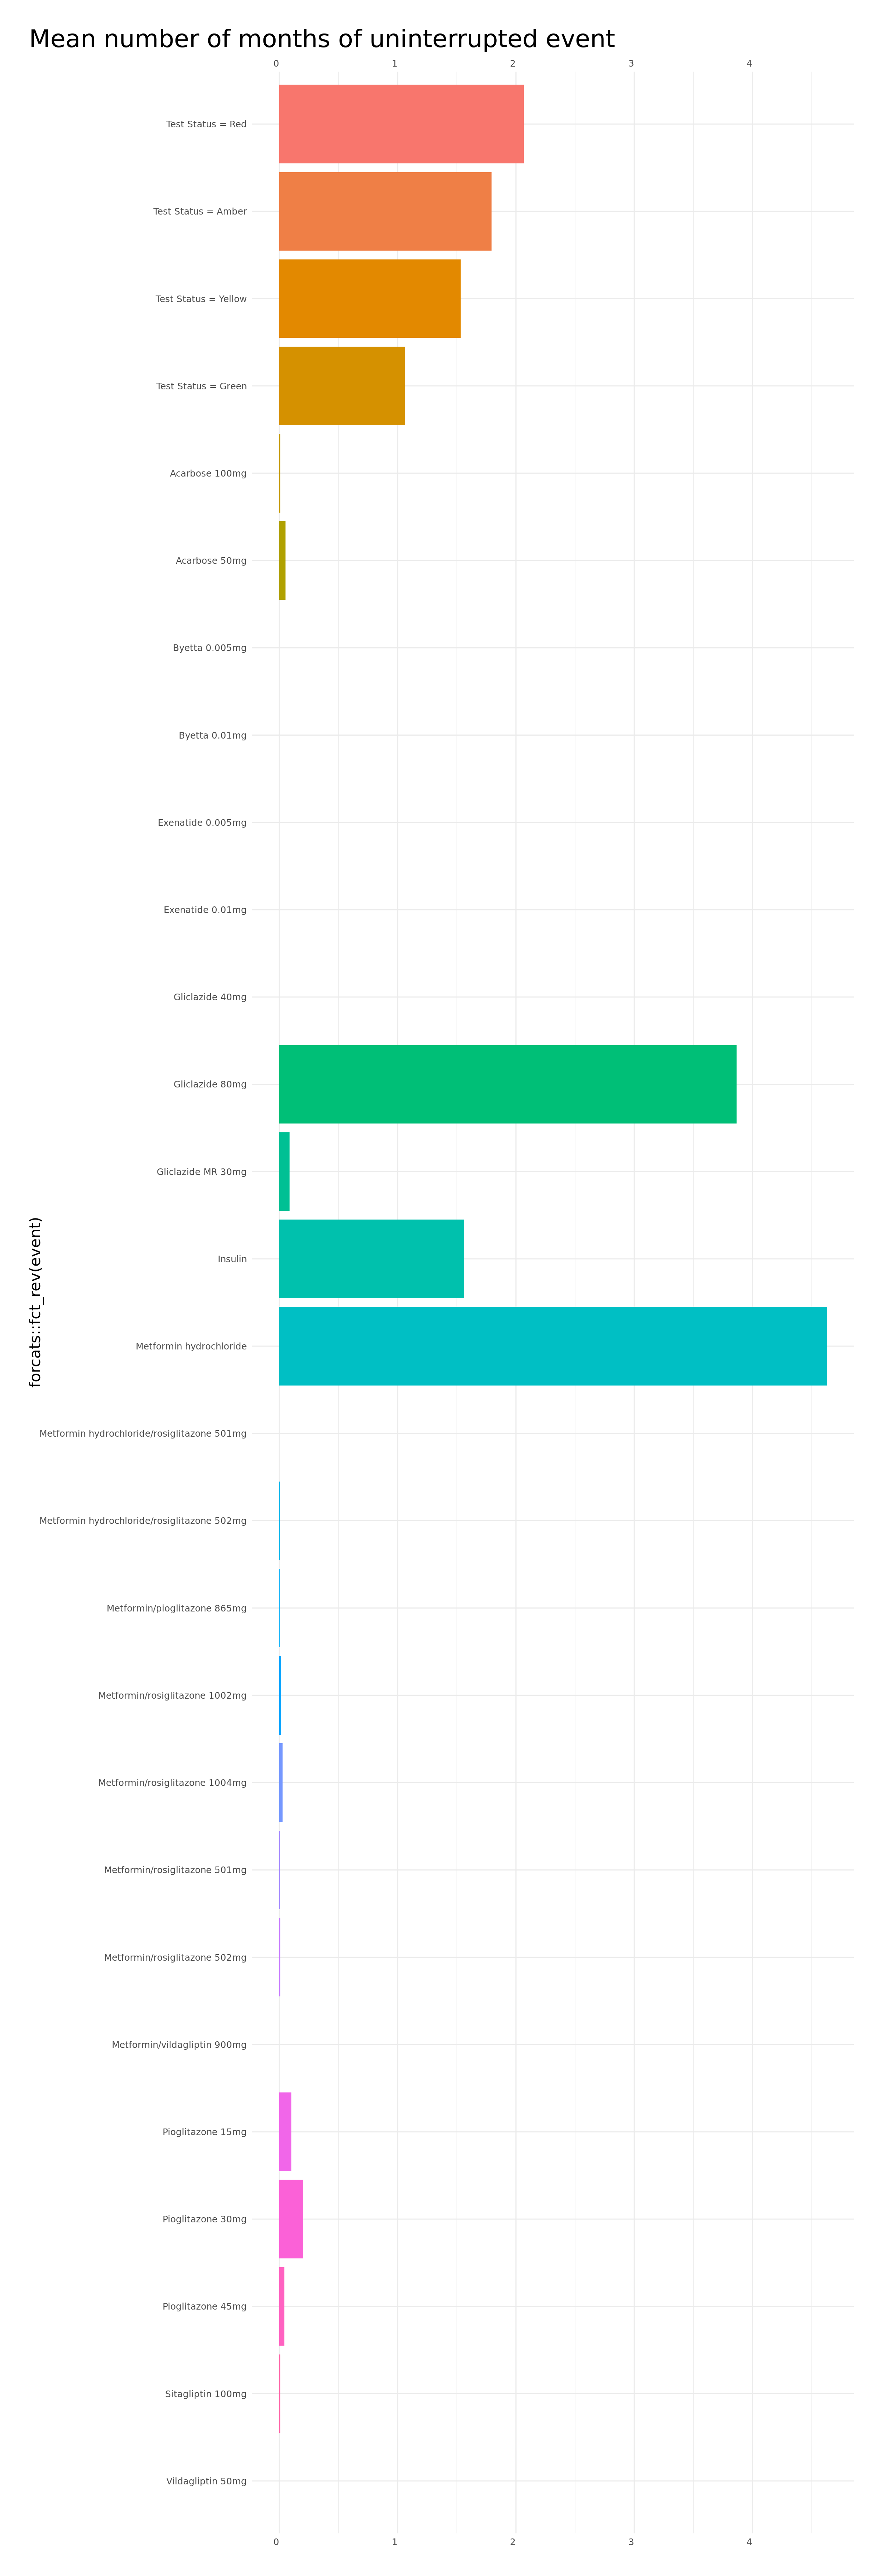

In [117]:
if ( run_process_mining_summary )
    {
        # Make plot data.
        plotData <-
            TraMineR::seqmeant( sts_seqmine ) %>%
            as.data.frame() %>%
            tibble::rownames_to_column("event") %>%
            dplyr::left_join(
                df_event_factor
                ,by = join_by( event == event_fct_order)
            ) %>%
            dplyr::mutate_at(
                .vars = vars( event )
                ,.funs = funs( factor(., levels = df_event_factor %>% dplyr::select( event_fct_order ) %>% dplyr::pull() ) )
            ) %>%
            dplyr::filter( !(event %in% c( "NA", "Unobserved" ) ) ) %>%
            dplyr::arrange( event ) %>%
            suppressWarnings()


        # Plotting.
        options( repr.plot.width = 12, repr.plot.height = 35, repr.plot.res = 200 )

        plot_durationOfEvents <-
            plotData %>%
            ggplot() +
            geom_bar(
                aes(
                    x = forcats::fct_rev( event )
                    ,y = Mean
                    ,fill = event
                )
                ,stat = "identity" ) +
            labs(
                title = "Mean number of months of uninterrupted event"
                ,y = "Number of\nmonths"
            ) +
            scale_x_discrete( labels = scales::label_wrap( 70 ) ) +
            scale_y_continuous( sec.axis = dup_axis() ) +
            coord_flip() +
            theme_minimal() +
            theme(
                title = element_text( size = 20 )
                ,plot.subtitle = element_text( size = 10 )
                ,axis.title = element_text( size = 15 )
                ,plot.caption = ggtext::element_markdown( size = 10, hjust = 0 )
                ,plot.caption.position = 'plot'
                ,plot.title.position = 'plot'
                ,axis.text.x = element_text( hjust = 1 )
                ,axis.title.x = element_blank()
                ,plot.margin = unit( c(1, 1, 1, 1), "cm")
                ,axis.title.y = element_text( margin = margin( r = 20 ) )
                ,legend.position = 'None'
                )

        plot_durationOfEvents
    }

Some initial observations of the process-mining investigation:
- __The most-common sequence patterns (when the "Unobserved" values are ignored) are dominated by long stretches of the same test-status values.__
    - Evidenced by the percentage contribution of patient journeys in the top 10.
- __Unlike when we studied sequences from diagnosis, the counts of test-status values stay steady over time__
    - Evidenced by the level counts of test status values.

#### Burden of Treatment / Turbulence / Complexity of care

Calculate statistics that summarise and represent the complicatedness / complexity of patients' sequences, then plot as histograms.

_Component_

- The __Transitions Count__ statistic is the count of times a patient changes state during their sequence. It has an unbounded range and does not take the length of the sequence into account (i.e. low counts can indicate short sequences with little time to change state, or can indicate a long and stable sequence).
- The __$\mathbf{log_{2}}(Subsequence Count)$__ statistic is the  $log_{2}$ of the count of 'distinct successive states' during a patient's sequence. It has an unbounded range with a sequence-specific maximum reached when the sequence cycles between all its states. Low values can indicate either few changes or a small number of unique states observed in the sequence.
- The __Longitudinal Entropy__ statistic quantifies the entropy of the distribution of durations spent in each state observed in the sequence. It is a measure of diversity of states within a sequence. It's range is between 0 and 1 because each sequence's value is scaled to the theoretical maximum of $log_{a}$, where $a$ is the count of unique states across all sequences, even those not observed in the sequence (i.e. its alphabet).

_Composite_

- The __Turbulence__ statistic is the $log_{2}$ of the product of the count of subsequences and a sequence-specific scaling parameter ([Elzinga et al. 2007](https://sci-hub.wf/10.1007/s10680-007-9133-7)). The sequence-specific scaling parameter is based on the variance of observed state durations (which we know to be inversely proportional to the notion of turbulent sequences). Larger values are associated with sequences that have many states, changes, and similar durations in each state. This statistic differs from the $\mathbf{log_{2}}(Subsequence Count)$ only by the sequence-specific scaling parameter within the $log_{2}$ operator.
- The __Complexity Index__ statistic is the geometric mean of a scaled count of transitions in a sequence and the sequence's scaled longitudinal entropy ([Gabadinho et al. 2010](https://www.researchgate.net/profile/Gilbert-Ritschard/publication/220786242_Indice_de_complexite_pour_le_tri_et_la_comparaison_de_sequences_categorielles/links/53edabdb0cf26b9b7dc5f259/Indice-de-complexite-pour-le-tri-et-la-comparaison-de-sequences-categorielles.pdf)). The count of transitions is scaled to the length of the sequence, and the longitundinal entropy is scaled to the theoretical maximum of $log_{a}$, where $a$ is the count of unique states across all sequences, even those not observed in the sequence (i.e. its alphabet). It's range is between 0 and 1.


Below I plot the distributions of each statistics, for various sets of states (e.g. tests only or interventions only). Upon request from the Clinical Review Board, I also provide plots stratifed where hte disrtibutinos are stratified by patient records' multimorbidity status (Green = Not multimorbidd; Red = Multimorbid).

In [33]:
if ( run_complexity_statistics )
    {
    # Create function that will append the multimorbidity covariate.
    add.covariate <-
        function(
                df
                ,covardf = df_log_PandT_longFormat_simplified_StrataLabels
                ,covaradd = "MultiMorb"
        )
        {
        df %>%
        as.data.frame() %>%
        tibble::rownames_to_column( "person_id" ) %>%
        #dplyr::mutate( person_id = as.integer( person_id ) ) %>%
        dplyr::left_join(
            covardf %>% dplyr::distinct( person_id, get( covaradd ) ) %>% `colnames<-`( c( "person_id", covaradd ) )
            ,by = join_by( person_id )
        ) %>% suppressWarnings()
    }

    # Create function that will plot the sequence-complexity statistics.
    fnc.plot.cplx.stats.dists <-
        function(
            stsObj
            ,nbins = 20
            ,title
            ,geom = "density"
            ,strata = NULL
        )
            {

            # Make plot data.
            # ## Calculate statistics over all patient records.
            if( is.null( strata ) )
                {
                    seq_transitionCount <- TraMineR::seqtransn( stsObj )
                    seq_subsequenceCount <- TraMineR::seqsubsn( stsObj ) %>% log( base = 2 )
                    seq_longEntropy <- TraMineR::seqient( stsObj )
                    seq_turbulence <- TraMineR::seqST( stsObj )
                    seq_complexity <- TraMineR::seqici( stsObj )
                } else {
                    seq_transitionCount <- TraMineR::seqtransn( stsObj ) %>% add.covariate( covaradd = strata )
                    seq_subsequenceCount <- TraMineR::seqsubsn( stsObj ) %>% log( base = 2 ) %>% add.covariate( covaradd = strata )
                    seq_longEntropy <- TraMineR::seqient( stsObj ) %>% add.covariate( covaradd = strata )
                    seq_turbulence <- TraMineR::seqST( stsObj ) %>% add.covariate( covaradd = strata )
                    seq_complexity <- TraMineR::seqici( stsObj ) %>% add.covariate( covaradd = strata )
                }

            # Make plots.
            if(geom == "hist")
                {
                    # ## Plot histograms and summary statistics.
                    n_bins <- nbins
                    trans <-
                        seq_transitionCount %>%
                        tibble::as_tibble() %>%
                        ggplot() +
                        geom_histogram( aes( Trans., fill = if( !is.null( strata ) ) { get( strata ) } ), bins = n_bins, colour = "black", position = "dodge" ) +
                        labs( title = "Sequence transition count", x = "Transition count", y = "Frequency" ) +
                        theme_classic() +
                        theme( legend.position = 'None' ) %>%
                        suppressWarnings()
                    subseq <-
                        seq_subsequenceCount %>%
                        tibble::as_tibble() %>%
                        ggplot() +
                        geom_histogram( aes( Subseq., fill = if( !is.null( strata ) ) { get( strata ) } ), bins = n_bins, colour = "black", position = "dodge" ) +
                        labs( title = base::bquote("Sequence "*log[2]("Subsequence Count")) , x = base::bquote(log[2]("Subsequence Count")), y = "Frequency" ) +
                        theme_classic() +
                        theme( legend.position = 'None' ) %>%
                        suppressWarnings()
                    entr <-
                        seq_longEntropy %>%
                        tibble::as_tibble() %>%
                        ggplot() +
                        geom_histogram( aes( Entropy, fill = if( !is.null( strata ) ) { get( strata ) } ), bins = n_bins, colour = "black", position = "dodge" ) +
                        labs( title = "Sequence longitudinal entropy", x = "Longitudinal entropy", y = "Frequency" ) +
                        xlim( 0, 1 ) +
                        theme_classic() +
                        theme( legend.position = 'None' ) %>%
                        suppressWarnings()
                    turb <-
                        seq_turbulence %>%
                        tibble::as_tibble() %>%
                        ggplot() +
                        geom_histogram( aes( Turbulence, fill = if( !is.null( strata ) ) { get( strata ) } ), bins = n_bins, colour = "black", position = "dodge" ) +
                        labs( title = "Sequence turbulence", x = "Turbulence score", y = "Frequency" ) +
                        theme_classic()  +
                        theme( legend.position = 'None' ) %>%
                        suppressWarnings()
                    cidx <-
                        seq_complexity %>%
                        tibble::as_tibble() %>%
                        ggplot() +
                        geom_histogram( aes( C, fill = if( !is.null( strata ) ) { get( strata ) } ), bins = n_bins, colour = "black", position = "dodge" ) +
                        labs( title = "Sequence complexity", x = "Complexity index", y = "Frequency" ) +
                        xlim( 0, 1 ) +
                        theme_classic() +
                        guides( colour = guide_legend( title = strata ) ) %>%
                        suppressWarnings()
                }
            if(geom == "density")
                {
                    # ## Plot smoothed density and summary statistics.
                    trans <-
                        seq_transitionCount %>%
                        tibble::as_tibble() %>%
                        ggplot() +
                        geom_density( aes( Trans., colour = if( !is.null( strata ) ) { get( strata ) } ) ) +
                        scale_fill_manual( values = c('limegreen', 'firebrick1') ) +
                        labs( title = "Sequence transition count", x = "Transition count", y = "Density" ) +
                        theme_classic() +
                        theme( legend.position = 'None' )
                    subseq <-
                        seq_subsequenceCount %>%
                        tibble::as_tibble() %>%
                        ggplot() +
                        geom_density( aes( Subseq., colour = if( !is.null( strata ) ) { get( strata ) } )) +
                        scale_fill_manual( values = c('limegreen', 'firebrick1') ) +
                        labs( title = base::bquote("Sequence "*log[2]("Subsequence Count")) , x = base::bquote(log[2]("Subsequence Count")), y = "Density" ) +
                        theme_classic() +
                        theme( legend.position = 'None' )
                    entr <-
                        seq_longEntropy %>%
                        tibble::as_tibble() %>%
                        ggplot() +
                        geom_density( aes( Entropy, colour = if( !is.null( strata ) ) { get( strata ) } ) ) +
                        scale_fill_manual( values = c('limegreen', 'firebrick1') ) +
                        labs( title = "Sequence longitudinal entropy", x = "Longitudinal entropy", y = "Density" ) +
                        xlim( 0, 1 ) +
                        theme_classic() +
                        theme( legend.position = 'None' )
                    turb <-
                        seq_turbulence %>%
                        tibble::as_tibble() %>%
                        ggplot() +
                        geom_density( aes( Turbulence, colour = if( !is.null( strata ) ) { get( strata ) } ) ) +
                        scale_fill_manual( values = c('limegreen', 'firebrick1') ) +
                        labs( title = "Sequence turbulence", x = "Turbulence score", y = "Density" ) +
                        theme_classic() +
                        theme( legend.position = 'None' )
                    cidx <-
                        seq_complexity %>%
                        tibble::as_tibble() %>%
                        ggplot() +
                        geom_density( aes( C, colour = if( !is.null( strata ) ) { get( strata ) } ) ) +
                        scale_fill_manual( values = c('limegreen', 'firebrick1') ) +
                        labs( title = "Sequence complexity", x = "Complexity index", y = "Frequency" ) +
                        xlim( 0, 1 ) +
                        theme_classic() +
                        guides( colour = guide_legend( title = strata ) )
                }
            if( !geom %in% c( "hist", "density" ) ) { stop("`geom` can only take values c( \"hist\", \"density\" ).") }

            # ## Create table of summary statistics.
            plot_table <-
                seq_transitionCount %>%
                dplyr::bind_cols( seq_subsequenceCount, seq_longEntropy, seq_turbulence, seq_complexity, .name_repair = "minimal" ) %>%
                dplyr::select(- ( contains("person_id") | contains("Multi") ) ) %>%
                dplyr::summarise(
                    across(
                        everything()
                        ,list(
                            min = min
                            ,`1st qtr` = ~quantile( ., 0.25 )
                            ,mean = mean
                            ,median = median
                            ,`3rd qtr` = ~quantile( ., 0.75 )
                            ,max = max
                        )
                    )
                ) %>%
                base::round(2) %>%
                pivot_longer(
                    everything()
                    ,names_sep = '_'
                    ,names_to = c( 'variable', '.value' )
                ) %>%
                t() %>%
                gridExtra::tableGrob( theme = gridExtra::ttheme_default( base_size = 8) )

            # ## Plot.
            options( repr.plot.width = 12, repr.plot.height = 7, repr.plot.res = 200 )
        
            myAlphabet <- stsObj %>% attributes() %>% `[[`('alphabet') 
            text_subplot <-
                paste(
                    "The state-sequence alphabet is made of"
                    ,myAlphabet %>% length()
                    ,"states."
                )
            
            plot_titles <-
                cowplot::plot_grid(
                    cowplot::ggdraw() +
                        cowplot::draw_label(
                            title
                            ,x = 0.05, y = 0.2, hjust = 0, size = 20
                        )
                    ,cowplot::ggdraw() +
                        cowplot::draw_label(
                            text_subplot
                            ,x = 0.05, y = 0.2, hjust = 0, size = 13
                        )
                    ,nrow = 3
                    ) %>%
                suppressWarnings()

            plot_plotsCombined <-
                cowplot::plot_grid(
                    trans, subseq, entr, turb, cidx, plot_table
                    ,ncol = 3
                    ) %>%
                suppressWarnings()

            plot_sequenceComplexity <-
                cowplot::plot_grid(
                    plot_titles, plot_plotsCombined
                    ,nrow = 2
                    ,rel_heights = c( 0.3, 1 )
                    )

            plot_sequenceComplexity
        }
    }

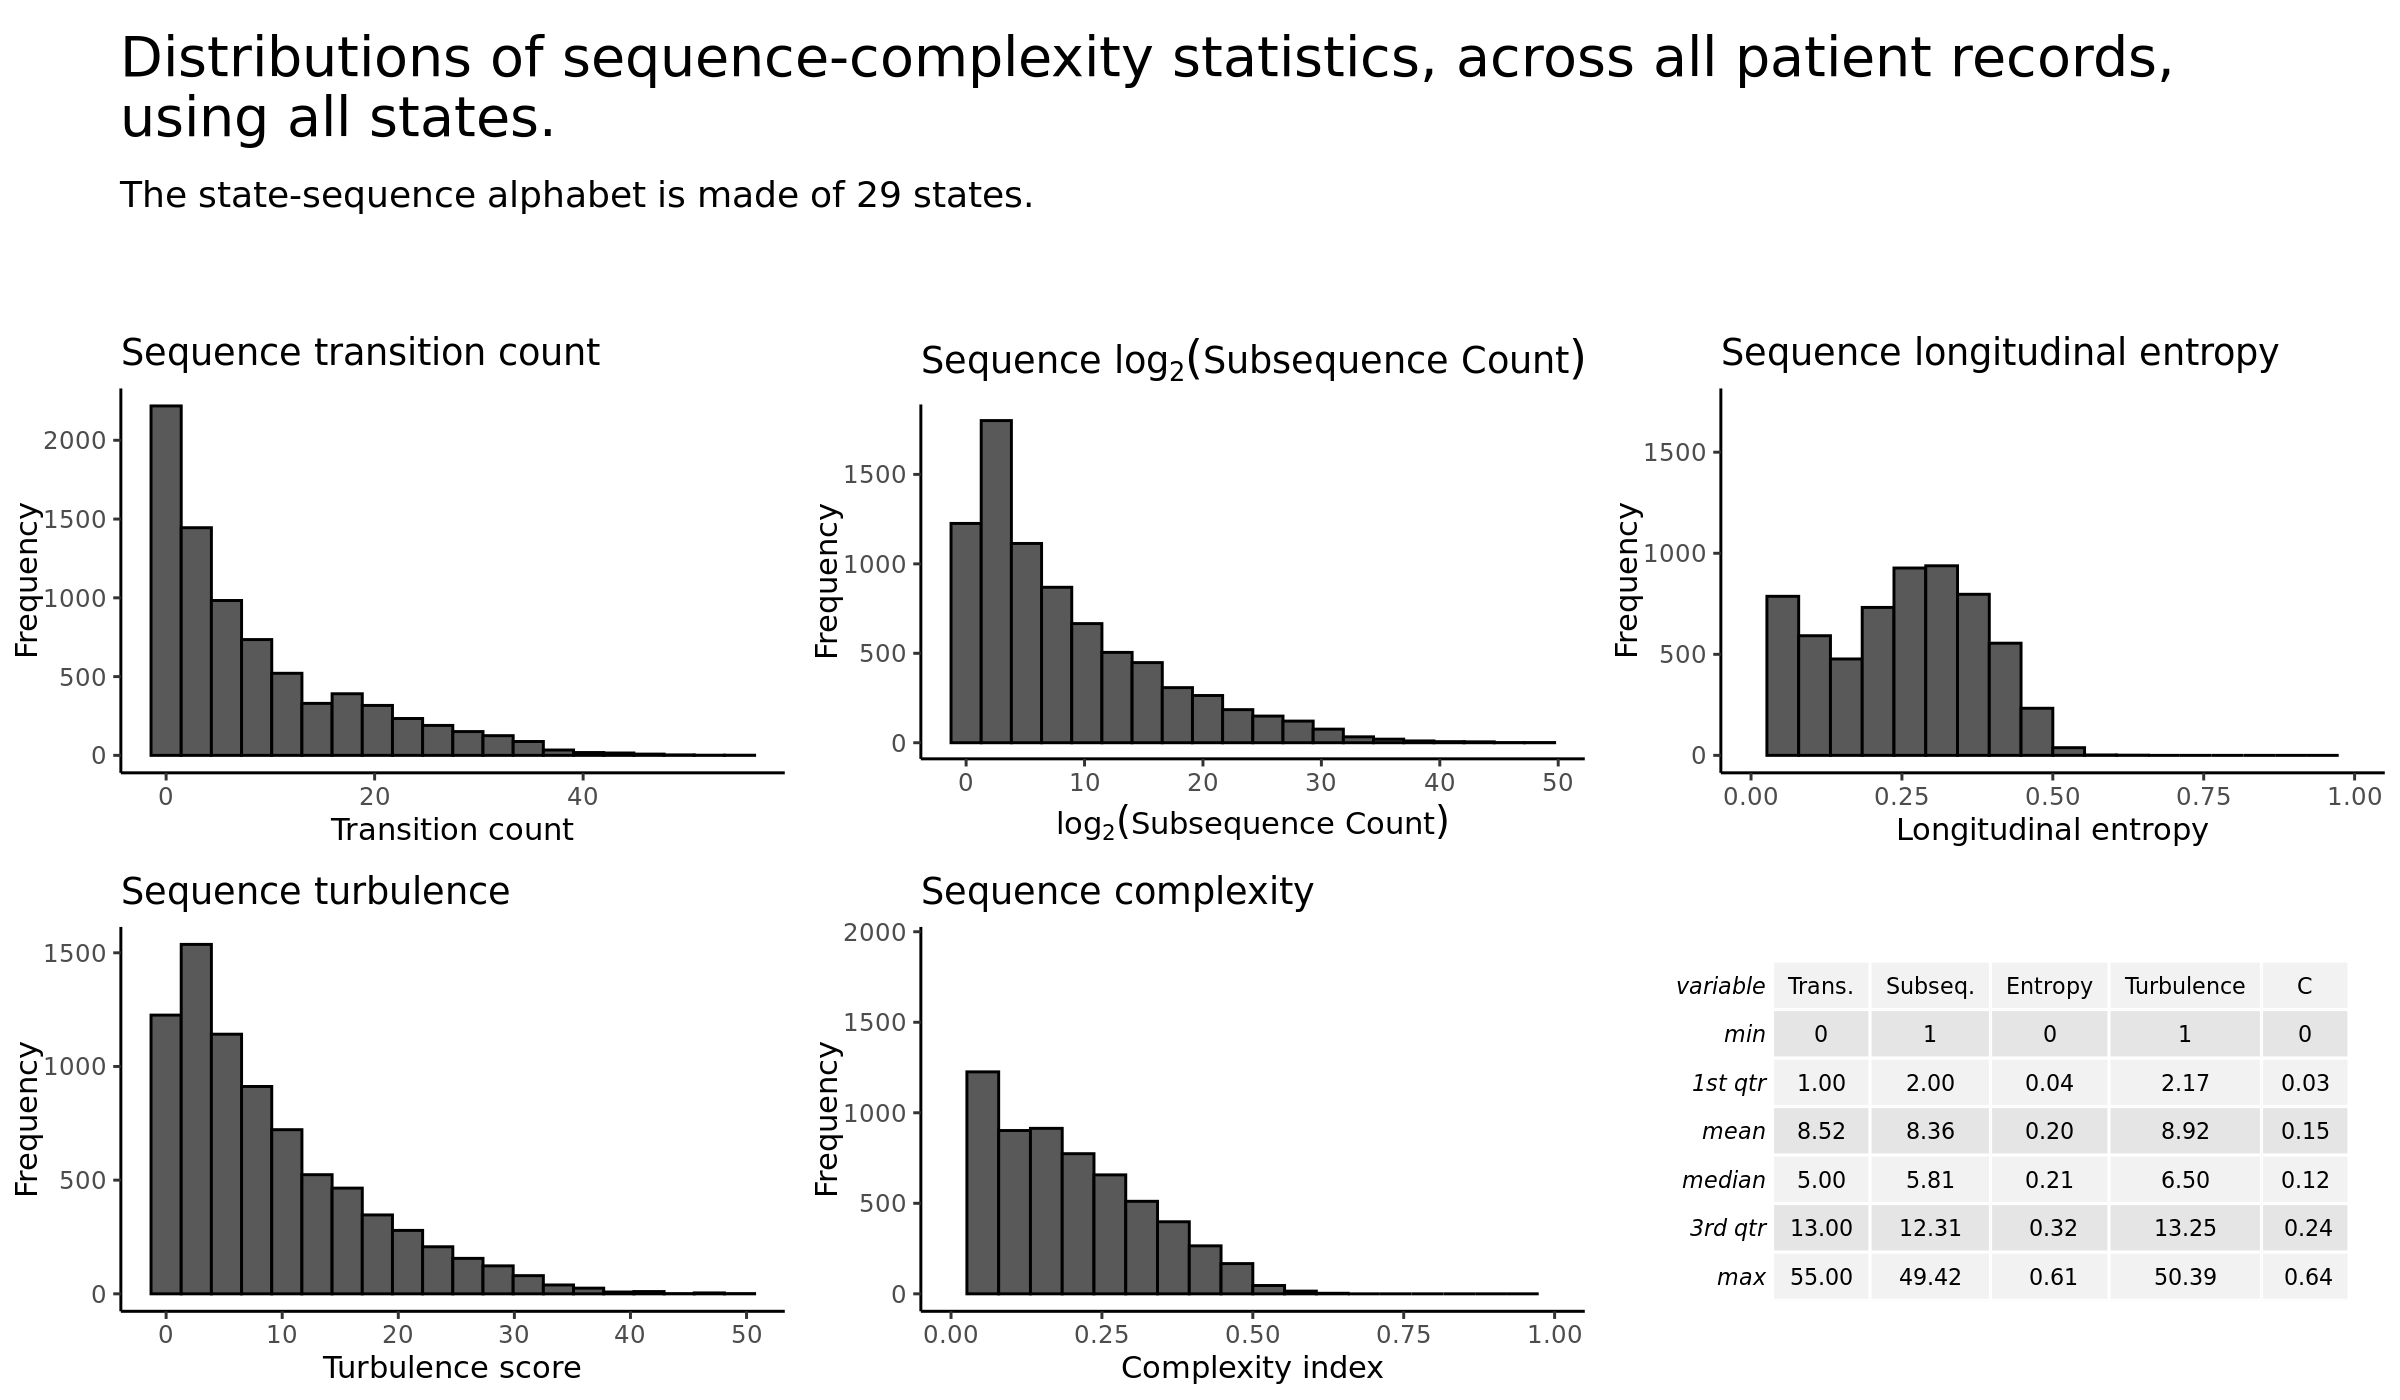

In [37]:
if ( run_complexity_statistics )
    {
        plot_sequenceComplexity_allStates <-
            fnc.plot.cplx.stats.dists(
                stsObj = sts_seqmine
                ,geom = "hist"
                ,title = "Distributions of sequence-complexity statistics, across all patient records,\nusing all states."
            )
        plot_sequenceComplexity_allStates
    }

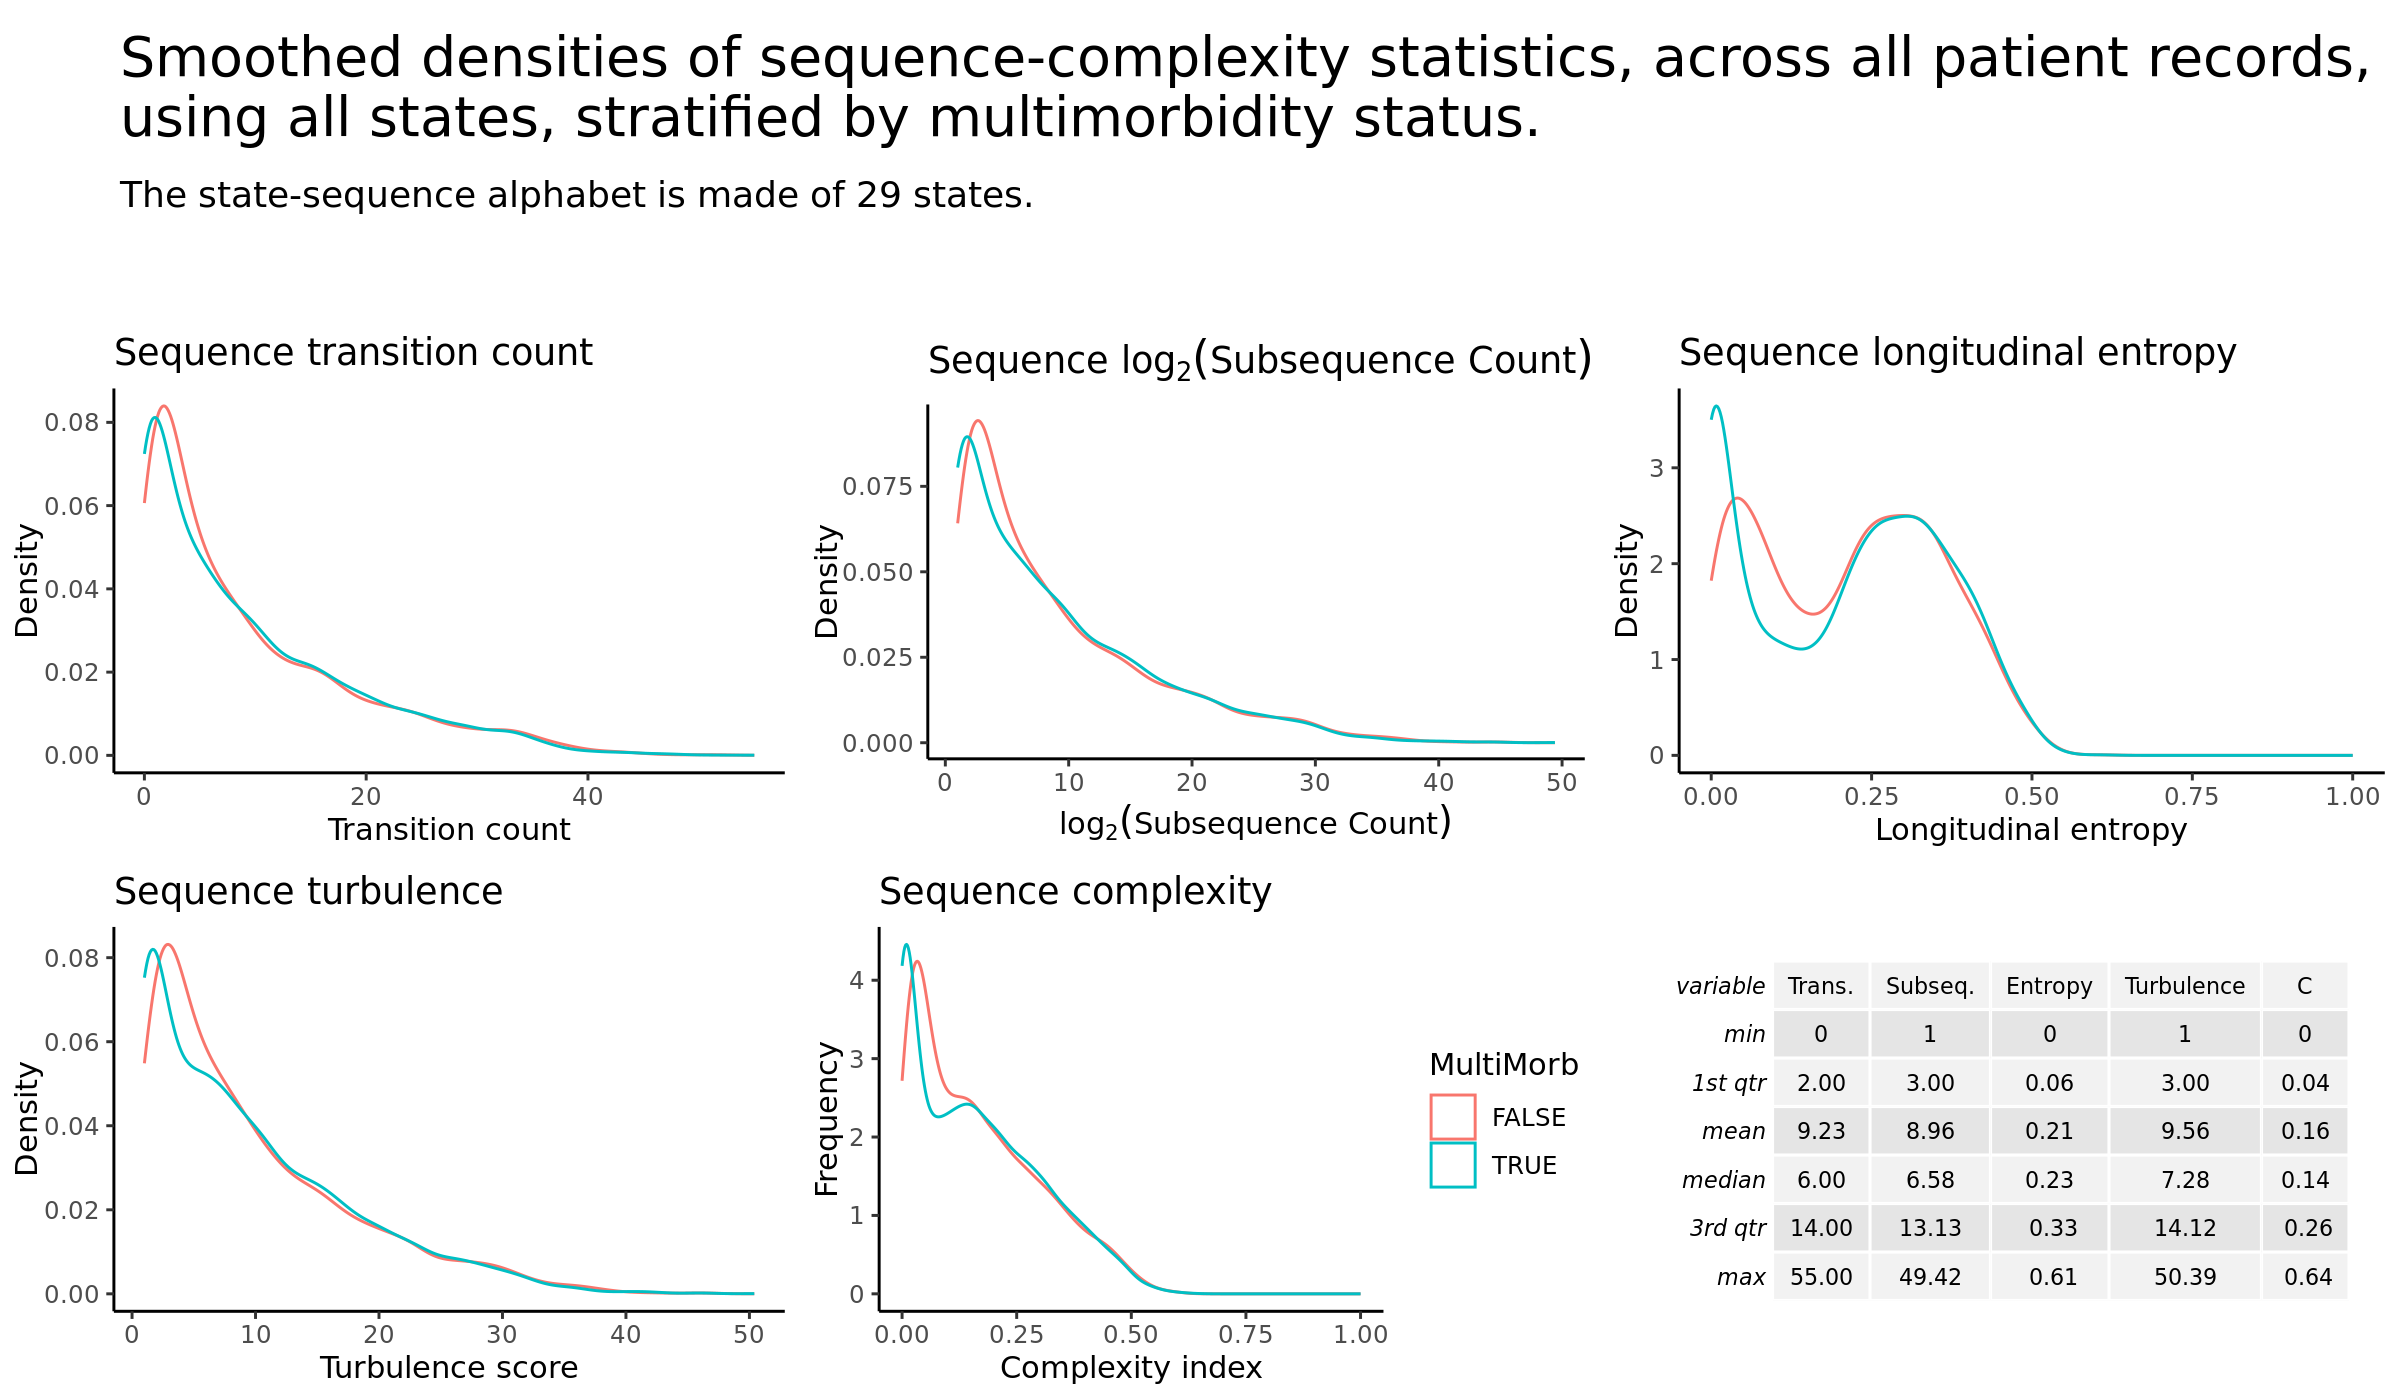

In [38]:
if ( run_complexity_statistics )
    {
        plot_sequenceComplexity_allStates_stratifiedByMultiMorb <-
            fnc.plot.cplx.stats.dists(
                stsObj = sts_seqmine
                ,geom = "density"
                ,strata = "MultiMorb"
                ,title = "Smoothed densities of sequence-complexity statistics, across all patient records,\nusing all states, stratified by multimorbidity status."
            )
        plot_sequenceComplexity_allStates_stratifiedByMultiMorb
    }

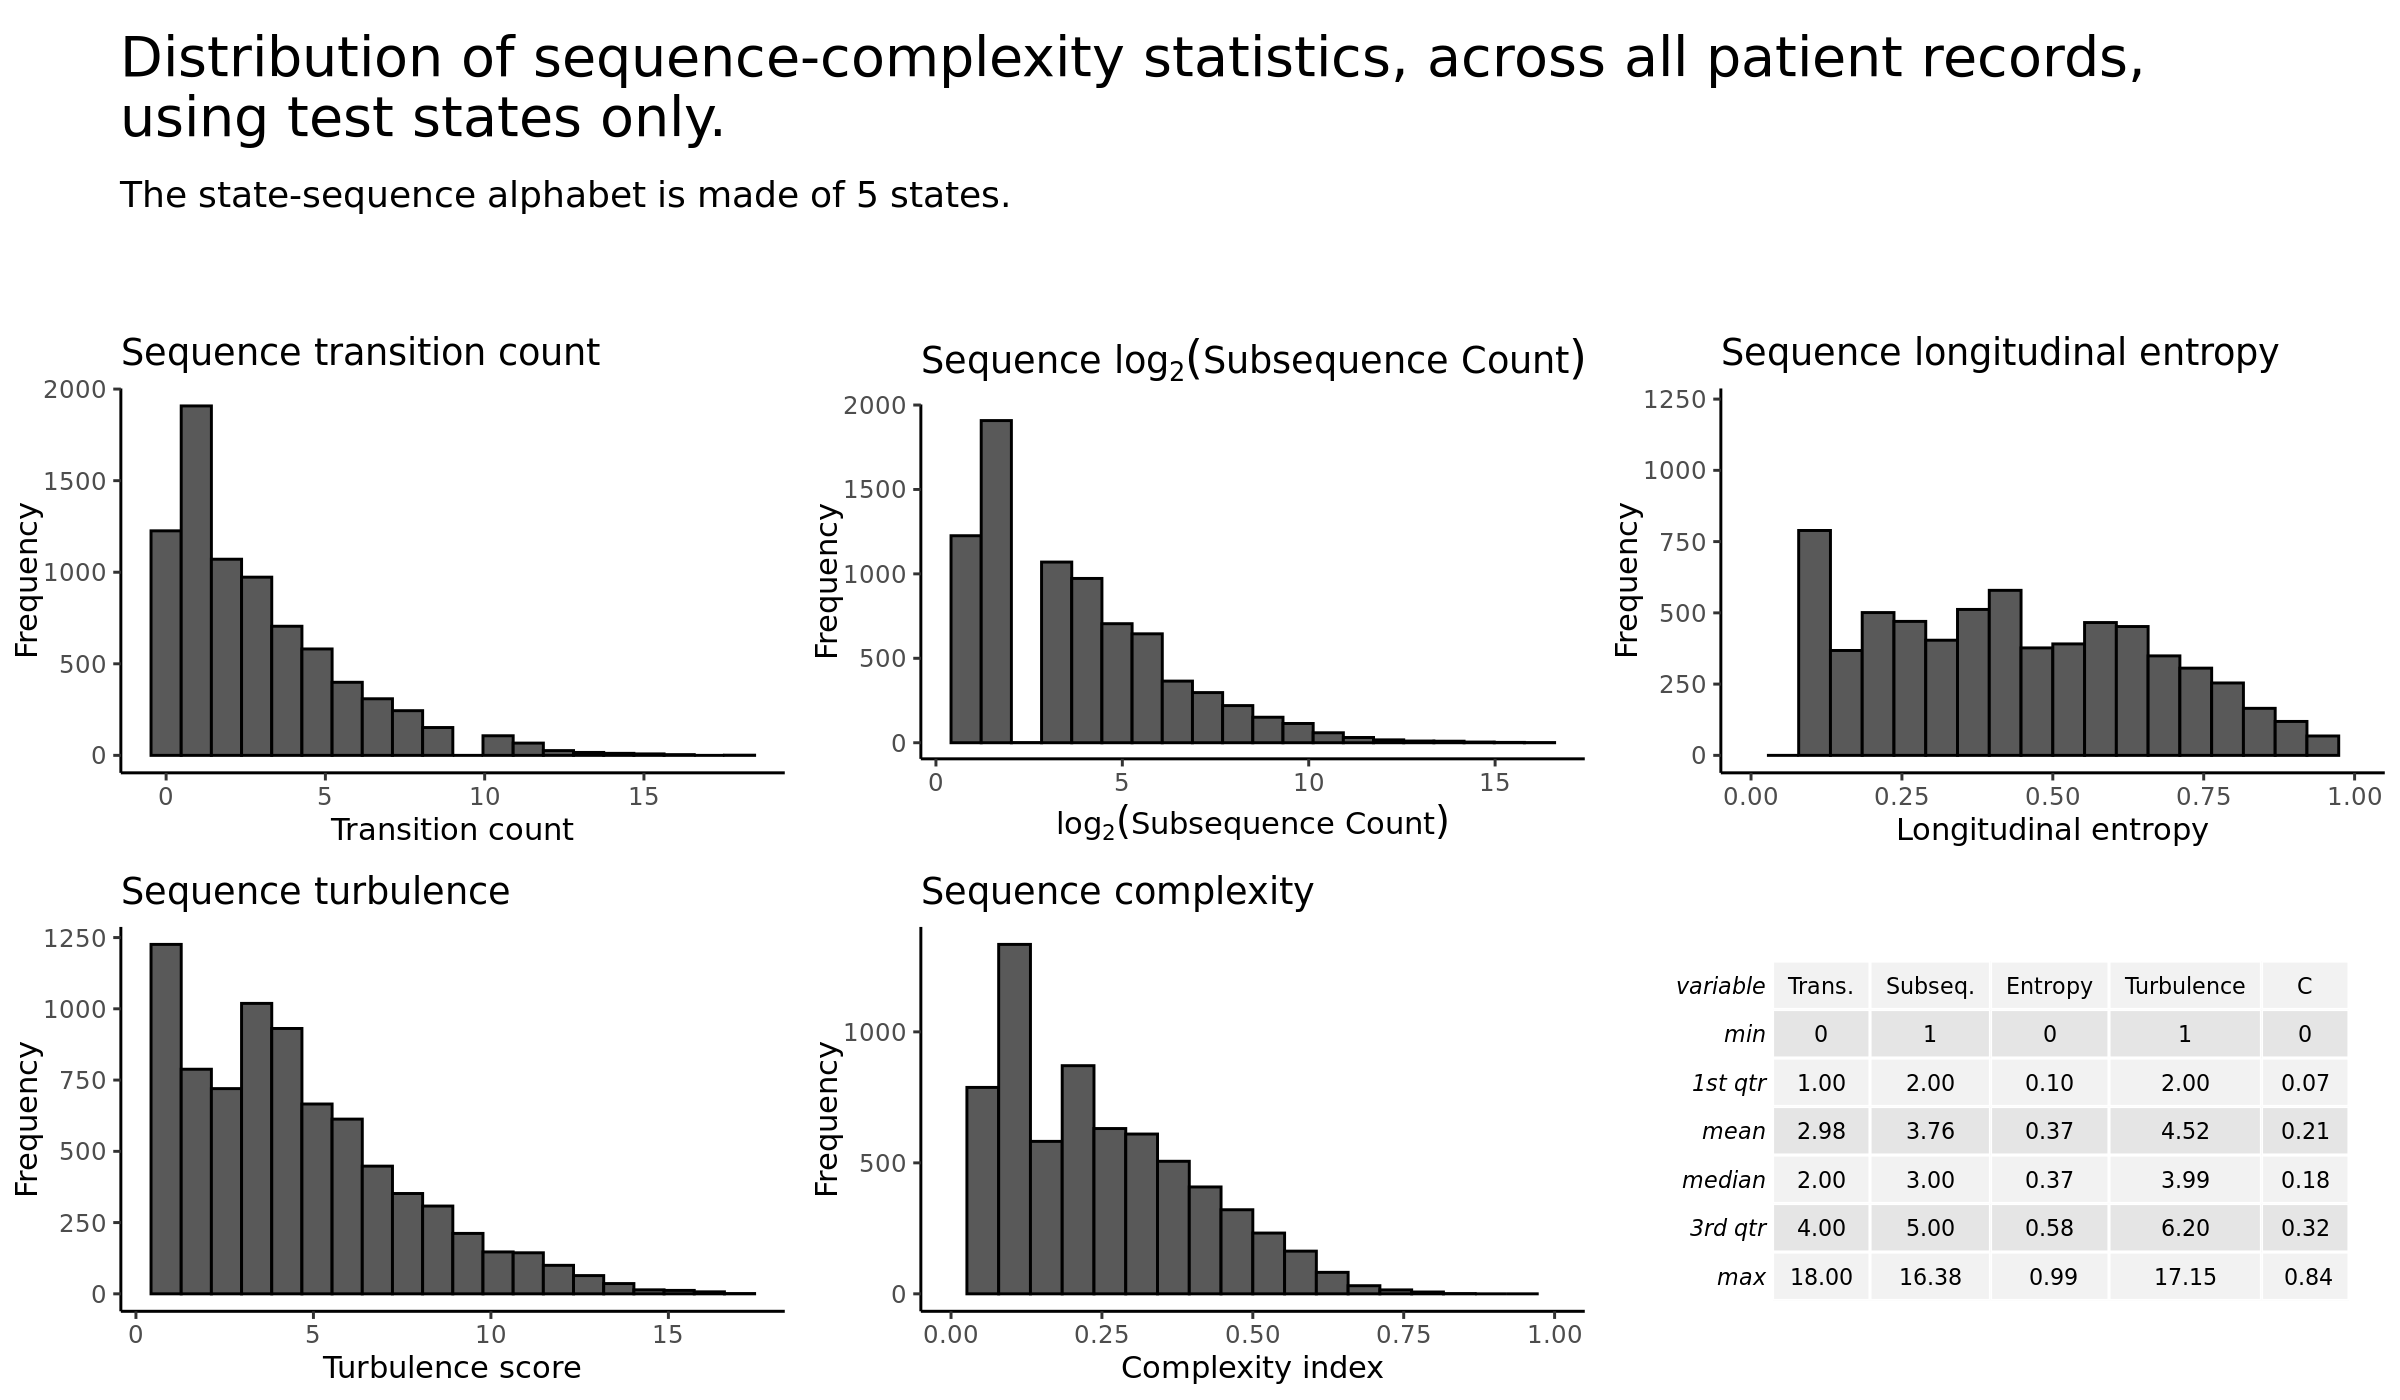

In [155]:
if ( run_complexity_statistics )
    {
        plot_sequenceComplexity_testStates <-
            fnc.plot.cplx.stats.dists(
                stsObj = sts_seqmine_test_only
                ,geom = "hist"
                ,title = "Distribution of sequence-complexity statistics, across all patient records,\nusing test states only."
            )
        plot_sequenceComplexity_testStates
    }

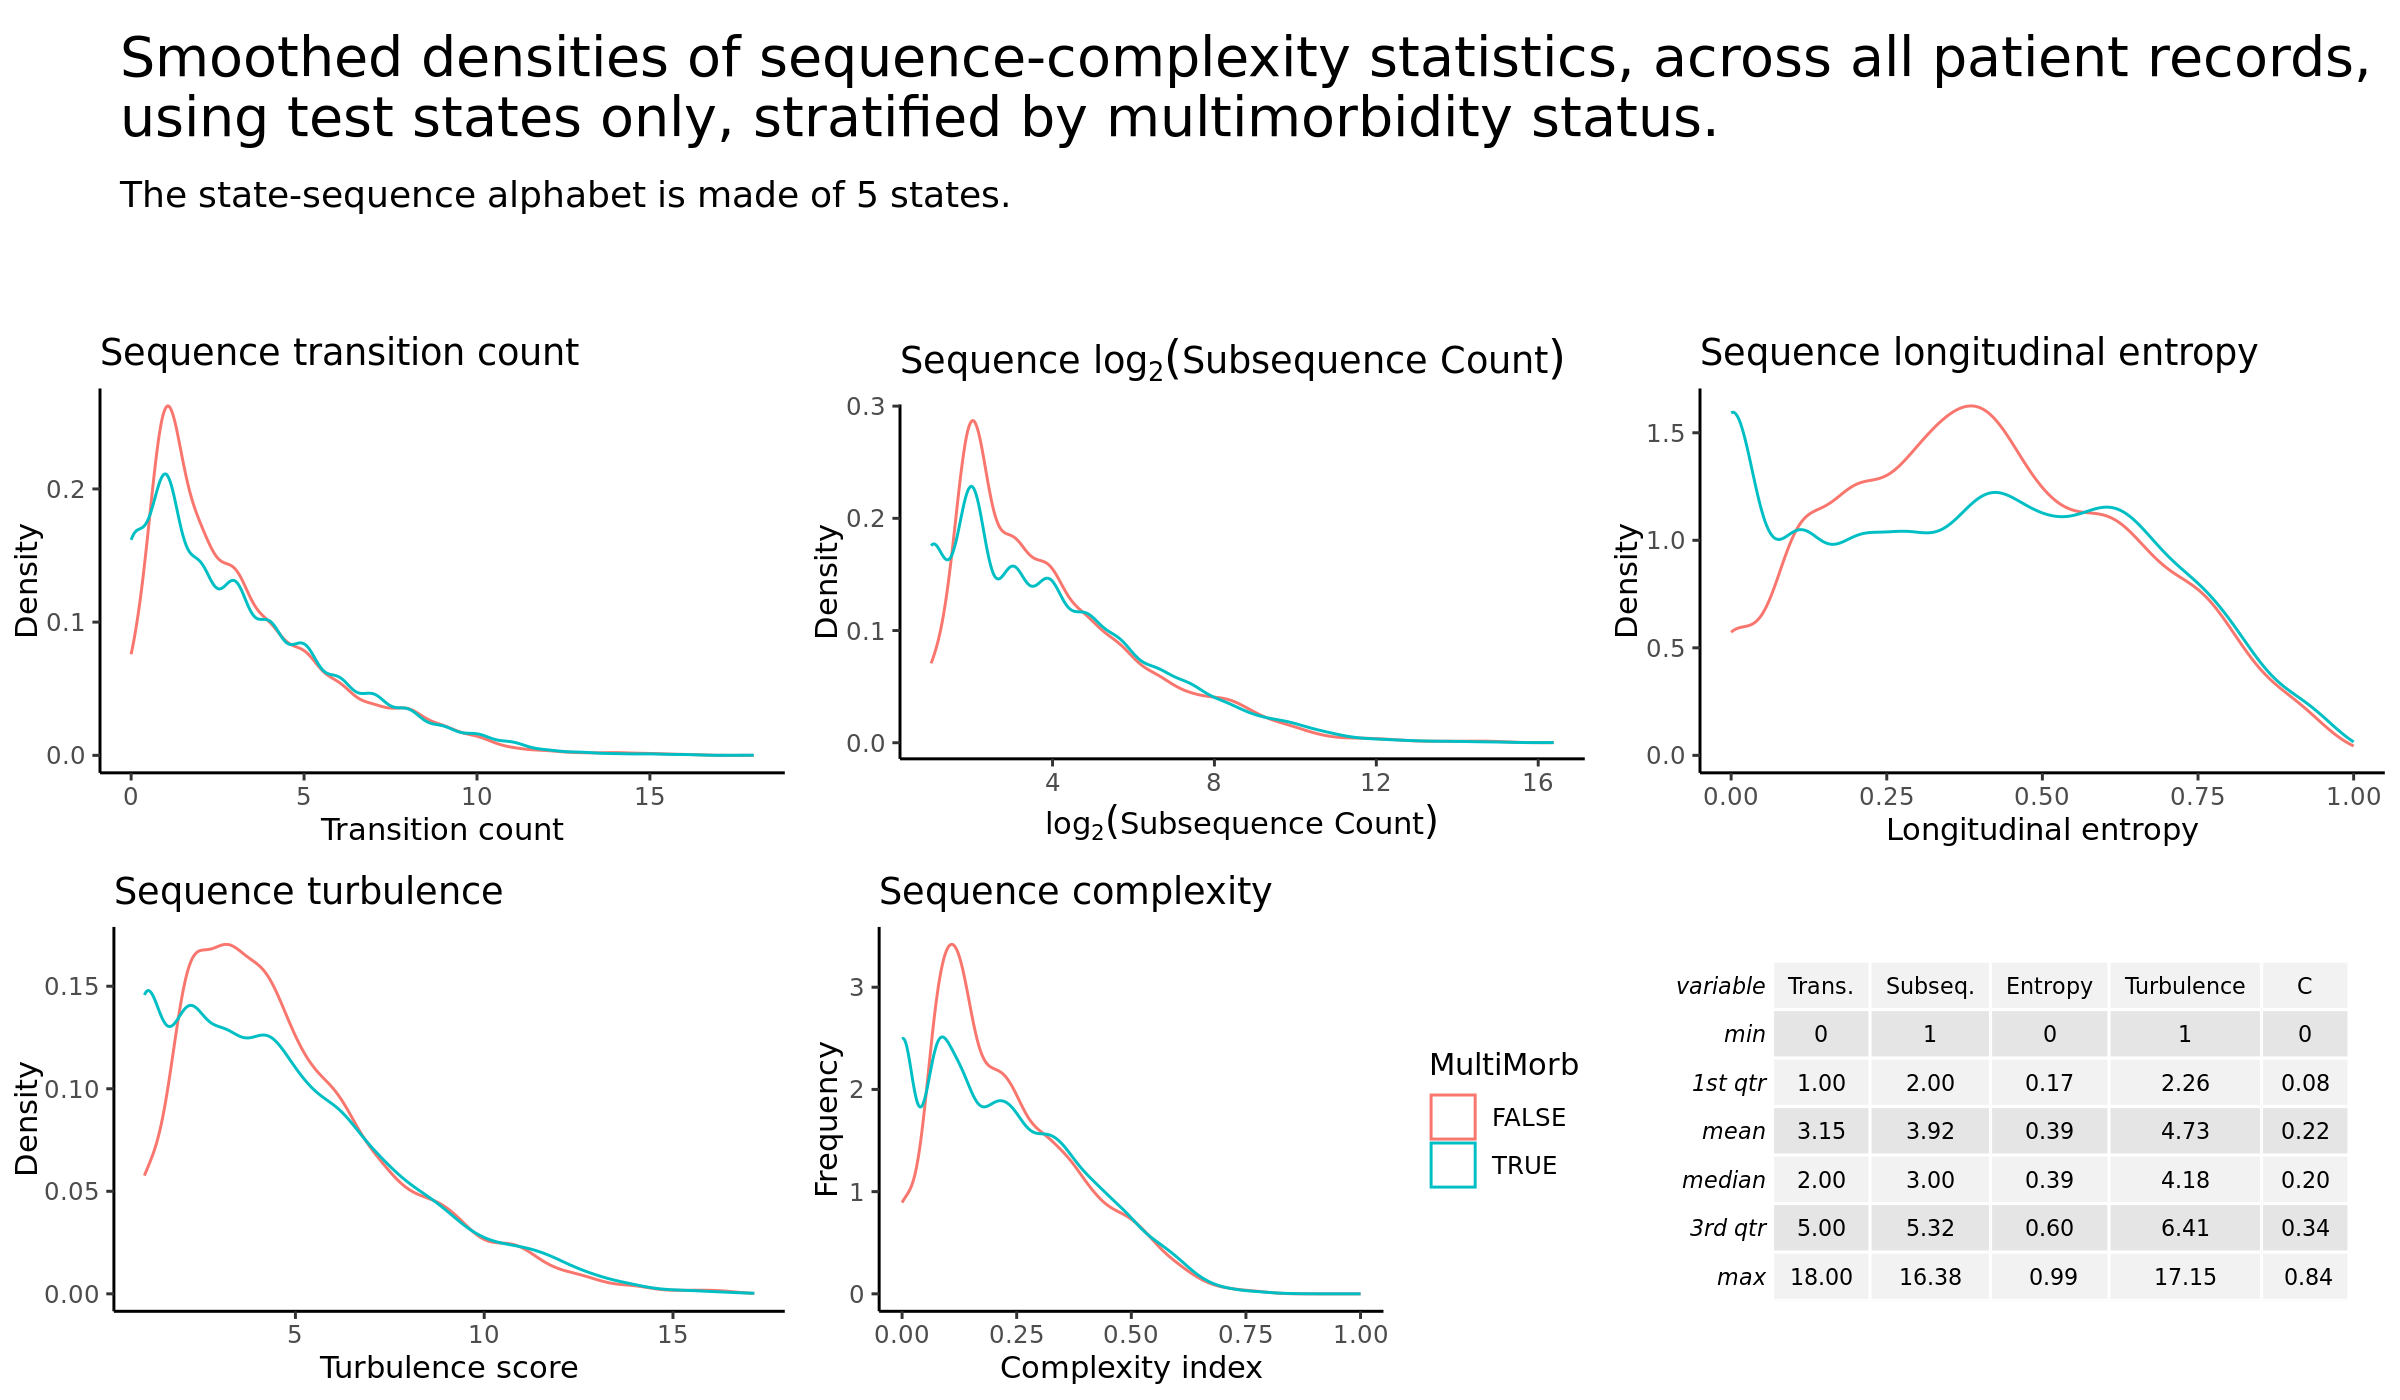

In [156]:
if ( run_complexity_statistics )
    {
        plot_sequenceComplexity_testStates_stratifiedByMultiMorb <-
            fnc.plot.cplx.stats.dists(
                stsObj = sts_seqmine_test_only
                ,geom = "density"
                ,strata = "MultiMorb"
                ,title = "Smoothed densities of sequence-complexity statistics, across all patient records,\nusing test states only, stratified by multimorbidity status."
            )
        plot_sequenceComplexity_testStates_stratifiedByMultiMorb
    }

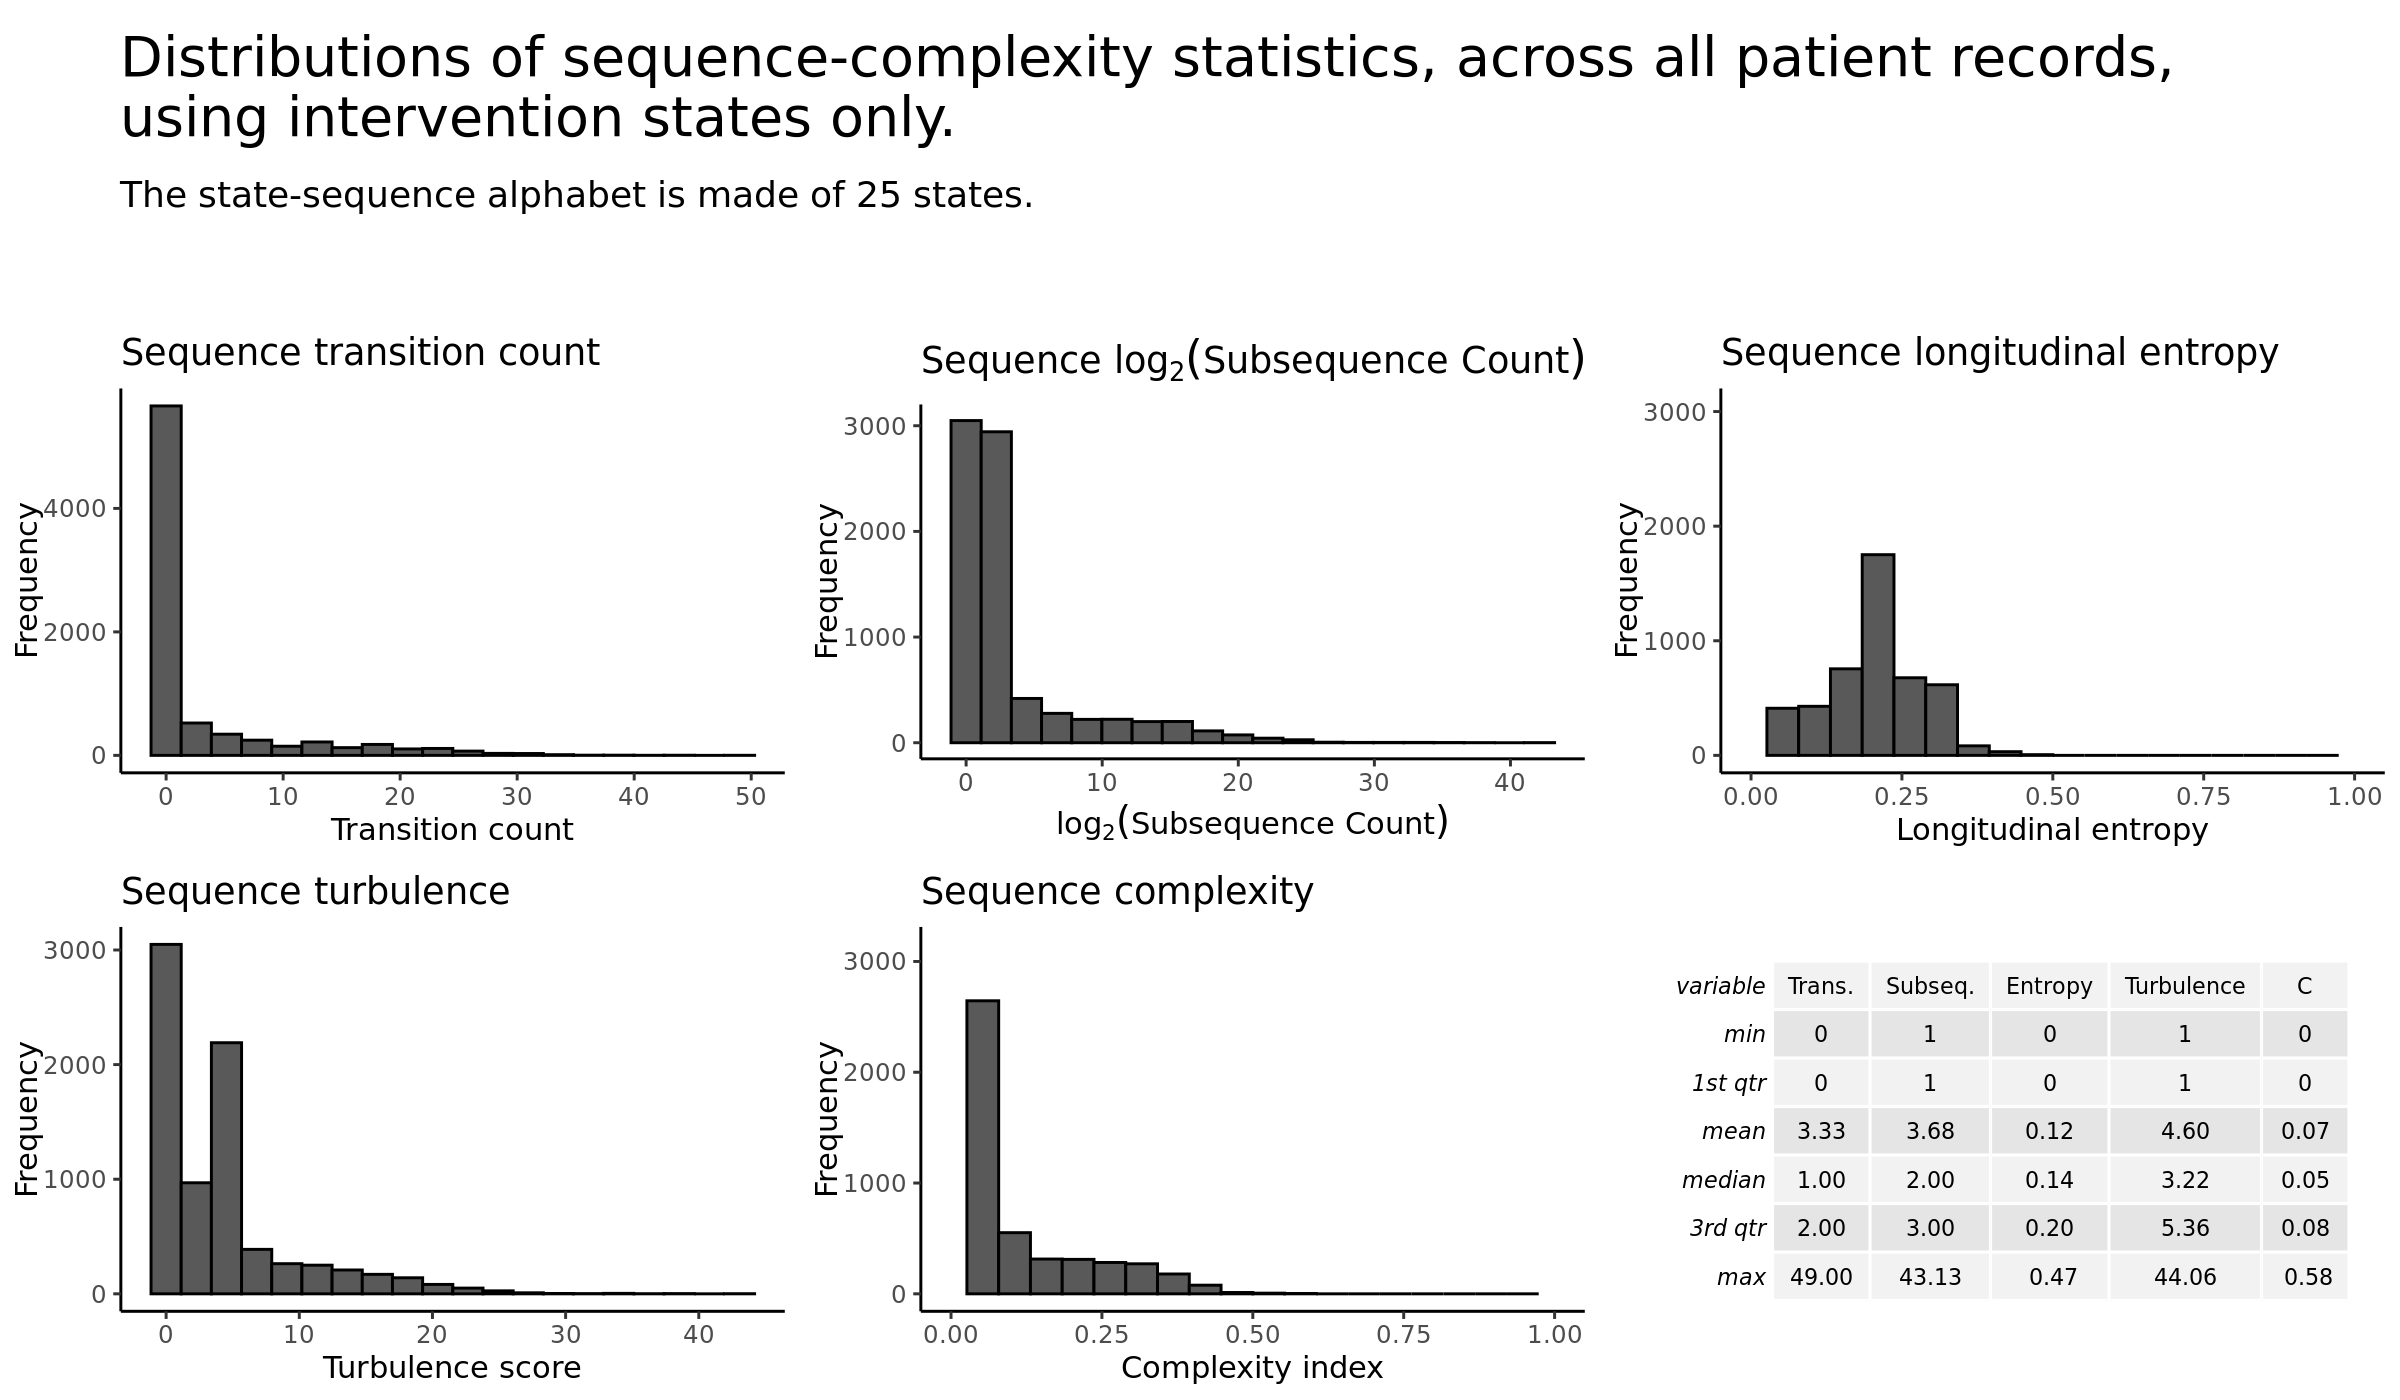

In [157]:
if ( run_complexity_statistics )
    {
        plot_sequenceComplexity_interventionStates <-
            fnc.plot.cplx.stats.dists(
                stsObj = sts_seqmine_intervention_only
                ,geom = "hist"
                ,title = "Distributions of sequence-complexity statistics, across all patient records,\nusing intervention states only."
            )
        plot_sequenceComplexity_interventionStates
    }

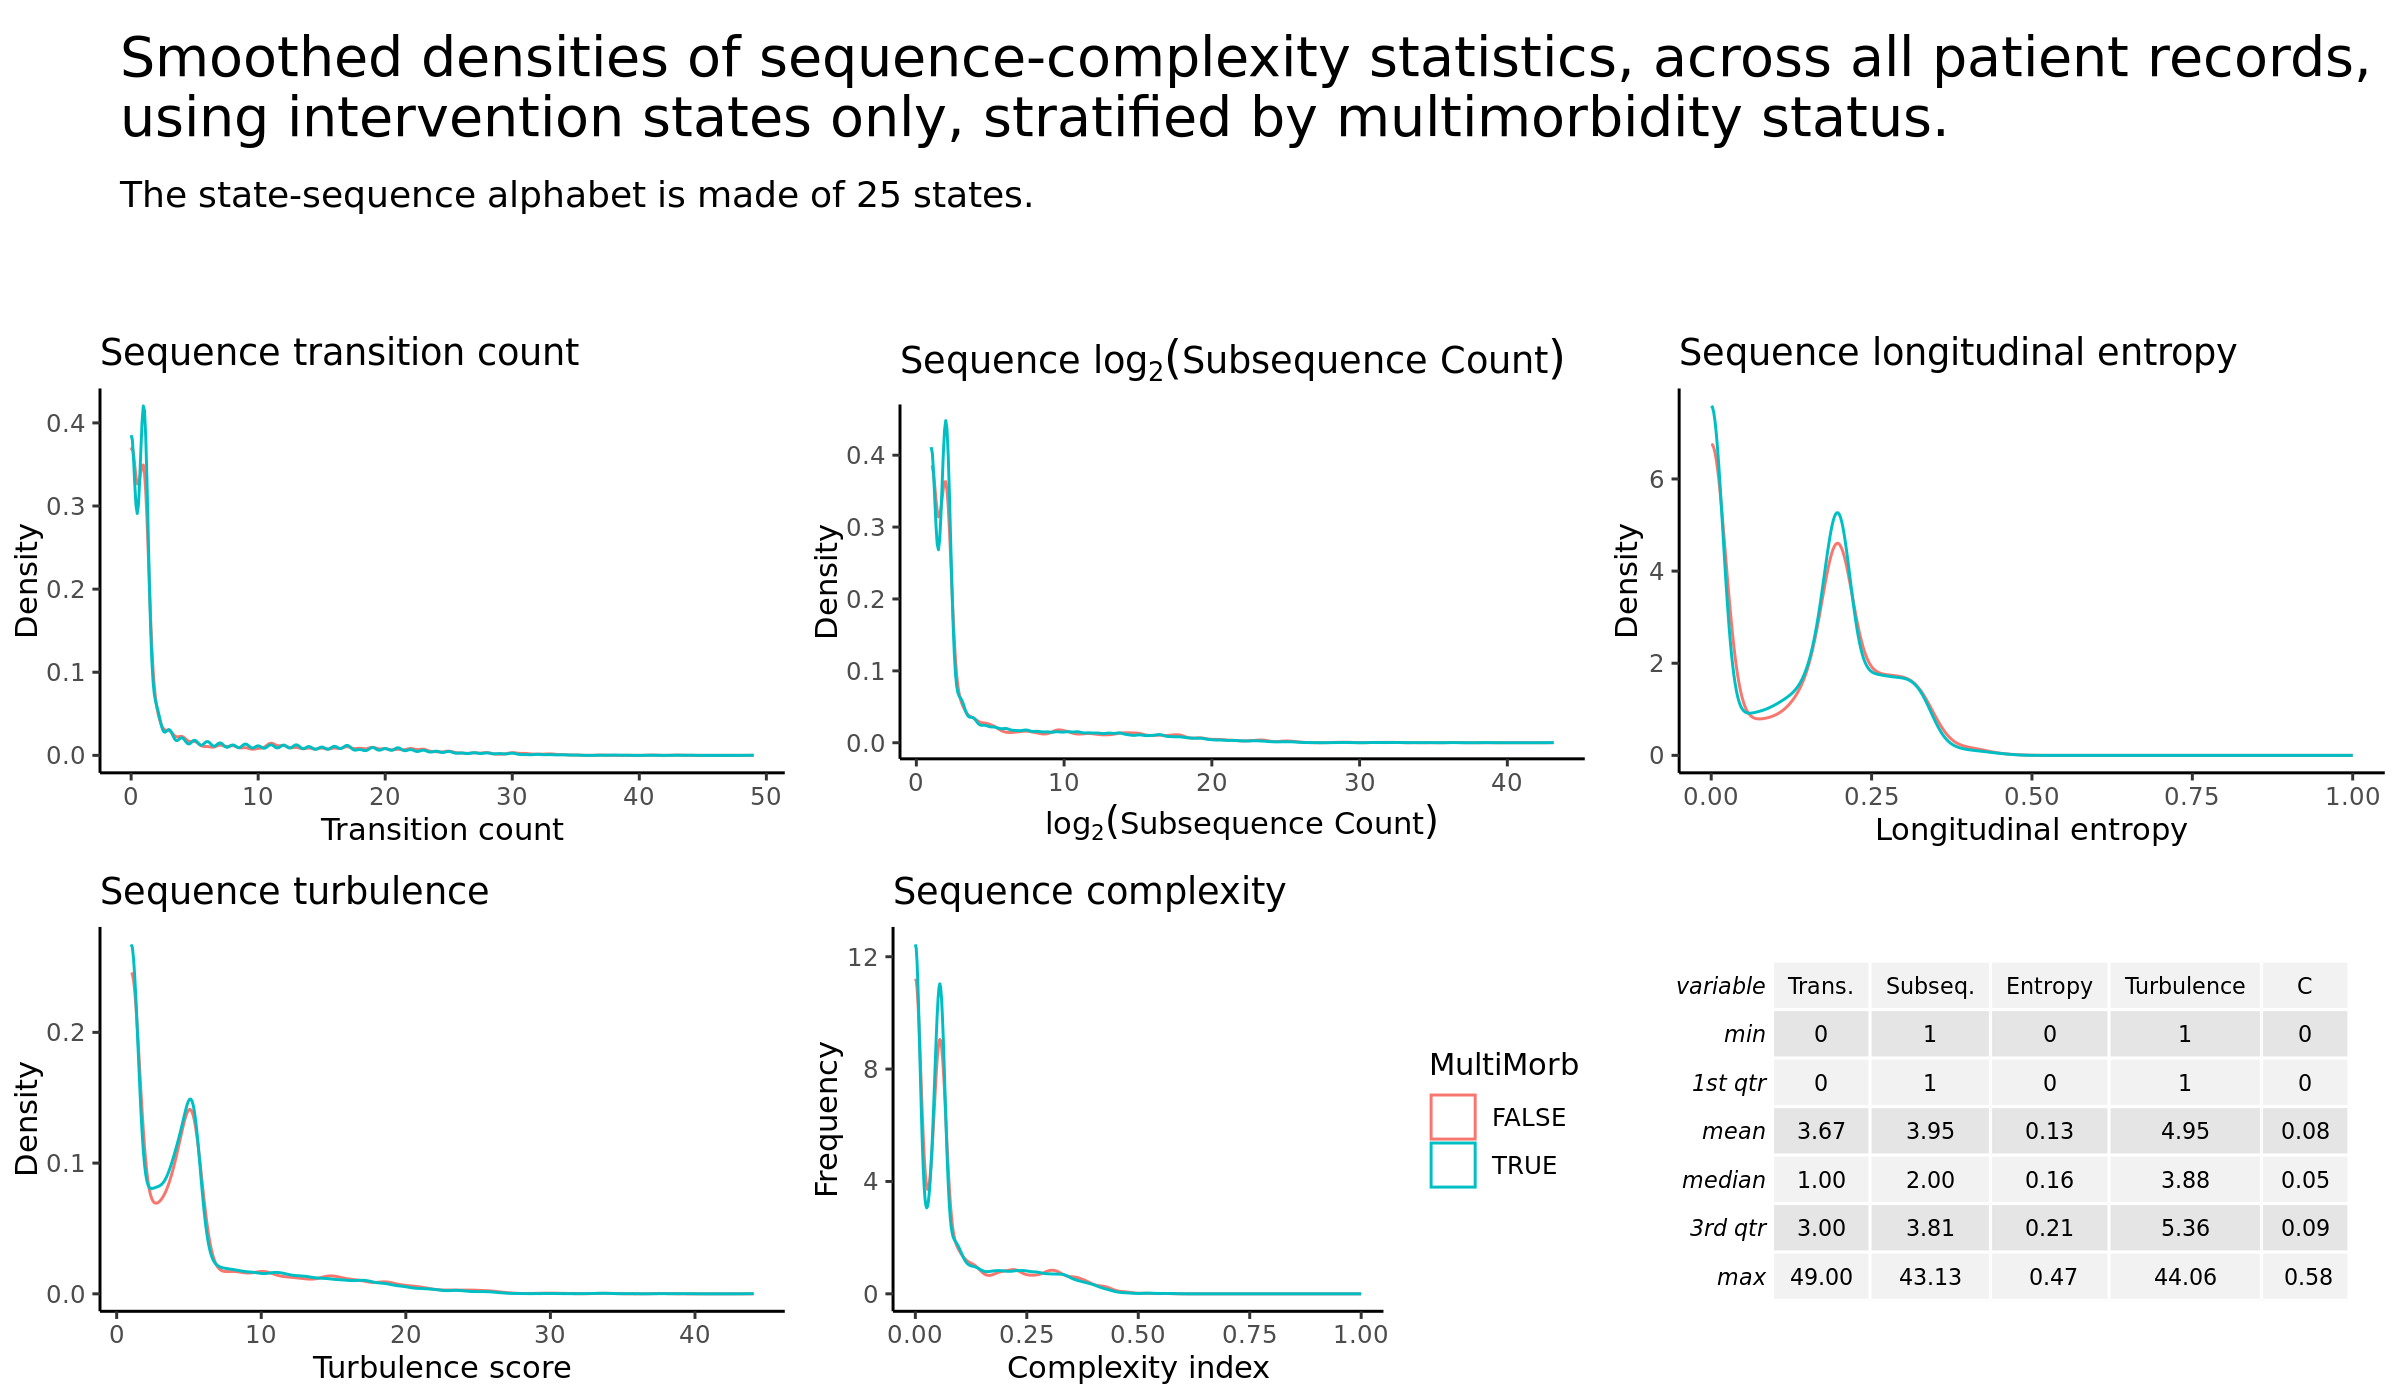

In [158]:
if ( run_complexity_statistics )
    {
        plot_sequenceComplexity_interventionStates_stratifiedByMultiMorb <-
            fnc.plot.cplx.stats.dists(
                stsObj = sts_seqmine_intervention_only
                ,geom = "density"
                ,strata = "MultiMorb"
                ,title = "Smoothed densities of sequence-complexity statistics, across all patient records,\nusing intervention states only, stratified by multimorbidity status."
            )
        plot_sequenceComplexity_interventionStates_stratifiedByMultiMorb
    }

Some initial observations of the distribution plots:
- Compared to the previous iteration where we looked at sequences from diagnosis, these sequences 10 years after diagnosis show less complexity.
    - Evidenced by a left shift in all histograms, for the plots pretaining to all events.
- Compared to the previous iteration where we looked at sequences from diagnosis, the complexity of test-status sequences is spread throughout the range, showing greater complexity, on average.
    - Evidenced by a right shift in all histograms, for the plots pretaining to test-status events.
- Compared to the previous iteration where we looked at sequences from diagnosis, the complexity of intervention sequences is similar.

### Sankey plots

<b>Note: The Sankey plots show data that are in <u>ST</u>ate <u>S</u>equence format. This means that:</b>
1. <b>the number of sequence steps is decided by the maximum number of sequence steps observed across the dataset, _and_</b>
2. <b>a state remains unchanged in the sequence by default, rather than records being lost to follow-up.</b>
<br>
<br>
<br>
<br>



#### Test Statuses
First, I show a basic Sankey plot showing patients' test results at each testing event and visualise the proportion of patient records that switch between test statuses.

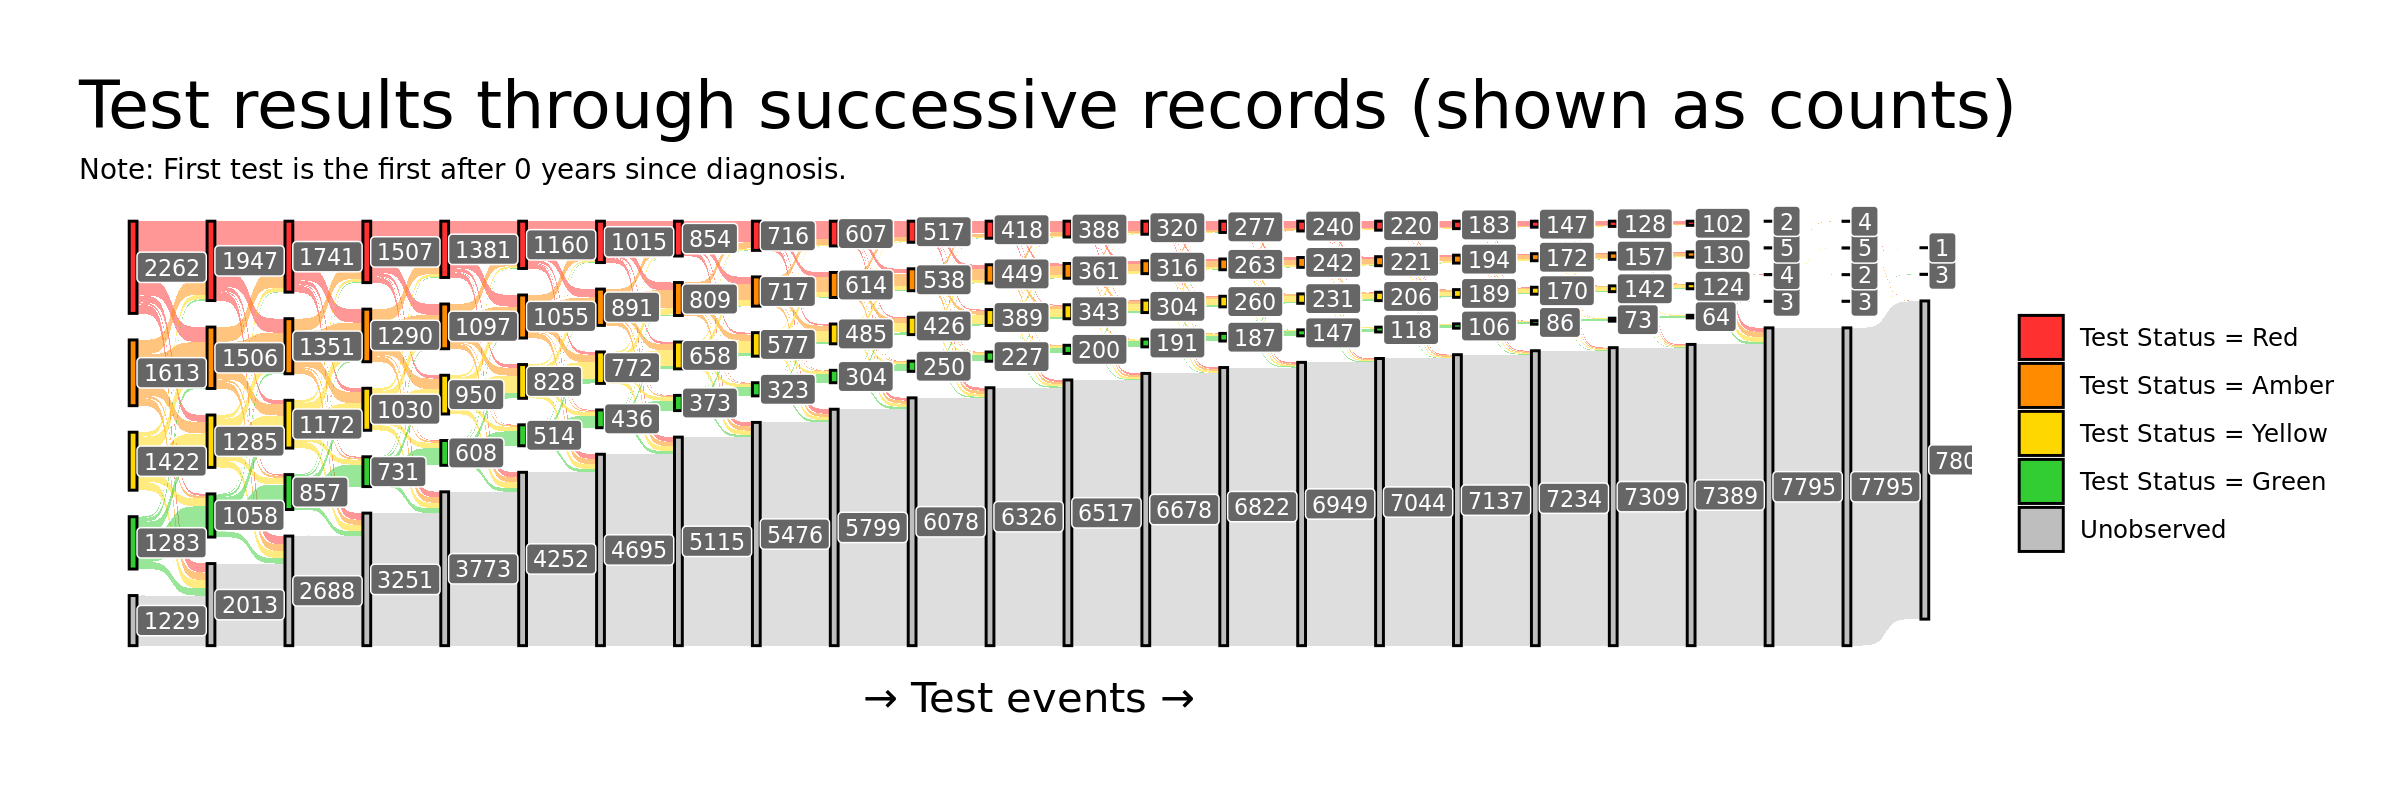

In [7]:
if ( run_Sankey_plots )
    {    
        # Make plot data.
        plotData <-
            sts_seqmine_test_only %>%
            dplyr::select( - last_col() ) %>%
            ggsankey::make_long( colnames( . ) ) %>%
            # Reorder the `node` variable values to make their colours.
            dplyr::mutate_at(
                .vars = vars( node, next_node )
                ,.funs = funs( factor( ., levels = df_event_factor %>% dplyr::filter( stringr::str_detect( event_fct_order, pattern = "Test" ) | event_fct_order == "Unobserved" ) %>% dplyr::select( event_fct_order ) %>% droplevels() %>% dplyr::pull() ) )
            ) %>%
            suppressWarnings()

        # PLot.
        options( repr.plot.width = 12, repr.plot.height = 4, repr.plot.res = 200 )

        plot_testStatus_Sankey <-
            plotData %>%
            ggplot(
                aes(
                    x = x
                    ,next_x = next_x
                    ,node = node %>% factor( ., levels = rev( levels( . ) ) )            # I reverse the order because ggsankey orders 
                    ,next_node = next_node %>% factor( ., levels = rev( levels( . ) ) )  # bottom to top while the legend is ordered
                    ,fill = node                                                         # top to bottom.
                )
            ) +
            ggsankey::geom_sankey( flow.alpha = 0.5, node.color = 1) +
            ggsankey::geom_sankey_label(
                aes(
                  x = as.numeric(x) + .05,
                  label = after_stat( paste0( freq ) )
                ),
                size = 8 / .pt, color = "white", fill = "gray40",
                hjust = 0
              ) +
            scale_fill_manual( values = df_event_factor %>% dplyr::filter( stringr::str_detect( event_fct_order, pattern = "Test" ) | event_fct_order == "Unobserved" ) %>% dplyr::select( event_colours_order ) %>% droplevels() %>% dplyr::pull() ) +
            labs(
                title = "Test results through successive records (shown as counts)"
                ,subtitle = paste0("Note: First test is the first after ", lubridate::interval( date_diagnosis_threshold, date_followup_start ) / lubridate::years(1), " years since diagnosis.")
                ,x = "\u2192 Test events \u2192"
            ) +
            theme_minimal() +
            theme(
                title = element_text( size = 20 )
                ,plot.subtitle = element_text( size = 10 )
                ,axis.title = element_text( size = 15 )
                ,plot.caption = ggtext::element_markdown( size = 10, hjust = 0 )
                ,plot.caption.position = 'plot'
                ,plot.title.position = 'plot'
                ,legend.title = element_blank()
                ,axis.text.y = element_blank()
                ,axis.text.x = element_blank()
                ,plot.margin = unit( c(1, 1, 1, 1), "cm")
                ,axis.title.y = element_text( margin = margin( r = 20 ) )
                ,panel.grid.major = element_blank()
                ,panel.grid.minor = element_blank()
                )

        plot_testStatus_Sankey
    }

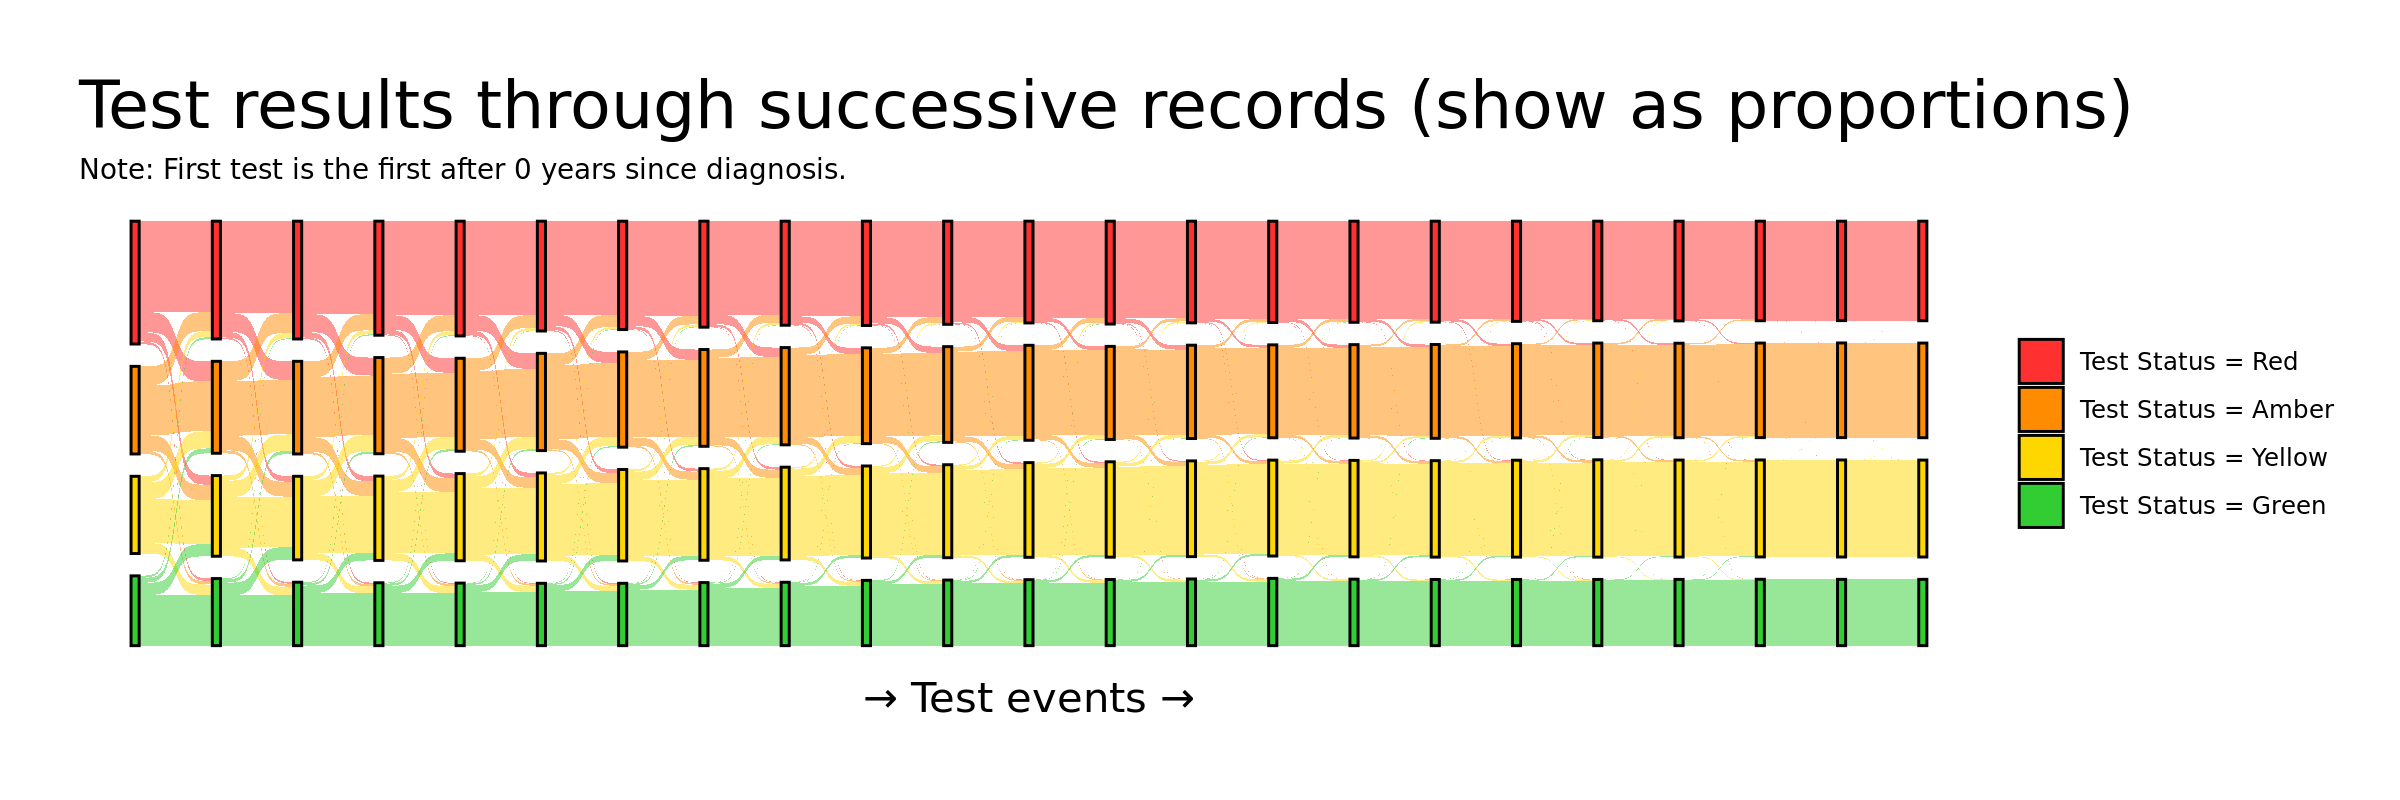

In [8]:
if ( run_Sankey_plots )
    { 
    
        # Make plot data.
        plotData <-
            sts_seqmine_test_only_excludingUnobserved %>%
            dplyr::select( -last_col() ) %>%
            ggsankey::make_long( colnames( . ) ) %>%
            # Reorder the `node` variable values to make their colours.
            dplyr::mutate_at(
                .vars = vars( node, next_node )
                ,.funs = funs( factor( ., levels = df_event_factor %>% dplyr::filter( stringr::str_detect( event_fct_order, pattern = "Test" ) ) %>% dplyr::select( event_fct_order ) %>% droplevels() %>% dplyr::pull() ) )
            ) %>%
            suppressWarnings()

        # PLot.
        options( repr.plot.width = 12, repr.plot.height = 4, repr.plot.res = 200 )

        plot_testStatus_Sankey_excludingUnobserved <-
            plotData %>%
            ggplot(
                aes(
                    x = x
                    ,next_x = next_x
                    ,node = node %>% factor( ., levels = rev( levels( . ) ) )            # I reverse the order because ggsankey orders 
                    ,next_node = next_node %>% factor( ., levels = rev( levels( . ) ) )  # bottom to top while the legend is ordered
                    ,fill = node                                                         # top to bottom.
                )
            ) +
            ggsankey::geom_sankey( flow.alpha = 0.5, node.color = 1 ) +
            scale_fill_manual( values = df_event_factor %>% dplyr::filter( stringr::str_detect( event_fct_order, pattern = "Test" ) ) %>% dplyr::select( event_colours_order ) %>% droplevels() %>% dplyr::pull() ) +
            labs(
                title = "Test results through successive records (show as proportions)"
                ,subtitle = paste0("Note: First test is the first after ", lubridate::interval( date_diagnosis_threshold, date_followup_start ) / lubridate::years(1), " years since diagnosis.")
                ,x = "\u2192 Test events \u2192"
            ) +
            theme_minimal() +
            theme(
                title = element_text( size = 20 )
                ,plot.subtitle = element_text( size = 10 )
                ,axis.title = element_text( size = 15 )
                ,plot.caption = ggtext::element_markdown( size = 10, hjust = 0 )
                ,plot.caption.position = 'plot'
                ,plot.title.position = 'plot'
                ,legend.title = element_blank()
                ,axis.text.y = element_blank()
                ,axis.text.x = element_blank()
                ,plot.margin = unit( c(1, 1, 1, 1), "cm")
                ,axis.title.y = element_text( margin = margin( r = 20 ) )
                ,panel.grid.major = element_blank()
                ,panel.grid.minor = element_blank()
                )

        plot_testStatus_Sankey_excludingUnobserved
    }

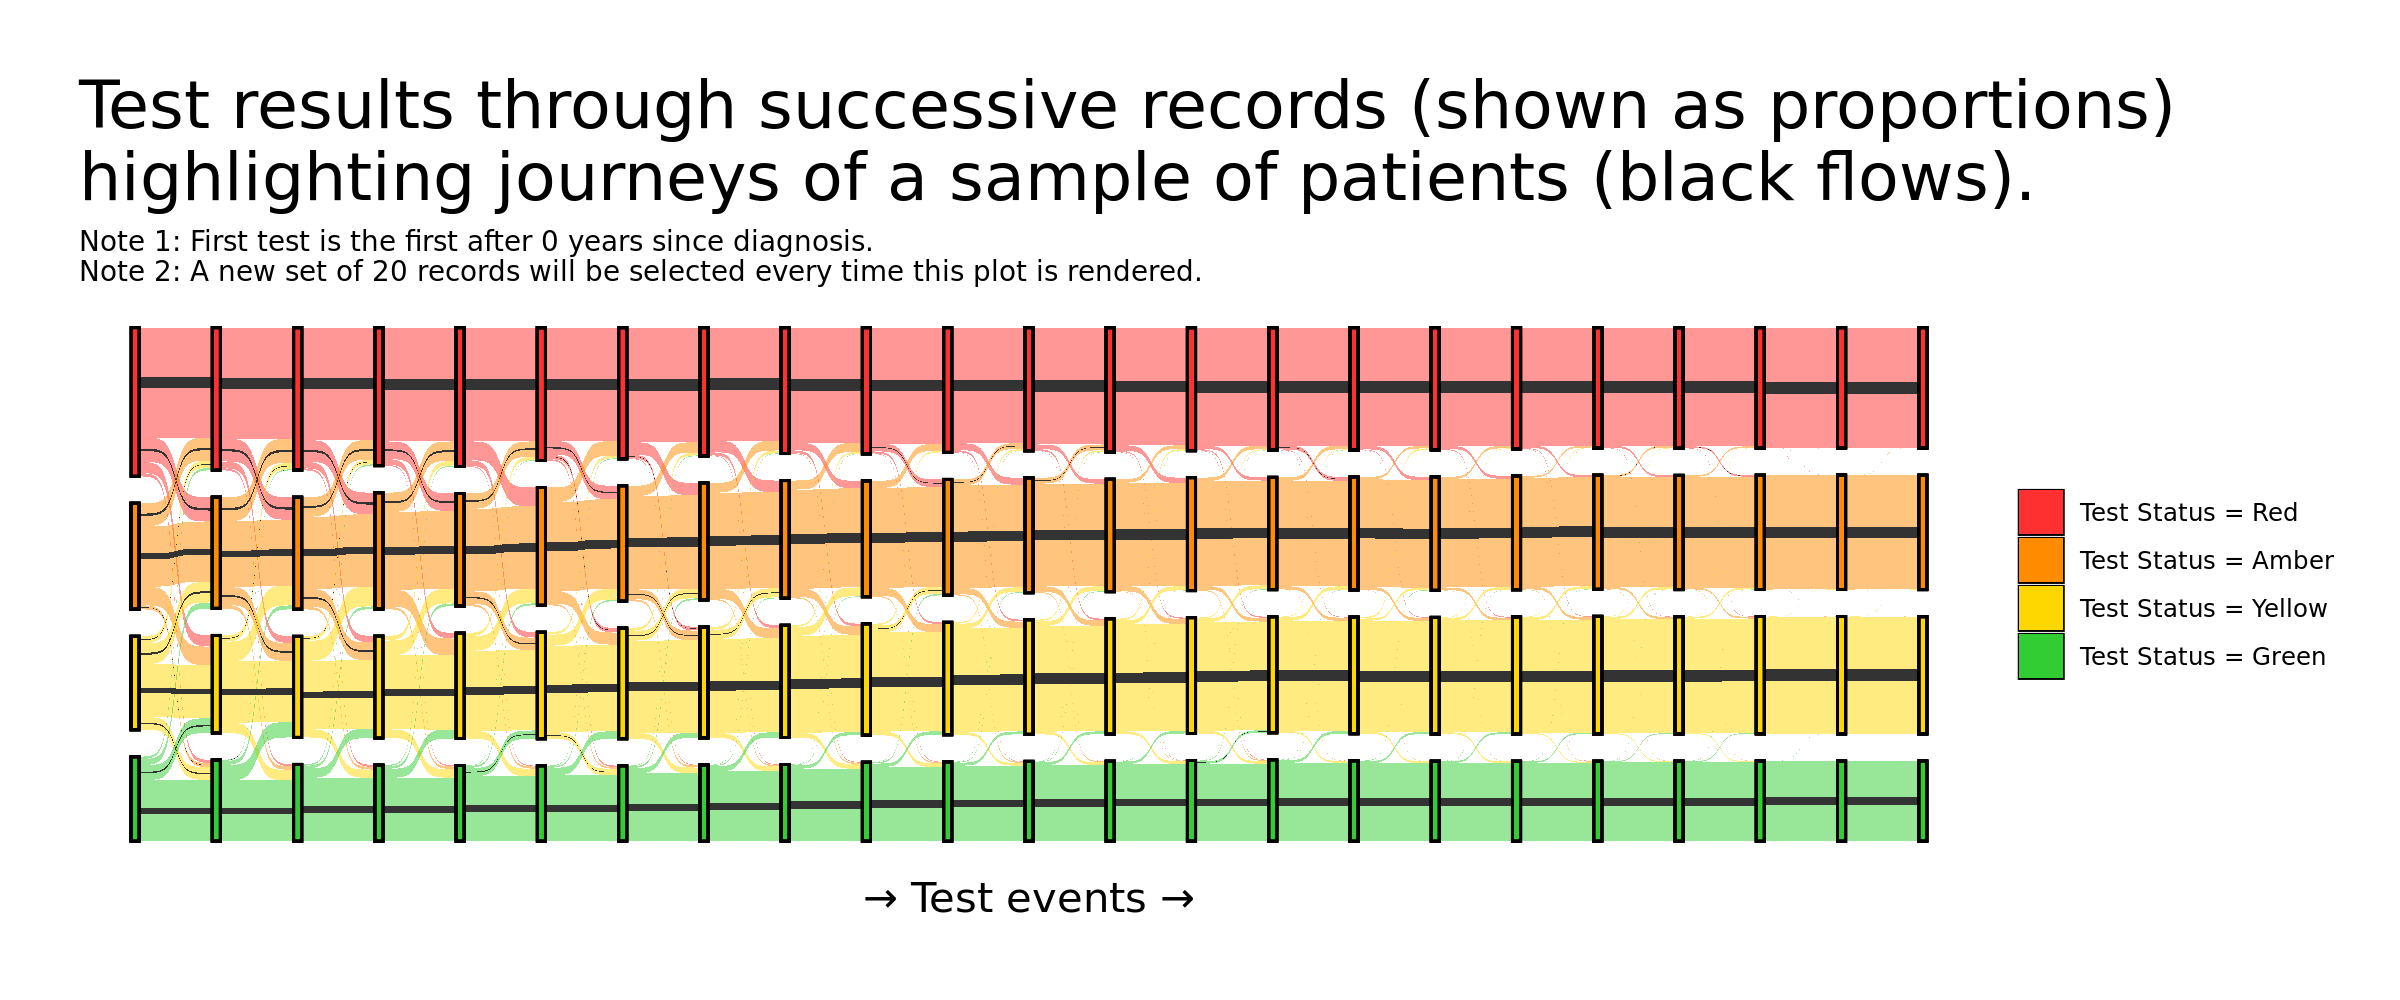

In [9]:
if ( run_Sankey_plots )
    {
    
        # Set plot parameters.
        n_records_to_sample <- 20
    
        # Make plot data.
        plotData <-
            sts_seqmine_test_only_excludingUnobserved %>%
            dplyr::select( -last_col() ) %>%
            ggsankey::make_long( colnames( . ), subset.logic = "random", n.random = n_records_to_sample ) %>%
            # Reorder the `node` variable values to make their colours.
            dplyr::mutate_at(
                .vars = vars( node, next_node )
                ,.funs = funs( factor( ., levels = df_event_factor %>% dplyr::filter( stringr::str_detect( event_fct_order, pattern = "Test" ) ) %>% dplyr::select( event_fct_order ) %>% droplevels() %>% dplyr::pull() ) )
            ) %>%
            suppressWarnings()

        # PLot.
        options( repr.plot.width = 12, repr.plot.height = 5, repr.plot.res = 200 )

        plot_testStatus_Sankey_excludingUnobserved <-
            plotData %>%
            ggplot(
                aes(
                    x = x
                    ,next_x = next_x
                    ,node = node %>% factor( ., levels = rev( levels( . ) ) )            # I reverse the order because ggsankey orders 
                    ,next_node = next_node %>% factor( ., levels = rev( levels( . ) ) )  # bottom to top while the legend is ordered
                    ,fill = node                                                         # top to bottom.
                )
            ) +
            ggsankey::geom_sankey( flow.alpha = 0.5, node.color = 1 ) +
            ggsankey::geom_sankey_subset( mapping = ggplot2::aes( subset.idx = subset.idx ) ) +
            scale_fill_manual( values = df_event_factor %>% dplyr::filter( stringr::str_detect( event_fct_order, pattern = "Test" ) ) %>% dplyr::select( event_colours_order ) %>% droplevels() %>% dplyr::pull() ) +
            labs(
                title = "Test results through successive records (shown as proportions)\nhighlighting journeys of a sample of patients (black flows)."
                ,subtitle = paste0(
                    "Note 1: First test is the first after ", lubridate::interval( date_diagnosis_threshold, date_followup_start ) / lubridate::years(1), " years since diagnosis.\n"
                    ,"Note 2: A new set of ", n_records_to_sample," records will be selected every time this plot is rendered."
                )
                ,x = "\u2192 Test events \u2192"
            ) +
            theme_minimal() +
            theme(
                title = element_text( size = 20 )
                ,plot.subtitle = element_text( size = 10 )
                ,axis.title = element_text( size = 15 )
                ,plot.caption = ggtext::element_markdown( size = 10, hjust = 0 )
                ,plot.caption.position = 'plot'
                ,plot.title.position = 'plot'
                ,legend.title = element_blank()
                ,axis.text.y = element_blank()
                ,axis.text.x = element_blank()
                ,plot.margin = unit( c(1, 1, 1, 1), "cm")
                ,axis.title.y = element_text( margin = margin( r = 20 ) )
                ,panel.grid.major = element_blank()
                ,panel.grid.minor = element_blank()
                )

        plot_testStatus_Sankey_excludingUnobserved
    }

Some initial observations from the Test Statuses Sankey diagram:
1. __The overall count of patient records in each level of Test Status is approximately stable.__
    - Evidenced by little variation in the height of the vertical bars in the plots of proportions over time.
2. __Patient records indicating a particular Test Status level predominantly stay in that Test Status level.__
    - Evidenced by the majority of black flows joining subsequent vertical bars almost exclusively from the the same Test Status level.
3. __The Test Status levels that change between every test event rarely change by more than one level.__
    - Evidenced by the barely-visible flows linking bars at subsequent test points that are not vertically adjacent.

#### H.M.A. strata

In the next plot, the Sankey plot visualises the proportions of patient records moving between strata of the H.M.A. stratification.

H.M.A. stratification is something CB proposed. It has four strata infomed by two components: the testing interval since the previous test {'Expected', 'Shorter-than-expected'}, and the change in prescriptions compared with the previous testing interval {'No observed change', 'Observed change'}. The stratification gets its name from the four strata: (0,0)-Run; (1,0)-Monitor; (0 or 1,1)-Adjust.

The first task is to create a new state-sequence object that tracks H.M.A. strata.

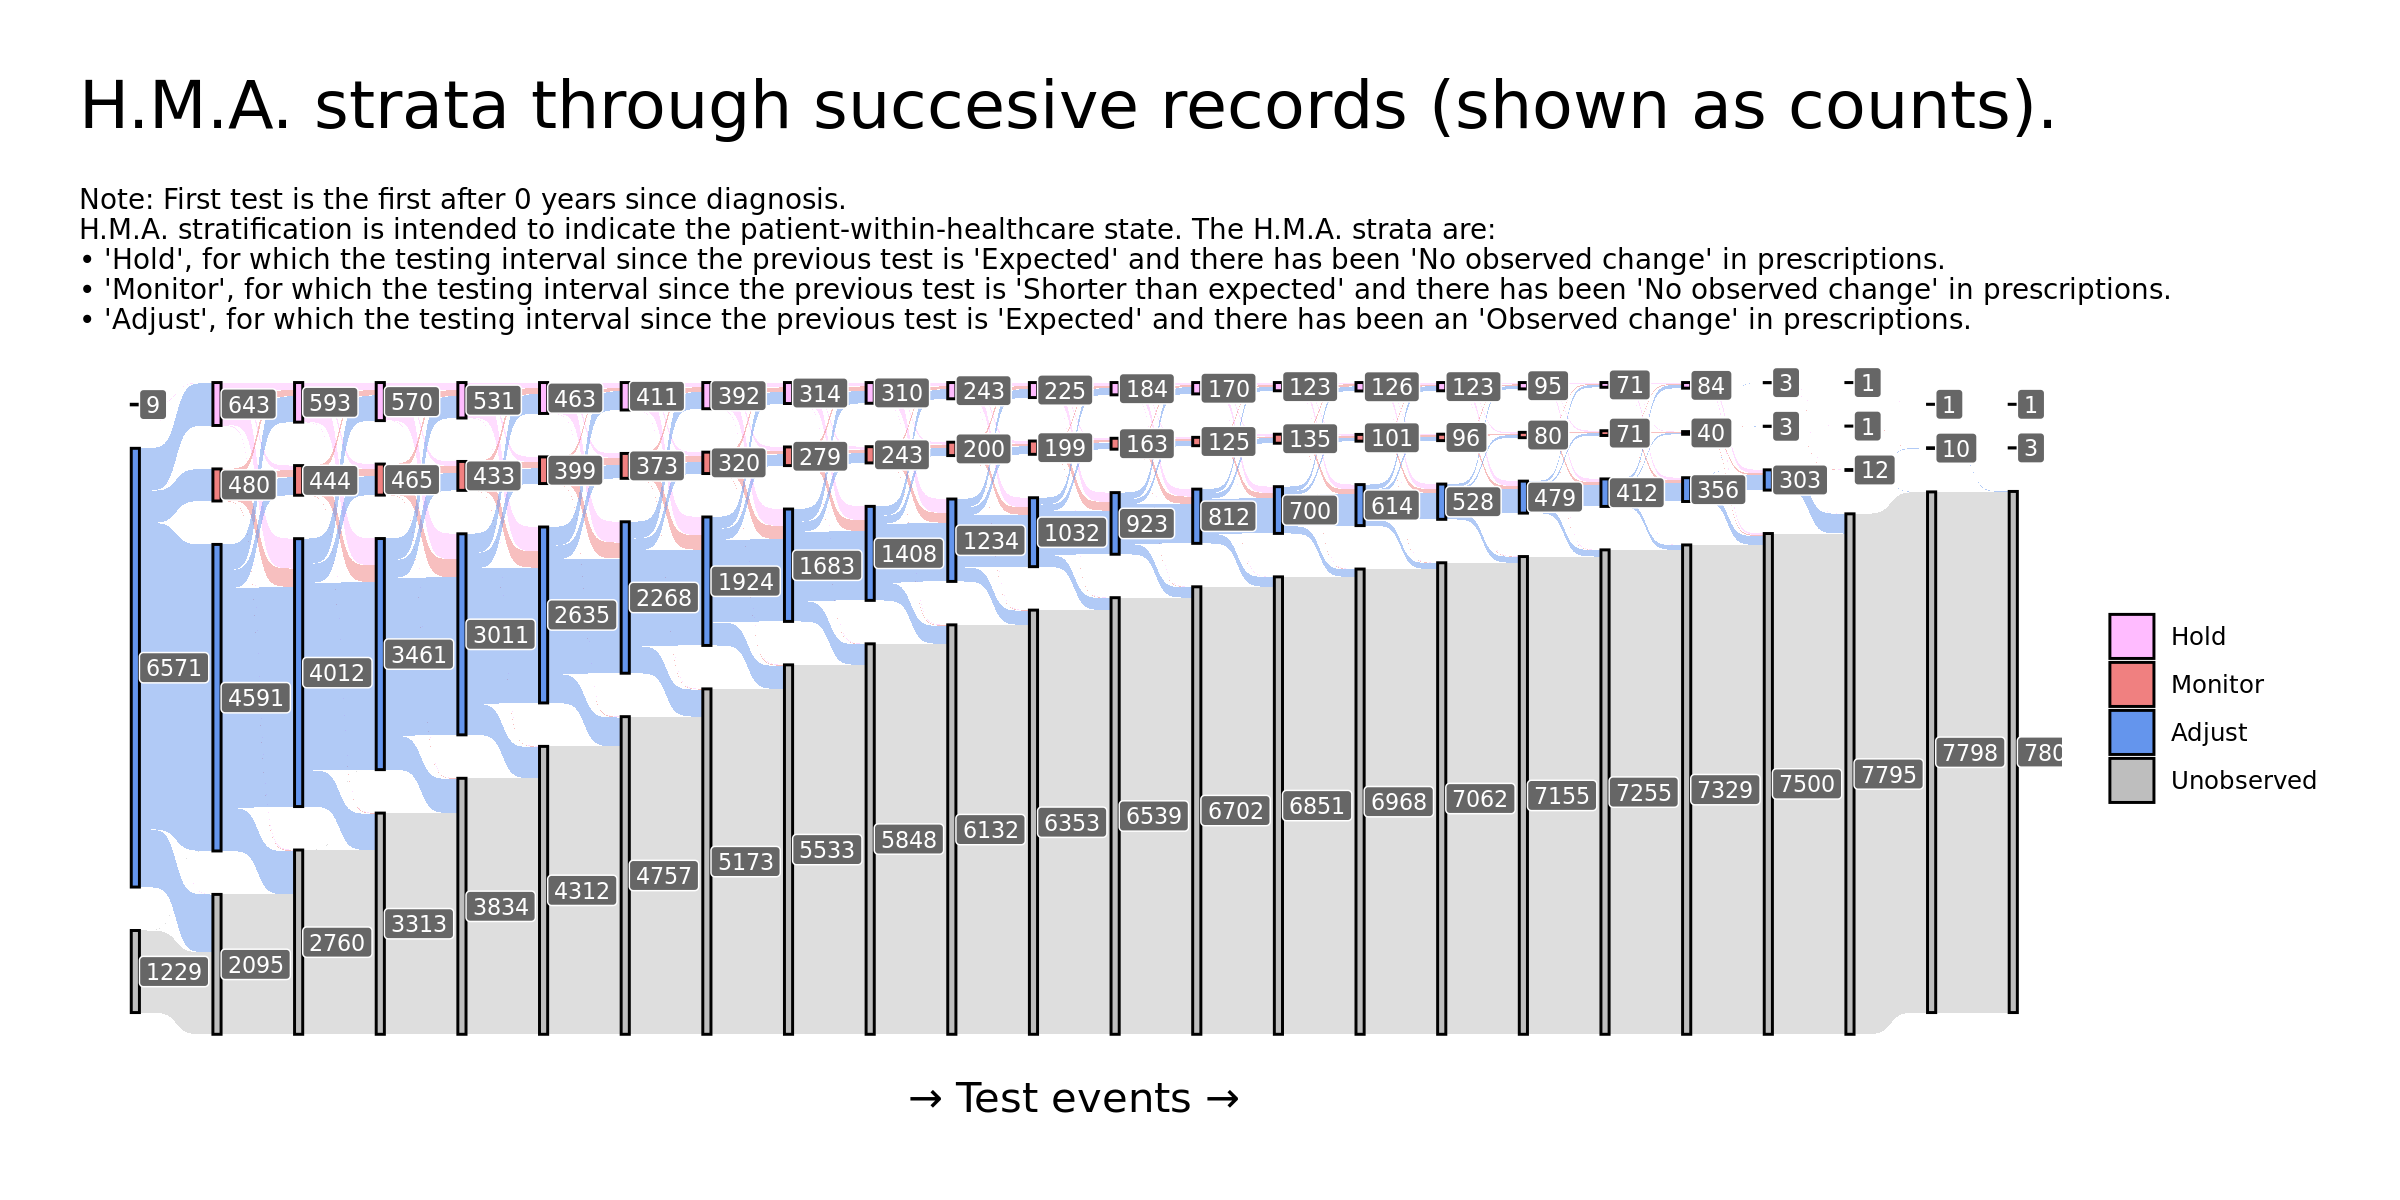

In [10]:
if ( run_Sankey_plots )
    {
        # Make plot data.
        plotData <-
            sts_seqmine_HMA %>%
            dplyr::select( - last_col() ) %>%
            ggsankey::make_long( colnames( . ) ) %>%
            # Reorder the `node` variable values to make their colours.
            dplyr::mutate_at(
                .vars = vars( node, next_node )
                ,.funs = funs( factor( ., levels = df_HMA_factor %>% dplyr::distinct( HMA_fct_order ) %>% dplyr::pull() ) )
            ) %>%
            suppressWarnings()

        # Plot.
        options( repr.plot.width = 12, repr.plot.height = 6, repr.plot.res = 200 )

        plot_HMA_Sankey <-
            plotData %>%
            ggplot(
                aes(
                    x = x
                    ,next_x = next_x
                    ,node = node %>% factor( ., levels = rev( levels( . ) ) )            # I reverse the order because ggsankey orders 
                    ,next_node = next_node %>% factor( ., levels = rev( levels( . ) ) )  # bottom to top while the legend is ordered
                    ,fill = node                                                         # top to bottom.
                )
            ) +
            ggsankey::geom_sankey( flow.alpha = 0.5, node.color = 1) +
            ggsankey::geom_sankey_label(
                aes(
                  x = as.numeric(x) + .05,
                  label = after_stat(paste0(freq))
                ),
                size = 8 / .pt, color = "white", fill = "gray40",
                hjust = 0
              ) +
            # Colour the strata using a traffic-light palette.
            scale_fill_manual( values = df_HMA_factor %>% dplyr::select( HMA_colours_order ) %>% dplyr::pull() ) +
            labs(
                title = "H.M.A. strata through succesive records (shown as counts)."
               ,subtitle = paste0(
                    paste0("\nNote: First test is the first after ", lubridate::interval( date_diagnosis_threshold, date_followup_start ) / lubridate::years(1), " years since diagnosis.\n")
                    ,"H.M.A. stratification is intended to indicate the patient-within-healthcare state. The H.M.A. strata are:\n"
                    ,"\u2022 'Hold', for which the testing interval since the previous test is 'Expected' and there has been 'No observed change' in prescriptions.\n"
                    ,"\u2022 'Monitor', for which the testing interval since the previous test is 'Shorter than expected' and there has been 'No observed change' in prescriptions.\n"
                    ,"\u2022 'Adjust', for which the testing interval since the previous test is 'Expected' and there has been an 'Observed change' in prescriptions."
                    )
                ,x = "\u2192 Test events \u2192"
            ) +
            theme_minimal() +
            theme(
                title = element_text( size = 20 )
                ,plot.subtitle = element_text( size = 10 )
                ,axis.title = element_text( size = 15 )
                ,plot.caption = ggtext::element_markdown( size = 10, hjust = 0 )
                ,plot.caption.position = 'plot'
                ,plot.title.position = 'plot'
                ,axis.text.y = element_blank()
                ,axis.text.x = element_blank()
                ,plot.margin = unit( c(1, 1, 1, 1), "cm")
                ,axis.title.y = element_text( margin = margin( r = 20 ) )
                ,panel.grid.major = element_blank()
                ,panel.grid.minor = element_blank()
                ,legend.title = element_blank()
                )

        plot_HMA_Sankey
    }

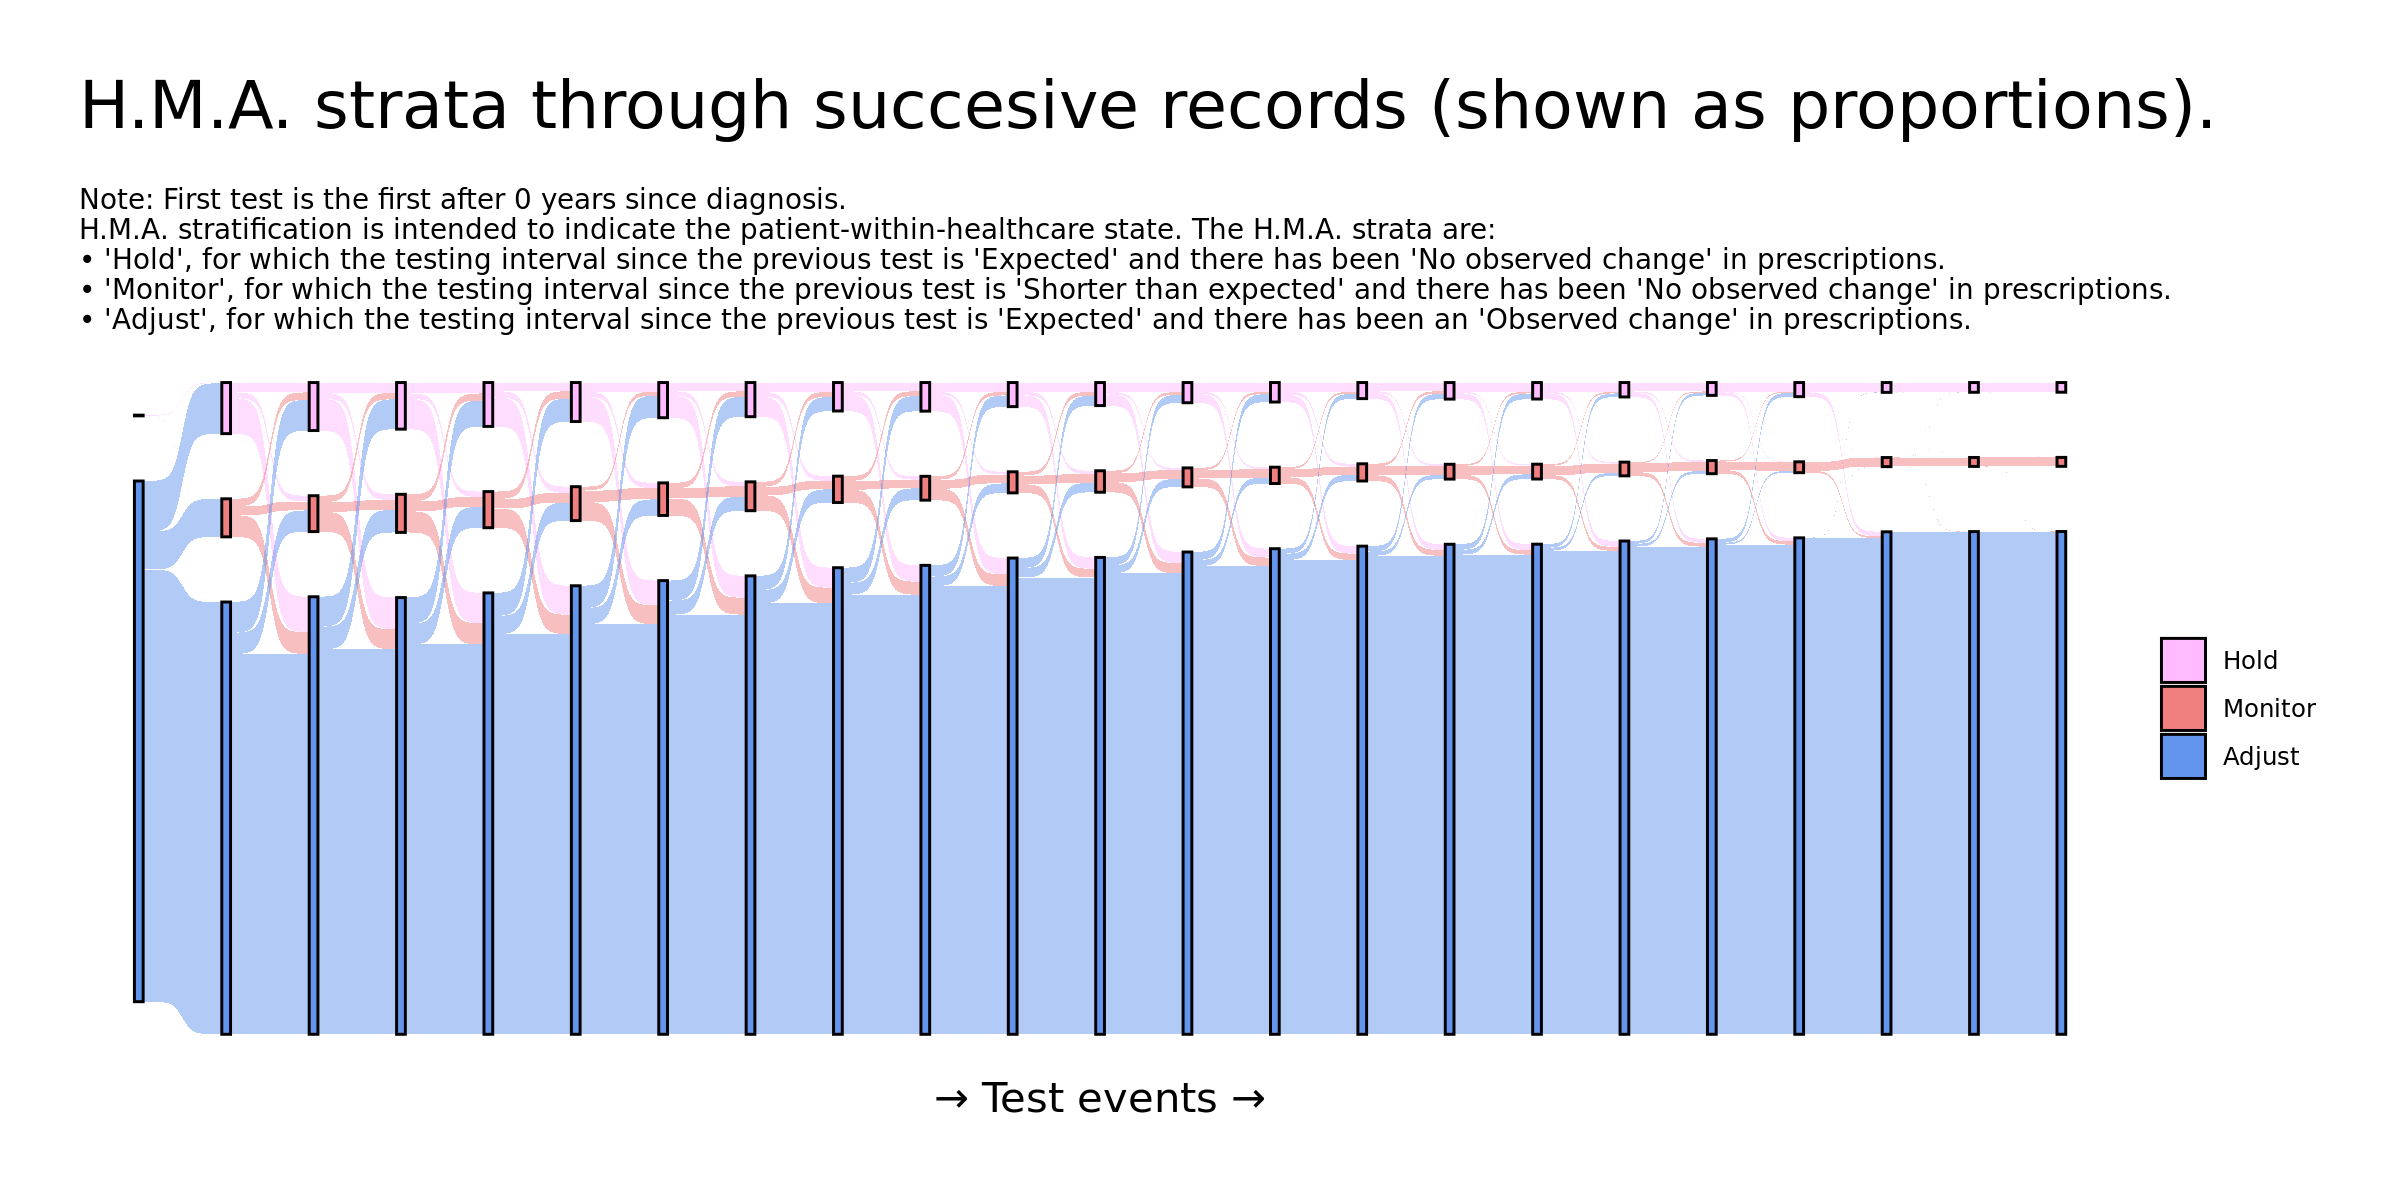

In [11]:
if ( run_Sankey_plots )
    {
        # Make plot data.
        plotData <-
            sts_seqmine_HMA_excludingUnobserved %>%
            dplyr::select( - last_col() ) %>%
            ggsankey::make_long( colnames( . ) ) %>%
            # Reorder the `node` variable values to make their colours.
            dplyr::mutate_at(
                .vars = vars( node, next_node )
                ,.funs = funs( factor( ., levels = df_HMA_factor %>% dplyr::distinct( HMA_fct_order ) %>% dplyr::pull() ) )
            ) %>%
            suppressWarnings()

        # Plot.
        options( repr.plot.width = 12, repr.plot.height = 6, repr.plot.res = 200 )

        plot_HMA_Sankey_excludingUnobserved <-
            plotData %>%
            ggplot(
                aes(
                    x = x
                    ,next_x = next_x
                    ,node = node %>% factor( ., levels = rev( levels( . ) ) )            # I reverse the order because ggsankey orders 
                    ,next_node = next_node %>% factor( ., levels = rev( levels( . ) ) )  # bottom to top while the legend is ordered
                    ,fill = node                                                         # top to bottom.
                )
            ) +
            ggsankey::geom_sankey( flow.alpha = 0.5, node.color = 1) +
            # Colour the strata using a traffic-light palette.
            scale_fill_manual( values = df_HMA_factor %>% dplyr::select( HMA_colours_order ) %>% dplyr::pull() ) +
            labs(
                title = "H.M.A. strata through succesive records (shown as proportions)."
               ,subtitle = paste0(
                    paste0("\nNote: First test is the first after ", lubridate::interval( date_diagnosis_threshold, date_followup_start ) / lubridate::years(1), " years since diagnosis.\n")
                    ,"H.M.A. stratification is intended to indicate the patient-within-healthcare state. The H.M.A. strata are:\n"
                    ,"\u2022 'Hold', for which the testing interval since the previous test is 'Expected' and there has been 'No observed change' in prescriptions.\n"
                    ,"\u2022 'Monitor', for which the testing interval since the previous test is 'Shorter than expected' and there has been 'No observed change' in prescriptions.\n"
                    ,"\u2022 'Adjust', for which the testing interval since the previous test is 'Expected' and there has been an 'Observed change' in prescriptions."
                    )
                ,x = "\u2192 Test events \u2192"
            ) +
            theme_minimal() +
            theme(
                title = element_text( size = 20 )
                ,plot.subtitle = element_text( size = 10 )
                ,axis.title = element_text( size = 15 )
                ,plot.caption = ggtext::element_markdown( size = 10, hjust = 0 )
                ,plot.caption.position = 'plot'
                ,plot.title.position = 'plot'
                ,axis.text.y = element_blank()
                ,axis.text.x = element_blank()
                ,plot.margin = unit( c(1, 1, 1, 1), "cm")
                ,axis.title.y = element_text( margin = margin( r = 20 ) )
                ,panel.grid.major = element_blank()
                ,panel.grid.minor = element_blank()
                ,legend.title = element_blank()
                )

        plot_HMA_Sankey_excludingUnobserved
    }

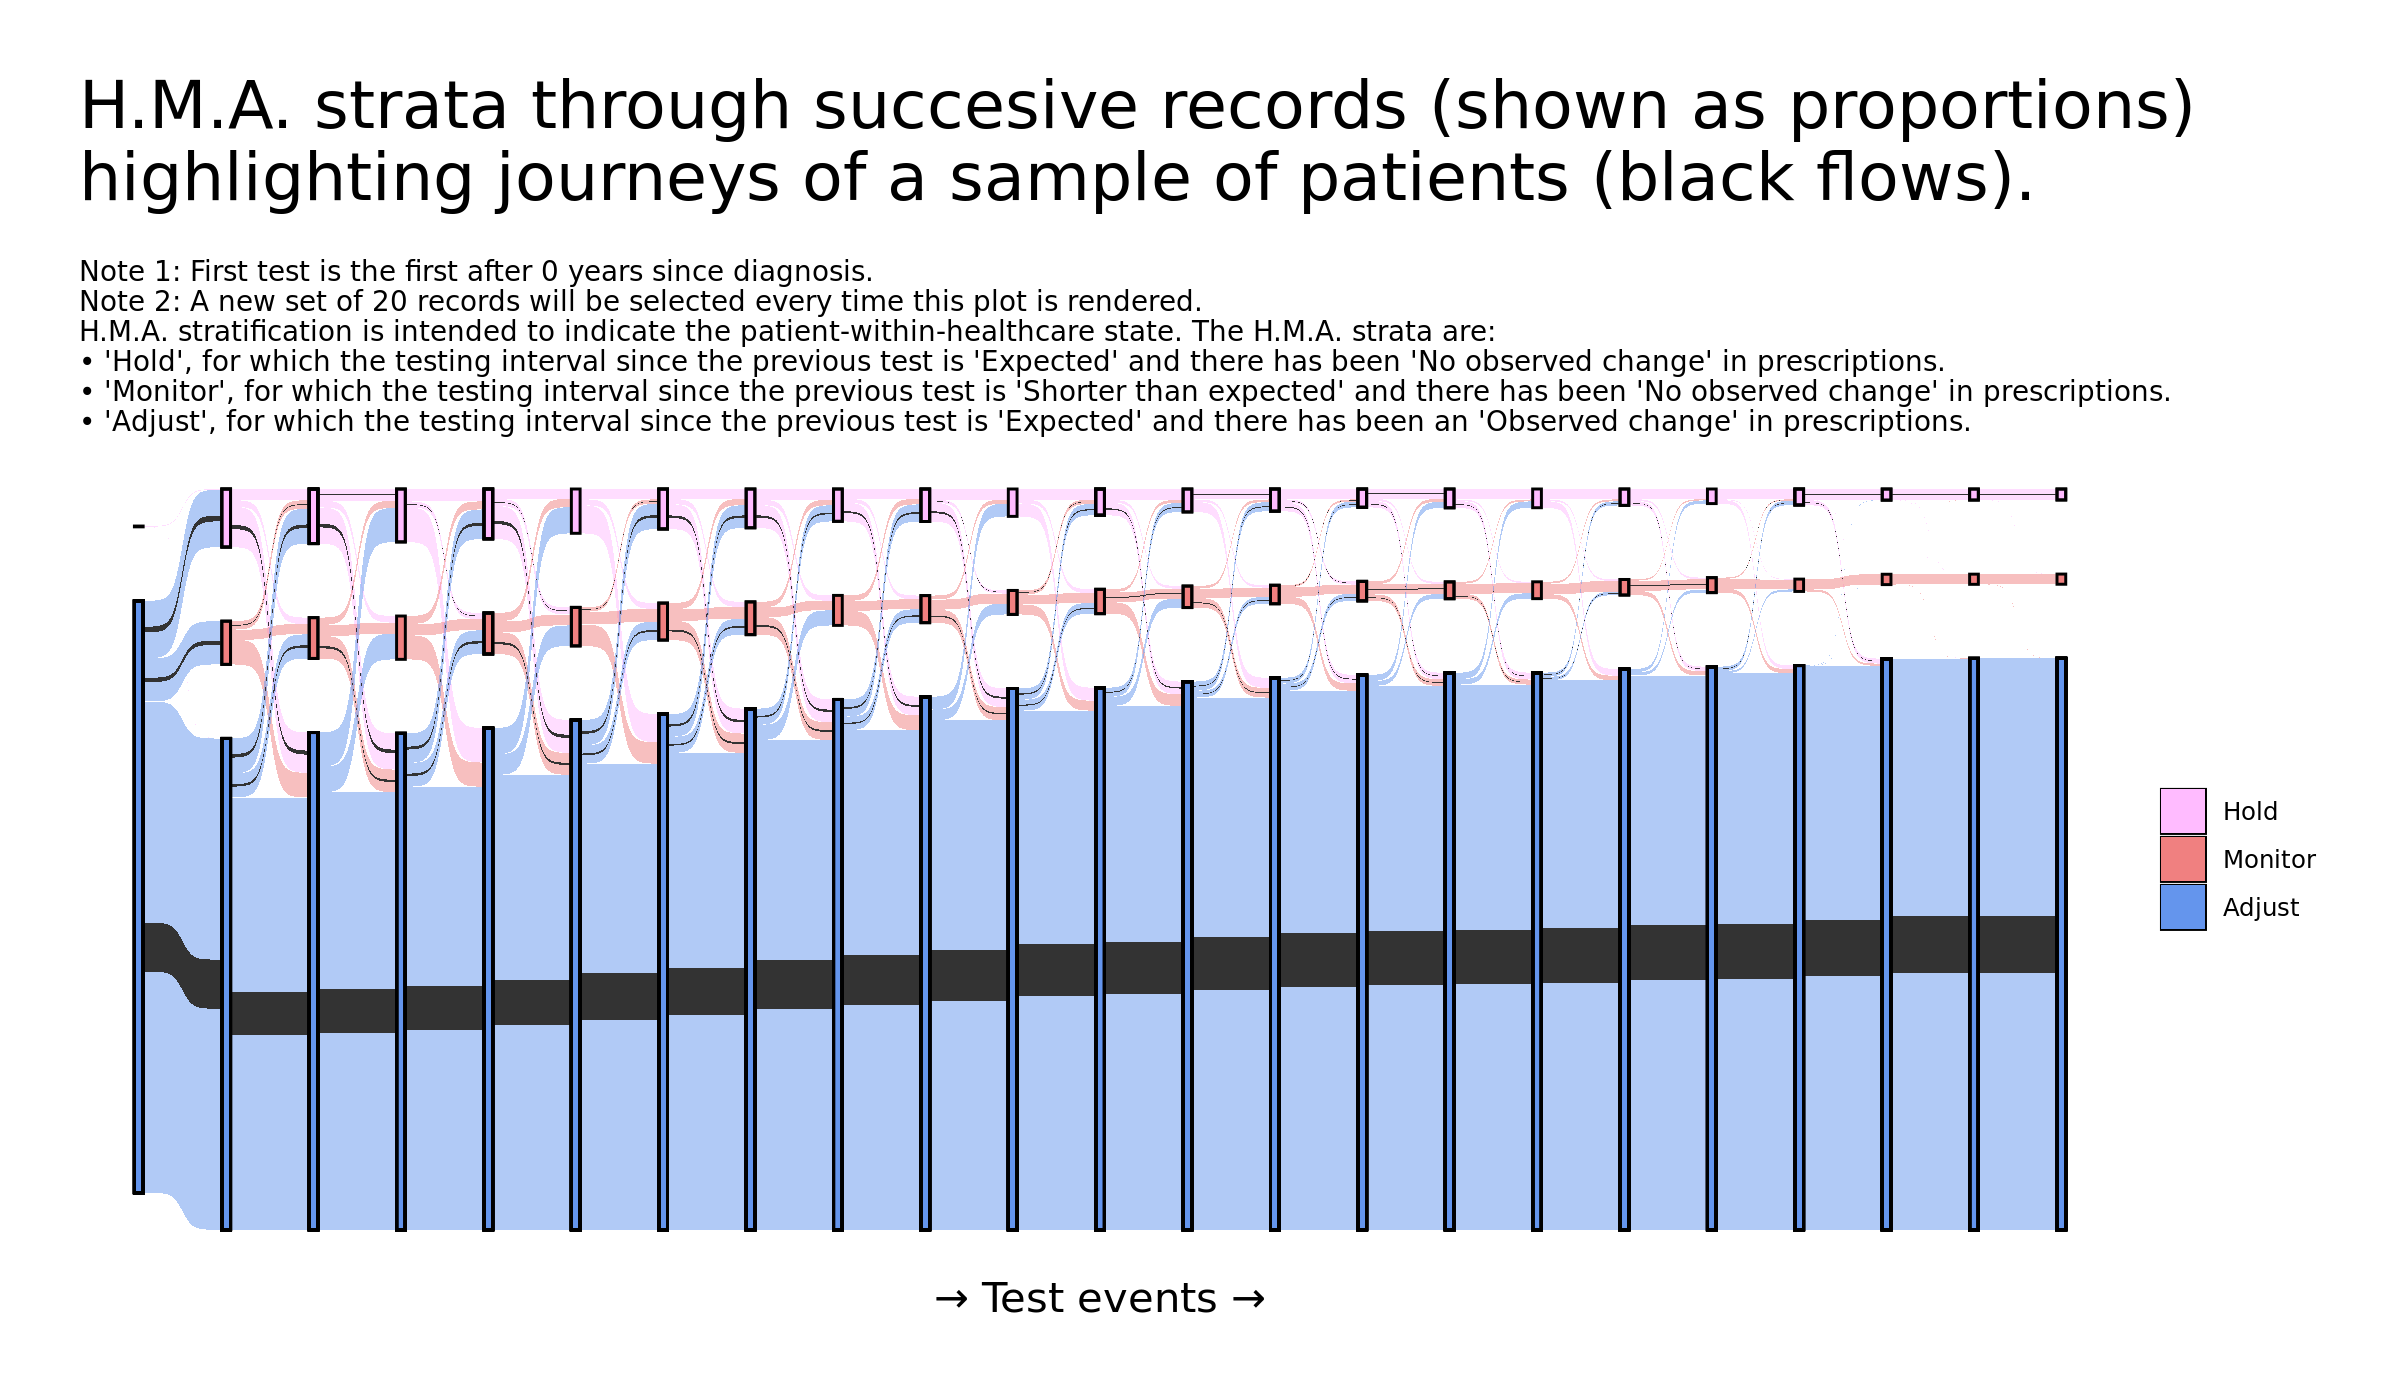

In [12]:
if ( run_Sankey_plots )
    {
        # Set plot parameters.
        n_records_to_sample <- 20
        
        # Make plot data.
        plotData <-
            sts_seqmine_HMA_excludingUnobserved %>%
            dplyr::select( - last_col() ) %>%
            ggsankey::make_long( colnames( . ), subset.logic = "random", n.random = n_records_to_sample ) %>%
            # Reorder the `node` variable values to make their colours.
            dplyr::mutate_at(
                .vars = vars( node, next_node )
                ,.funs = funs( factor( ., levels = df_HMA_factor %>% dplyr::distinct( HMA_fct_order ) %>% dplyr::pull() ) )
            ) %>%
            suppressWarnings()

        # Plot.
        options( repr.plot.width = 12, repr.plot.height = 7, repr.plot.res = 200 )

        plot_HMA_Sankey_excludingUnobserved <-
            plotData %>%
            ggplot(
                aes(
                    x = x
                    ,next_x = next_x
                    ,node = node %>% factor( ., levels = rev( levels( . ) ) )            # I reverse the order because ggsankey orders 
                    ,next_node = next_node %>% factor( ., levels = rev( levels( . ) ) )  # bottom to top while the legend is ordered
                    ,fill = node                                                         # top to bottom.
                )
            ) +
            ggsankey::geom_sankey( flow.alpha = 0.5, node.color = 1) +
            ggsankey::geom_sankey_subset( mapping = ggplot2::aes( subset.idx = subset.idx ) ) +
            # Colour the strata using a traffic-light palette.
            scale_fill_manual( values = df_HMA_factor %>% dplyr::select( HMA_colours_order ) %>% dplyr::pull() ) +
            labs(
                title = "H.M.A. strata through succesive records (shown as proportions)\nhighlighting journeys of a sample of patients (black flows)."
                ,subtitle = paste0(
                    "\nNote 1: First test is the first after ", lubridate::interval( date_diagnosis_threshold, date_followup_start ) / lubridate::years(1), " years since diagnosis.\n"
                    ,"Note 2: A new set of ", n_records_to_sample," records will be selected every time this plot is rendered.\n"
                    ,"H.M.A. stratification is intended to indicate the patient-within-healthcare state. The H.M.A. strata are:\n"
                    ,"\u2022 'Hold', for which the testing interval since the previous test is 'Expected' and there has been 'No observed change' in prescriptions.\n"
                    ,"\u2022 'Monitor', for which the testing interval since the previous test is 'Shorter than expected' and there has been 'No observed change' in prescriptions.\n"
                    ,"\u2022 'Adjust', for which the testing interval since the previous test is 'Expected' and there has been an 'Observed change' in prescriptions."
                    )
                ,x = "\u2192 Test events \u2192"
            ) +
            theme_minimal() +
            theme(
                title = element_text( size = 20 )
                ,plot.subtitle = element_text( size = 10 )
                ,axis.title = element_text( size = 15 )
                ,plot.caption = ggtext::element_markdown( size = 10, hjust = 0 )
                ,plot.caption.position = 'plot'
                ,plot.title.position = 'plot'
                ,axis.text.y = element_blank()
                ,axis.text.x = element_blank()
                ,plot.margin = unit( c(1, 1, 1, 1), "cm")
                ,axis.title.y = element_text( margin = margin( r = 20 ) )
                ,panel.grid.major = element_blank()
                ,panel.grid.minor = element_blank()
                ,legend.title = element_blank()
                )

        plot_HMA_Sankey_excludingUnobserved
    }

Some initial observations from the H.M.A. Sankey diagram:
1. __Most patient records indicate an 'Adjust' strategy throughout.__
    - Evidenced by the 'Adjust' vertical bars being the largest throughout.
2. __H.M.A. states are always in flux.__
    - Evidenced by flows to adjacent vertical bars throughout.

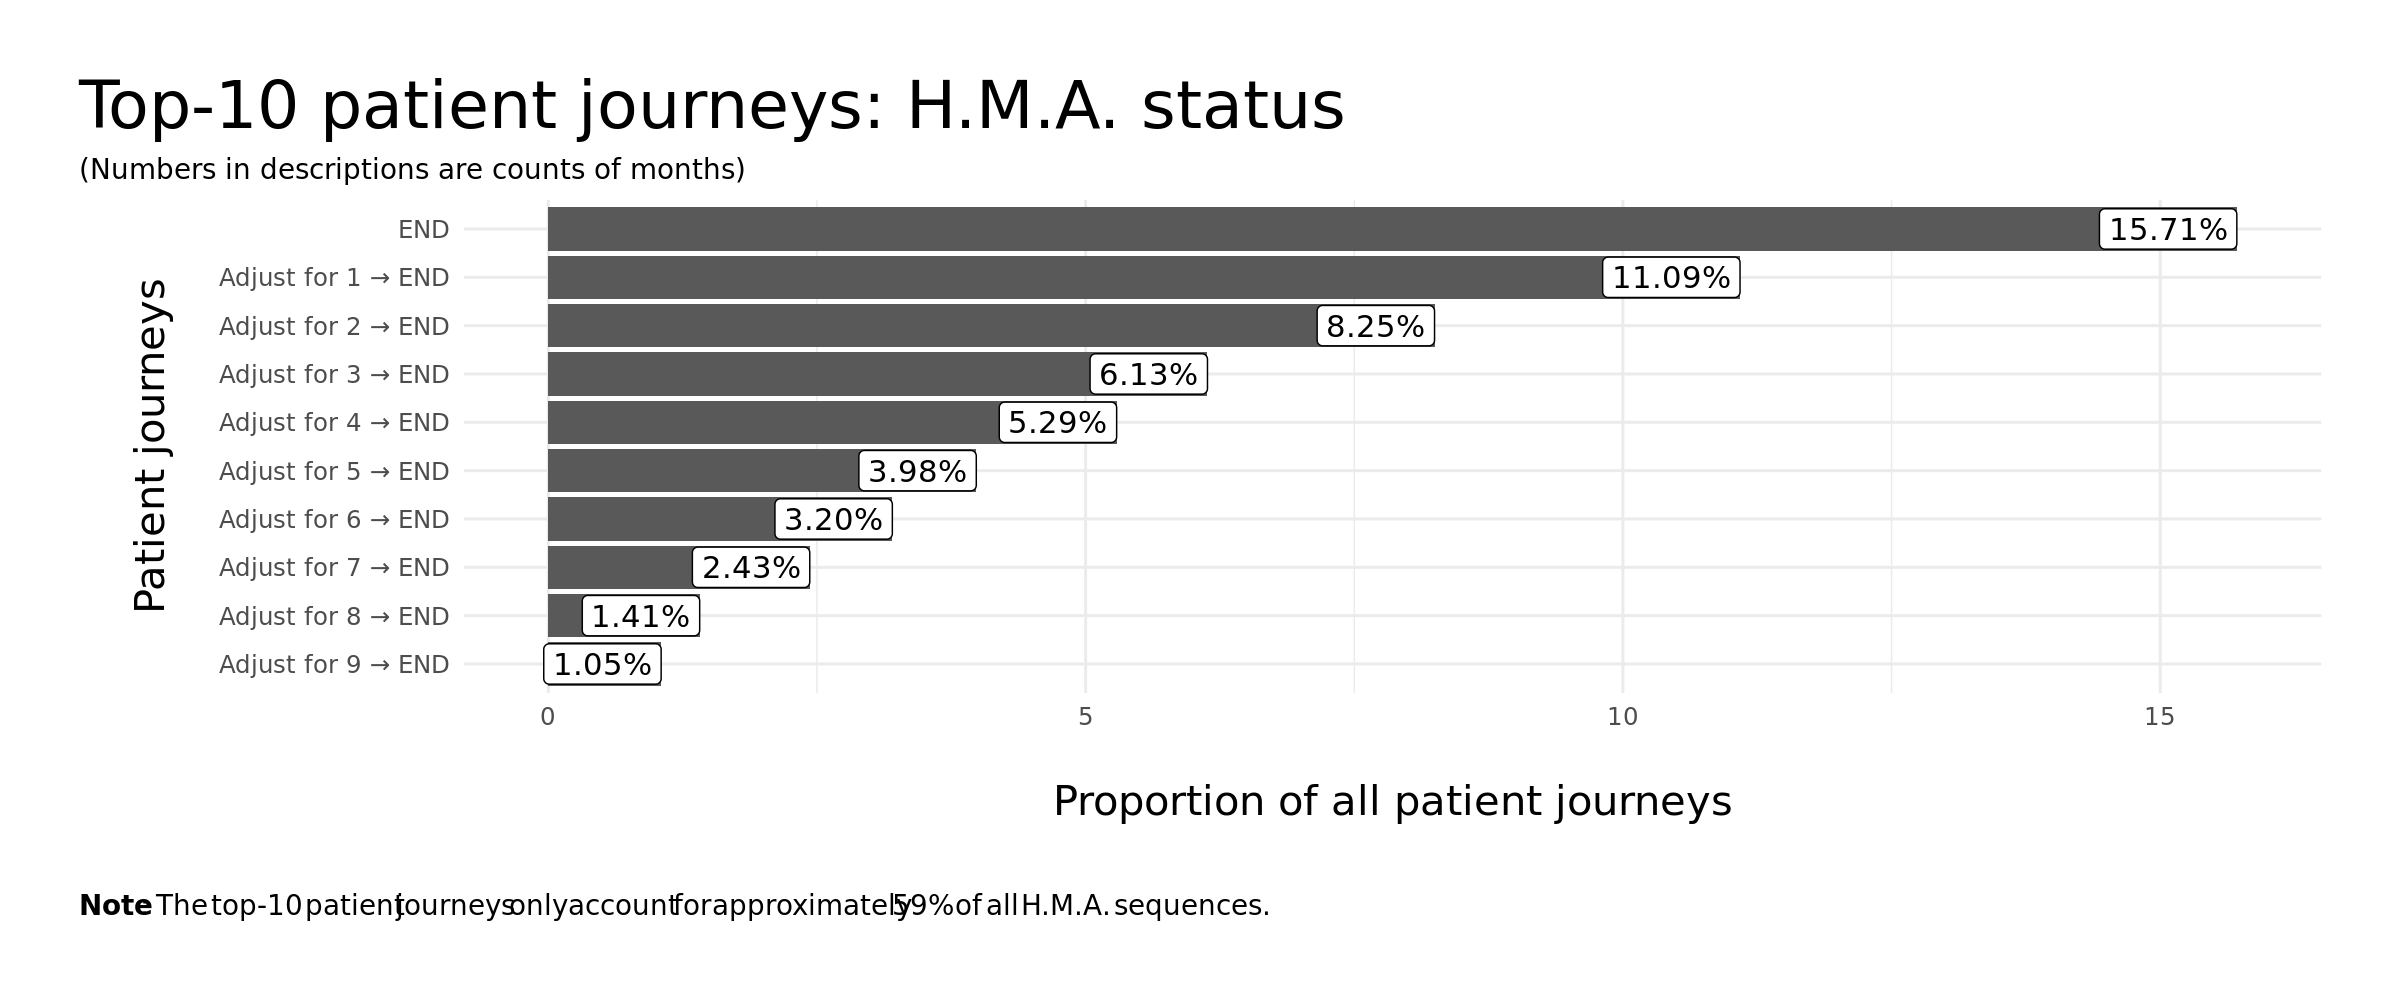

In [13]:
if ( run_process_mining_summary )
    {
        options( repr.plot.width = 12, repr.plot.height = 5, repr.plot.res = 200 )

        # Make plot data.
        plot_data <-
            TraMineR::seqtab( sts_seqmine_HMA ) %>%
            attributes() %>%
            purrr::pluck( "freq" ) %>%
            tibble::rownames_to_column( "sequence" ) %>%
            dplyr::arrange( desc( Freq ) ) %>%
            dplyr::mutate( cum_sum_percent = cumsum( Percent ) ) %>%
            # Remove the leading "None/[0-9]"
            dplyr::mutate_at(
                .vars = vars( sequence )
                ,.funs = funs( stringr::str_replace_all( ., "None/[0-9]*-", "" ) )
                ) %>%
            # Replace the "-" that joins the events with an arrow.
            dplyr::mutate_at(
                .vars = vars( sequence )
                ,.funs = funs( stringr::str_replace_all( ., "-", " \u2192 " ) )
                ) %>%
            # Use words instead of symbols for the number of timesteps.
            dplyr::mutate_at(
                .vars = vars( sequence )
                ,.funs = funs( stringr::str_replace_all( ., "/", " for " ) )
                ) %>%
            # Repalce "Unobserved for [0-9]*" with "End".
            dplyr::mutate_at(
                .vars = vars( sequence )
                ,.funs = funs( stringr::str_replace_all( ., "Unobserved for [0-9]*", "END" ) )
                ) %>%
            suppressWarnings()


        # Plot plot data.
        plot_data %>%
            ggplot(
                aes(
                    x = reorder( sequence, Freq )
                    ,y = Percent )
                , stat = "identity"
            ) +
            geom_col() +
            geom_label(
                    aes(
                        label = Percent %>% `/`(100) %>% round(4) %>% scales::percent()
                    )
                    ,hjust = 1 ) +
            coord_flip() +
            labs(
                x = "Patient journeys"
                ,y = "Proportion of all patient journeys"
                ,title = "Top-10 patient journeys: H.M.A. status"
                ,subtitle = "(Numbers in descriptions are counts of months)"
                ,caption = paste0(
                    "**Note**: The top-10 patient journeys only account for approximately "
                    ,round( max( plot_data$cum_sum_percent ))
                           ,"% of all H.M.A. sequences."
                          )
            ) +
            theme_minimal() +
            theme(
                title = element_text( size = 20 )
                ,plot.subtitle = element_text( size = 10 )
                ,axis.title = element_text( size = 15 )
                ,plot.caption = ggtext::element_markdown( size = 10, hjust = 0 )
                ,plot.caption.position = 'plot'
                ,plot.title.position = 'plot'
                ,legend.position = "none"
                ,plot.margin = unit( c(1, 1, 1, 1), "cm")
                ,axis.title.x = element_text( margin = margin( t = 20, b = 20 ) )
                ,axis.title.y = element_text( margin = margin( r = 20, l = 20, t = 20 ) )
                )
    }

#### H.M.A. and Test Status strata

In the next plot, the Sankey plot visualises the proportions of patient records moving through test statues and H.M.A. category.

The first task is to create a new state-sequence object that tracks `HMAandTestStatus` strata.

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font width unknown for character 0x09 in encoding latin1”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font width unknown for character 0x09 in encoding latin1”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font width unknown for character 0x09 in encoding latin1”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font width unknown for character 0x09 in encoding latin1”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font width unknown for character 0x09 in encoding latin1”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font width unknown for character 0x09 in encoding latin1”


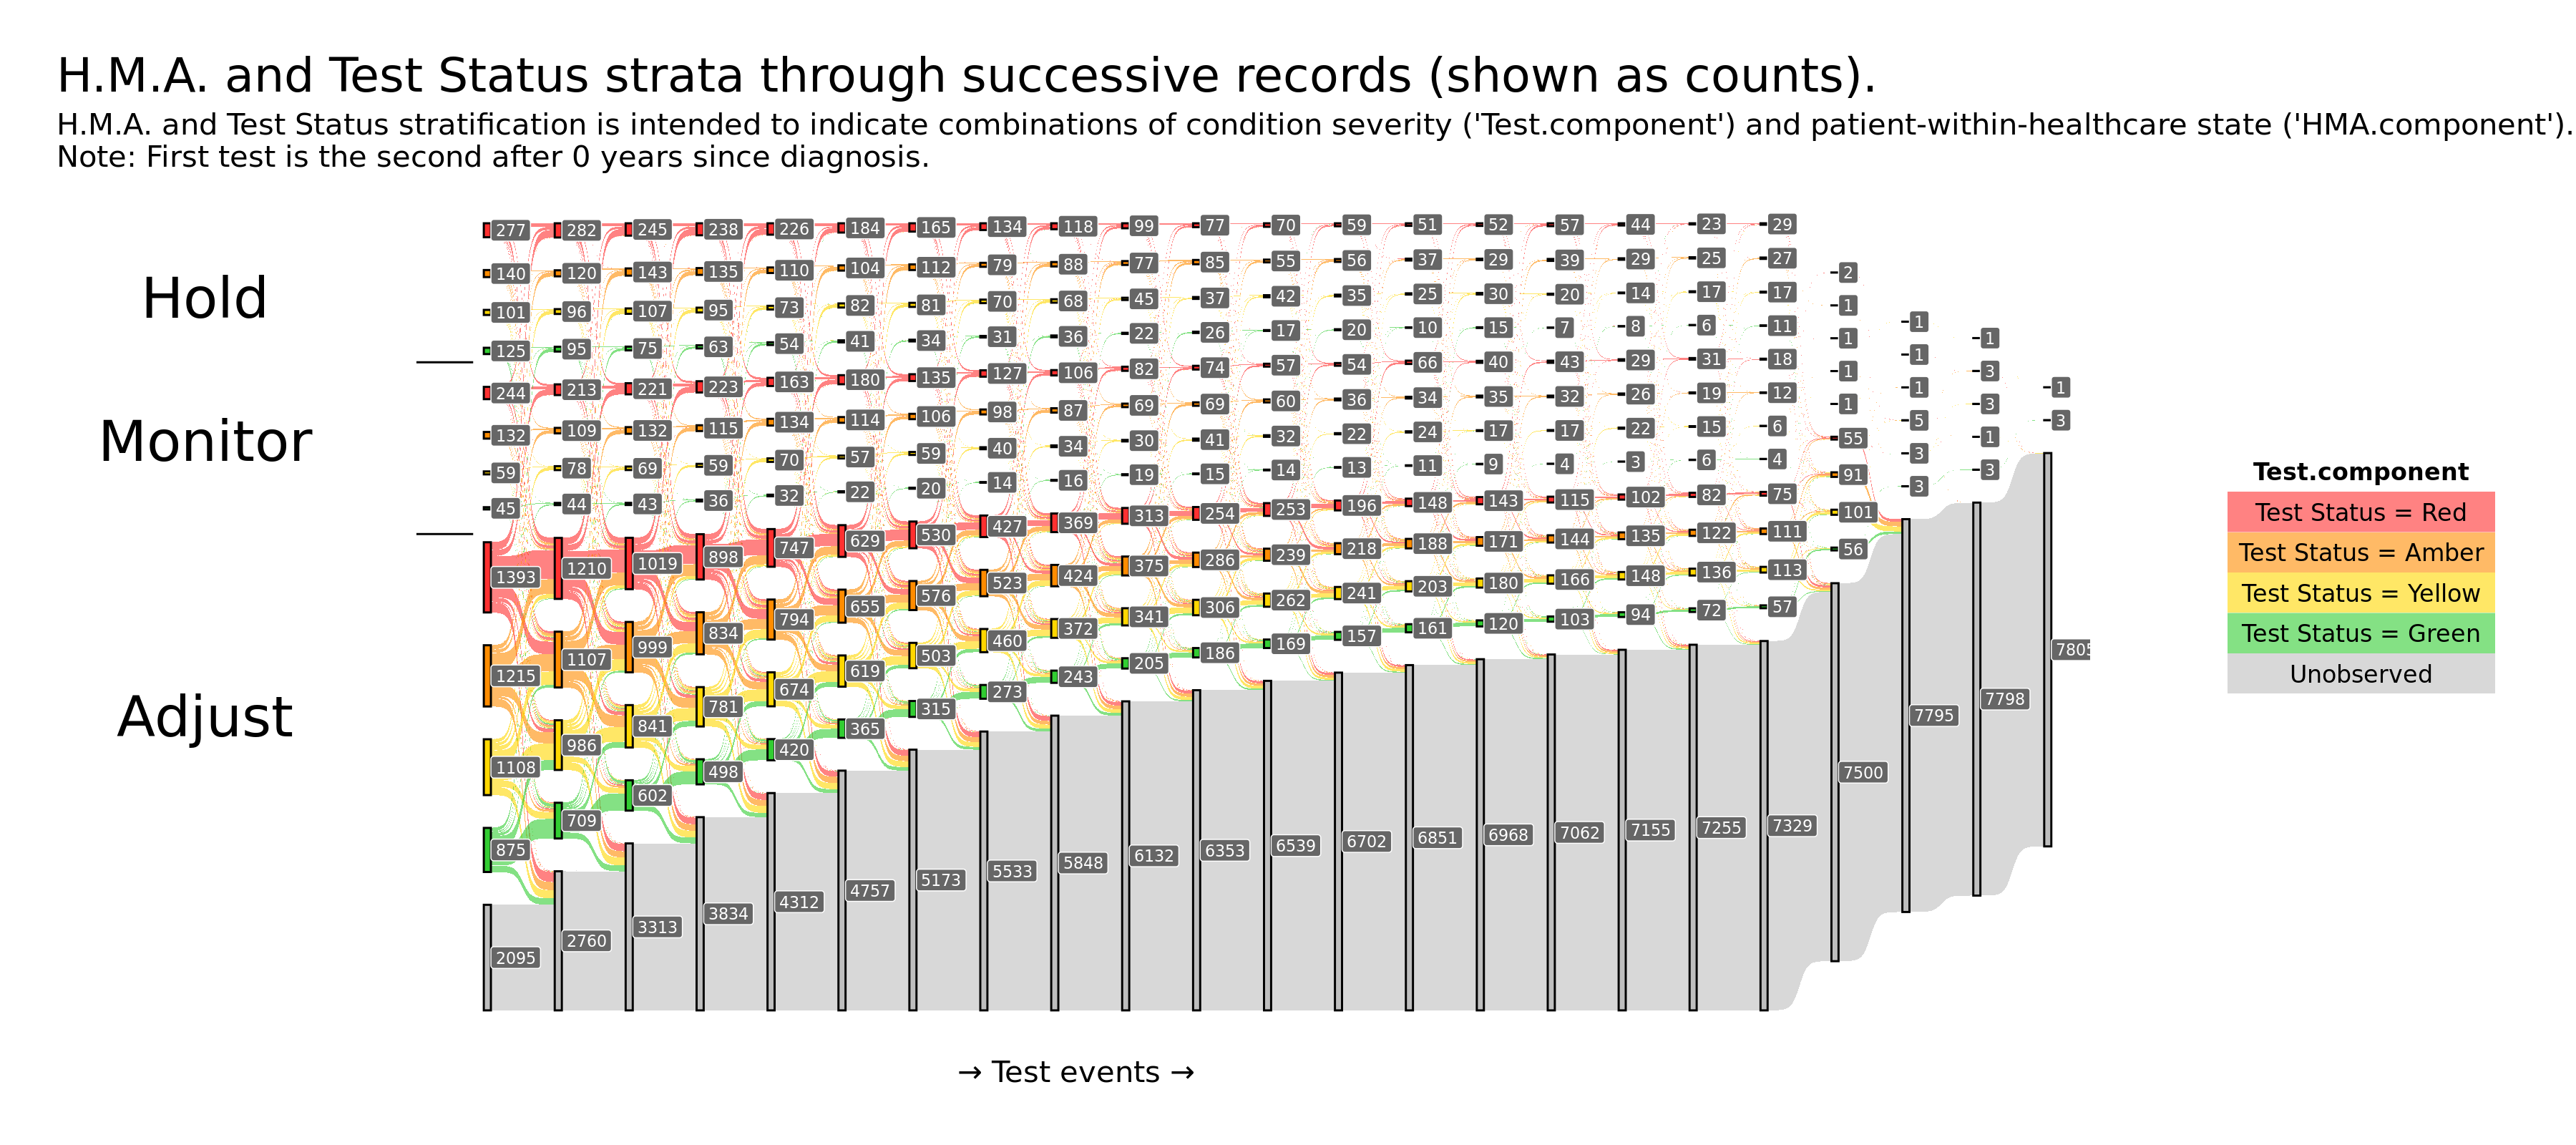

In [14]:
if ( run_Sankey_plots )
    {
        # Make plot data.
        plotData <-
            sts_seqmine_HMAandTestStatus %>%
            # Remove the default start node.
            dplyr::select( - last_col(), -a2 ) %>%
            ggsankey::make_long( colnames( . ) ) %>%
            # Reorder the `node` variable values to make their colours.
            dplyr::mutate_at(
                .vars = vars( node, next_node )
                ,.funs = funs( factor( ., levels = df_HMAandTestStatus_factor %>% dplyr::select( HMAandTestStatus_fct_order ) %>% dplyr::pull() ) )
            ) %>%
            suppressWarnings()
    
        # Calculate where to place the line segment that divides the H.M.A. categories.
        default_space <-
            plotData %>%
            dplyr::mutate( group = 1 ) %>%
            dplyr::select( - next_x, - next_node, - next_x) %>%
            dplyr::group_by_all() %>%
            dplyr::summarise(freq = dplyr::n(), .groups = "keep") %>%
            dplyr::ungroup() %>%
            # The follow is adapted from ggsankey:::find_default_space().
            dplyr::group_by(x) %>%
            dplyr::summarise(n_groups = dplyr::n_distinct(node),
                      freq = sum(freq, na.rm = TRUE)) %>%
            dplyr::mutate(v = freq / n_groups / 4) %>%
            dplyr::pull(v) %>%
            max()
        n_patients_Hold_at_start <- sts_seqmine_HMAandTestStatus %>% dplyr::filter( stringr::str_detect( a3, pattern = "Hold" ) ) %>% nrow()
        n_patients_Monitor_at_start <- sts_seqmine_HMAandTestStatus %>% dplyr::filter( stringr::str_detect( a3, pattern = "Monitor" ) ) %>% nrow()
        n_patients_Adjust_at_start <- sts_seqmine_HMAandTestStatus %>% dplyr::filter( stringr::str_detect( a3, pattern = "Adjust" ) ) %>% nrow()
        n_patients_Unobserved_at_start <- sts_seqmine_HMAandTestStatus %>% dplyr::filter( stringr::str_detect( a3, pattern = "Unobserved" ) ) %>% nrow()
        y_segment_Adjust <- n_patients_Adjust_at_start + n_patients_Unobserved_at_start + ( 4 * default_space ) 
        y_segment_Monitor <- y_segment_Adjust + n_patients_Monitor_at_start + ( 4.5 * default_space ) 
        top <- y_segment_Monitor + n_patients_Hold_at_start +  ( 3 * default_space )
        y_label_Hold <- y_segment_Monitor + ( ( ( 3 * default_space ) + n_patients_Hold_at_start ) / 2 )
        y_label_Monitor <- y_segment_Monitor - ( ( ( 4 * default_space ) + n_patients_Monitor_at_start ) / 2 )
        y_label_Adjust <- y_segment_Adjust - ( ( ( 4 * default_space ) + n_patients_Adjust_at_start ) / 2 )
        y_segment_Adjust <- y_segment_Adjust - ( top / 2 )
        y_segment_Monitor <- y_segment_Monitor - ( top / 2 )
        y_label_Hold <- y_label_Hold - ( top / 2 )
        y_label_Monitor <- y_label_Monitor - ( top / 2 )
        y_label_Adjust <- y_label_Adjust - ( top / 2 )

        # Make plot graphic.
        plot_sankey <-
            plotData %>%
            ggplot(
                aes(
                    x = x
                    ,next_x = next_x
                    ,node = node %>% factor( ., levels = rev( levels( . ) ) )            # I reverse the order because ggsankey orders 
                    ,next_node = next_node %>% factor( ., levels = rev( levels( . ) ) )  # bottom to top while the legend is ordered
                    ,fill = node                                                         # top to bottom.
                )
            ) +
            # Plot Sankey.
            ggsankey::geom_sankey(
                flow.alpha = 0.6 # flow.alpha is deciding the transparency of the ribbon colour.
                ,node.color = 1
                #,space = 33
            ) +
            # Annotate the left side of the plot with labels.
            annotate("segment", x = 0, xend = 0.8, y = y_segment_Monitor, yend = y_segment_Monitor ) +
            annotate("segment", x = 0, xend = 0.8, y = y_segment_Adjust, yend = y_segment_Adjust ) +
            annotate("text", x = -5, label = "\t\tHold", size = 10, y = y_label_Hold ) +
            annotate("text", x = -5, label = "\t\tMonitor", size = 10, y = y_label_Monitor ) +
            annotate("text", x = -5, label = "\t\tAdjust", size = 10, y = y_label_Adjust ) +
            # Overlay count labels.
            ggsankey::geom_sankey_label(
                aes(
                  x = as.numeric(x) + .05,
                  label = after_stat(paste0(freq))
                ),
                size = 8 / .pt, color = "white", fill = "gray40",
                hjust = 0
              ) +
            labs(
                title = "H.M.A. and Test Status strata through successive records (shown as counts)."
                ,subtitle =
                    paste0(
                        "H.M.A. and Test Status stratification is intended to indicate combinations of condition severity (\'Test.component"
                        ,"\') and patient-within-healthcare state (\'HMA.component\').\n"
                        ,paste0("Note: First test is the second after ", lubridate::interval( date_diagnosis_threshold, date_followup_start ) / lubridate::years(1), " years since diagnosis.")
                    )
                ,x = "\u2192 Test events \u2192"
            ) +
            # Colour the strata using a traffic-light palette.
            scale_fill_manual( values = df_HMAandTestStatus_factor %>% dplyr::select( HMAandTestStatus_colours_order ) %>% dplyr::pull() %>% scales::alpha(1) ) + # scales::alpha() is deciding the transparency of the bar colours.
            # Finish theme.
            theme_minimal() +
            theme(
                title = element_text( size = 20 )
                ,plot.subtitle = element_text( size = 15 )
                ,axis.title = element_text( size = 15 )
                ,plot.caption = ggtext::element_markdown( size = 10, hjust = 0 )
                ,plot.caption.position = 'plot'
                ,plot.title.position = 'plot'
                ,legend.position = 'none'
                ,axis.text.y = element_blank()
                ,axis.title.y = element_blank()
                ,axis.text.x = element_blank()
                ,plot.margin = unit( c(t = 1, r = 1, b = 1, l = 1), "cm")
                ,panel.grid.major = element_blank()
                ,panel.grid.minor = element_blank()
                )

        # Make table explaining the strata.
        plot_table <-
            HMAandTestStatus_display_table %>%
            dplyr::select( Test.component ) %>%
            dplyr::slice_tail( n = 5 ) %>%
            # Basic table layout.
            gridExtra::tableGrob(
                rows = NULL
                ,theme = 
                ttheme_minimal(
                    core = list(
                        bg_params = list( fill = df_HMAandTestStatus_factor %>% dplyr::select( HMAandTestStatus_colours_order ) %>% dplyr::slice_tail( n = 5 ) %>% dplyr::pull() %>% scales::alpha(0.6), col = NA ) # scales::alpha() is deciding the transparency of the table colours.
                    )
                )
            )           

        # Plot.
        options( repr.plot.width = 18, repr.plot.height = 8, repr.plot.res = 200 )

        plot_HMAandTestStatus_Sankey <-
            cowplot::plot_grid(
                plot_sankey, plot_table
                ,nrow = 1
                ,rel_widths = c( 5/6, 1/6 )
            )

        plot_HMAandTestStatus_Sankey
    }

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font width unknown for character 0x09 in encoding latin1”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font width unknown for character 0x09 in encoding latin1”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font width unknown for character 0x09 in encoding latin1”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font width unknown for character 0x09 in encoding latin1”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font width unknown for character 0x09 in encoding latin1”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font width unknown for character 0x09 in encoding latin1”


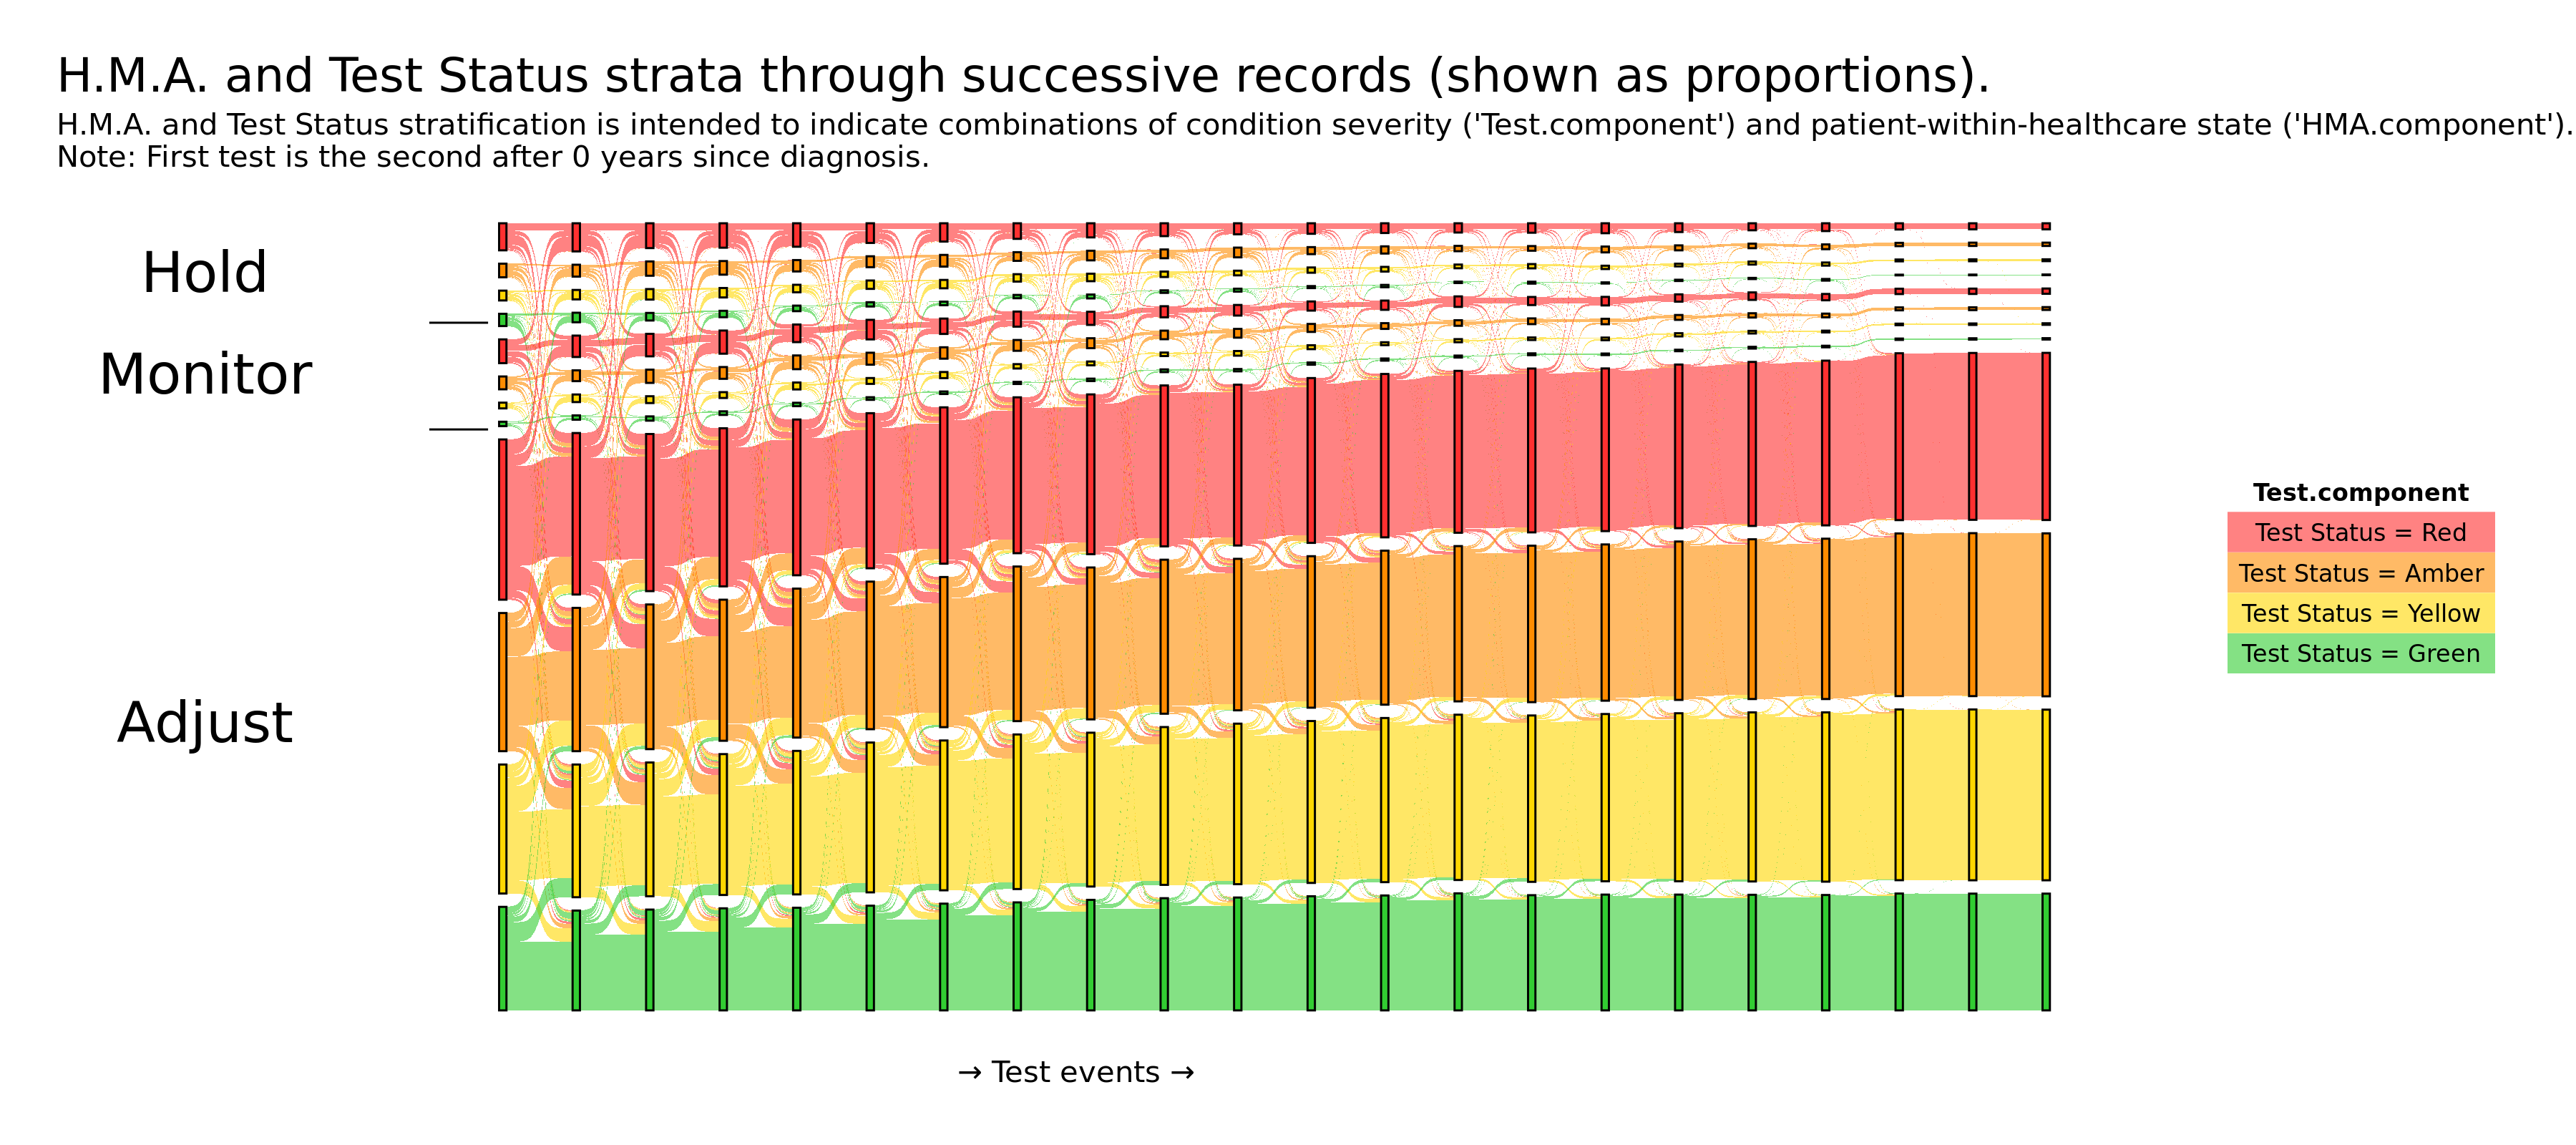

In [15]:
if ( run_Sankey_plots )
    {
        # Make plot data.
        plotData <-
            sts_seqmine_HMAandTestStatus_excludingUnobserved %>%
            # Remove the default start node.
            dplyr::select( - last_col(), -a2 ) %>%
            ggsankey::make_long( colnames( . ) ) %>%
            # Reorder the `node` variable values to make their colours.
            dplyr::mutate_at(
                .vars = vars( node, next_node )
                ,.funs = funs( factor( ., levels = df_HMAandTestStatus_factor %>% dplyr::select( HMAandTestStatus_fct_order ) %>% dplyr::pull() ) )
            ) %>%
            suppressWarnings()
    
        # Calculate where to place the line segment that divides the H.M.A. categories.
        default_space <-
            plotData %>%
            dplyr::mutate(group = 1) %>%
            dplyr::select(-next_x, -next_node, -next_x) %>%
            dplyr::group_by_all() %>%
            dplyr::summarise(freq = dplyr::n(), .groups = "keep") %>%
            dplyr::ungroup() %>%
            # The follow is adapted from ggsankey:::find_default_space().
            dplyr::group_by(x) %>%
            dplyr::summarise(n_groups = dplyr::n_distinct(node),
                      freq = sum(freq, na.rm = TRUE)) %>%
            dplyr::mutate(v = freq / n_groups / 4) %>%
            dplyr::pull(v) %>%
            max()
        n_patients_Hold_at_start <- sts_seqmine_HMAandTestStatus_excludingUnobserved %>% dplyr::filter( stringr::str_detect( a3, pattern = "Hold" ) ) %>% nrow()
        n_patients_Monitor_at_start <- sts_seqmine_HMAandTestStatus_excludingUnobserved %>% dplyr::filter( stringr::str_detect( a3, pattern = "Monitor" ) ) %>% nrow()
        n_patients_Adjust_at_start <- sts_seqmine_HMAandTestStatus_excludingUnobserved %>% dplyr::filter( stringr::str_detect( a3, pattern = "Adjust" ) ) %>% nrow()
        n_patients_half <- sum( n_patients_Hold_at_start, n_patients_Monitor_at_start, n_patients_Adjust_at_start ) / 2
        y_segment_Adjust <- n_patients_Adjust_at_start + ( 4 * default_space ) 
        y_segment_Monitor <- y_segment_Adjust + n_patients_Monitor_at_start + ( 4.5 * default_space ) 
        top <- y_segment_Monitor + n_patients_Hold_at_start +  ( 3 * default_space )
        y_label_Hold <- y_segment_Monitor + ( ( ( 3 * default_space ) + n_patients_Hold_at_start ) / 2 )
        y_label_Monitor <- y_segment_Monitor - ( ( ( 4 * default_space ) + n_patients_Monitor_at_start ) / 2 )
        y_label_Adjust <- y_segment_Adjust - ( ( ( 4 * default_space ) + n_patients_Adjust_at_start ) / 2 )
        y_segment_Adjust <- y_segment_Adjust - ( top / 2 )
        y_segment_Monitor <- y_segment_Monitor - ( top / 2 )
        y_label_Hold <- y_label_Hold - ( top / 2 )
        y_label_Monitor <- y_label_Monitor - ( top / 2 )
        y_label_Adjust <- y_label_Adjust - ( top / 2 )

        # Make plot graphic.
        plot_sankey <-
            plotData %>%
            ggplot(
                aes(
                    x = x
                    ,next_x = next_x
                    ,node = node %>% factor( ., levels = rev( levels( . ) ) )            # I reverse the order because ggsankey orders 
                    ,next_node = next_node %>% factor( ., levels = rev( levels( . ) ) )  # bottom to top while the legend is ordered
                    ,fill = node                                                         # top to bottom.
                )
            ) +
            # Plot Sankey.
            ggsankey::geom_sankey(
                flow.alpha = 0.6 # flow.alpha is deciding the transparency of the ribbon colour.
                ,node.color = 1
                #,space = 33
            ) +
            # Annotate the left side of the plot with labels.
            annotate("segment", x = 0, xend = 0.8, y = y_segment_Monitor, yend = y_segment_Monitor ) +
            annotate("segment", x = 0, xend = 0.8, y = y_segment_Adjust, yend = y_segment_Adjust ) +
            annotate("text", x = -5, label = "\t\tHold", size = 10, y = y_label_Hold ) +
            annotate("text", x = -5, label = "\t\tMonitor", size = 10, y = y_label_Monitor ) +
            annotate("text", x = -5, label = "\t\tAdjust", size = 10, y = y_label_Adjust ) +
            labs(
                title = "H.M.A. and Test Status strata through successive records (shown as proportions)."
                ,subtitle =
                    paste0(
                        "H.M.A. and Test Status stratification is intended to indicate combinations of condition severity (\'Test.component"
                        ,"\') and patient-within-healthcare state (\'HMA.component\').\n"
                       ,paste0("Note: First test is the second after ", lubridate::interval( date_diagnosis_threshold, date_followup_start ) / lubridate::years(1), " years since diagnosis.")
                    )
                ,x = "\u2192 Test events \u2192"
            ) +
            # Colour the strata using a traffic-light palette.
            scale_fill_manual( values = df_HMAandTestStatus_factor %>% dplyr::select( HMAandTestStatus_colours_order ) %>% dplyr::pull() %>% scales::alpha(1) ) + # scales::alpha() is deciding the transparency of the bar colours.
            scale_y_continuous( breaks = seq(-5000,5000,500) ) +
            # Finish theme.
            theme_minimal() +
            theme(
                title = element_text( size = 20 )
                ,plot.subtitle = element_text( size = 15 )
                ,axis.title = element_text( size = 15 )
                ,plot.caption = ggtext::element_markdown( size = 10, hjust = 0 )
                ,plot.caption.position = 'plot'
                ,plot.title.position = 'plot'
                ,legend.position = 'none'
                ,axis.text.y = element_blank()
                ,axis.title.y = element_blank()
                ,axis.text.x = element_blank()
                ,plot.margin = unit( c(t = 1, r = 1, b = 1, l = 1), "cm")
                ,panel.grid.major = element_blank()
                ,panel.grid.minor = element_blank()
                )

        # Make table explaining the strata.
        plot_table_excludingUnobserved <-
            HMAandTestStatus_display_table %>%
            dplyr::filter( Test.component != "Unobserved" ) %>%
            dplyr::select( Test.component ) %>%
            dplyr::slice_head( n = 4 ) %>%
            # Basic table layout.
            gridExtra::tableGrob(
                rows = NULL
                ,theme = 
                ttheme_minimal(
                    core = list(
                        bg_params = list( fill = df_HMAandTestStatus_factor %>% dplyr::select( HMAandTestStatus_colours_order ) %>% dplyr::slice_head( n = 4 ) %>% dplyr::pull() %>% scales::alpha(0.6), col = NA ) # scales::alpha() is deciding the transparency of the table colours.
                    )
                )
            )           

        # Plot.
        options( repr.plot.width = 18, repr.plot.height = 8, repr.plot.res = 200 )

        plot_HMAandTestStatus_Sankey_excludingUnobserved <-
            cowplot::plot_grid(
                plot_sankey, plot_table_excludingUnobserved
                ,nrow = 1
                ,rel_widths = c( 5/6, 1/6 )
            )

        plot_HMAandTestStatus_Sankey_excludingUnobserved
    }

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font width unknown for character 0x09 in encoding latin1”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font width unknown for character 0x09 in encoding latin1”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font width unknown for character 0x09 in encoding latin1”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font width unknown for character 0x09 in encoding latin1”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font width unknown for character 0x09 in encoding latin1”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font width unknown for character 0x09 in encoding latin1”


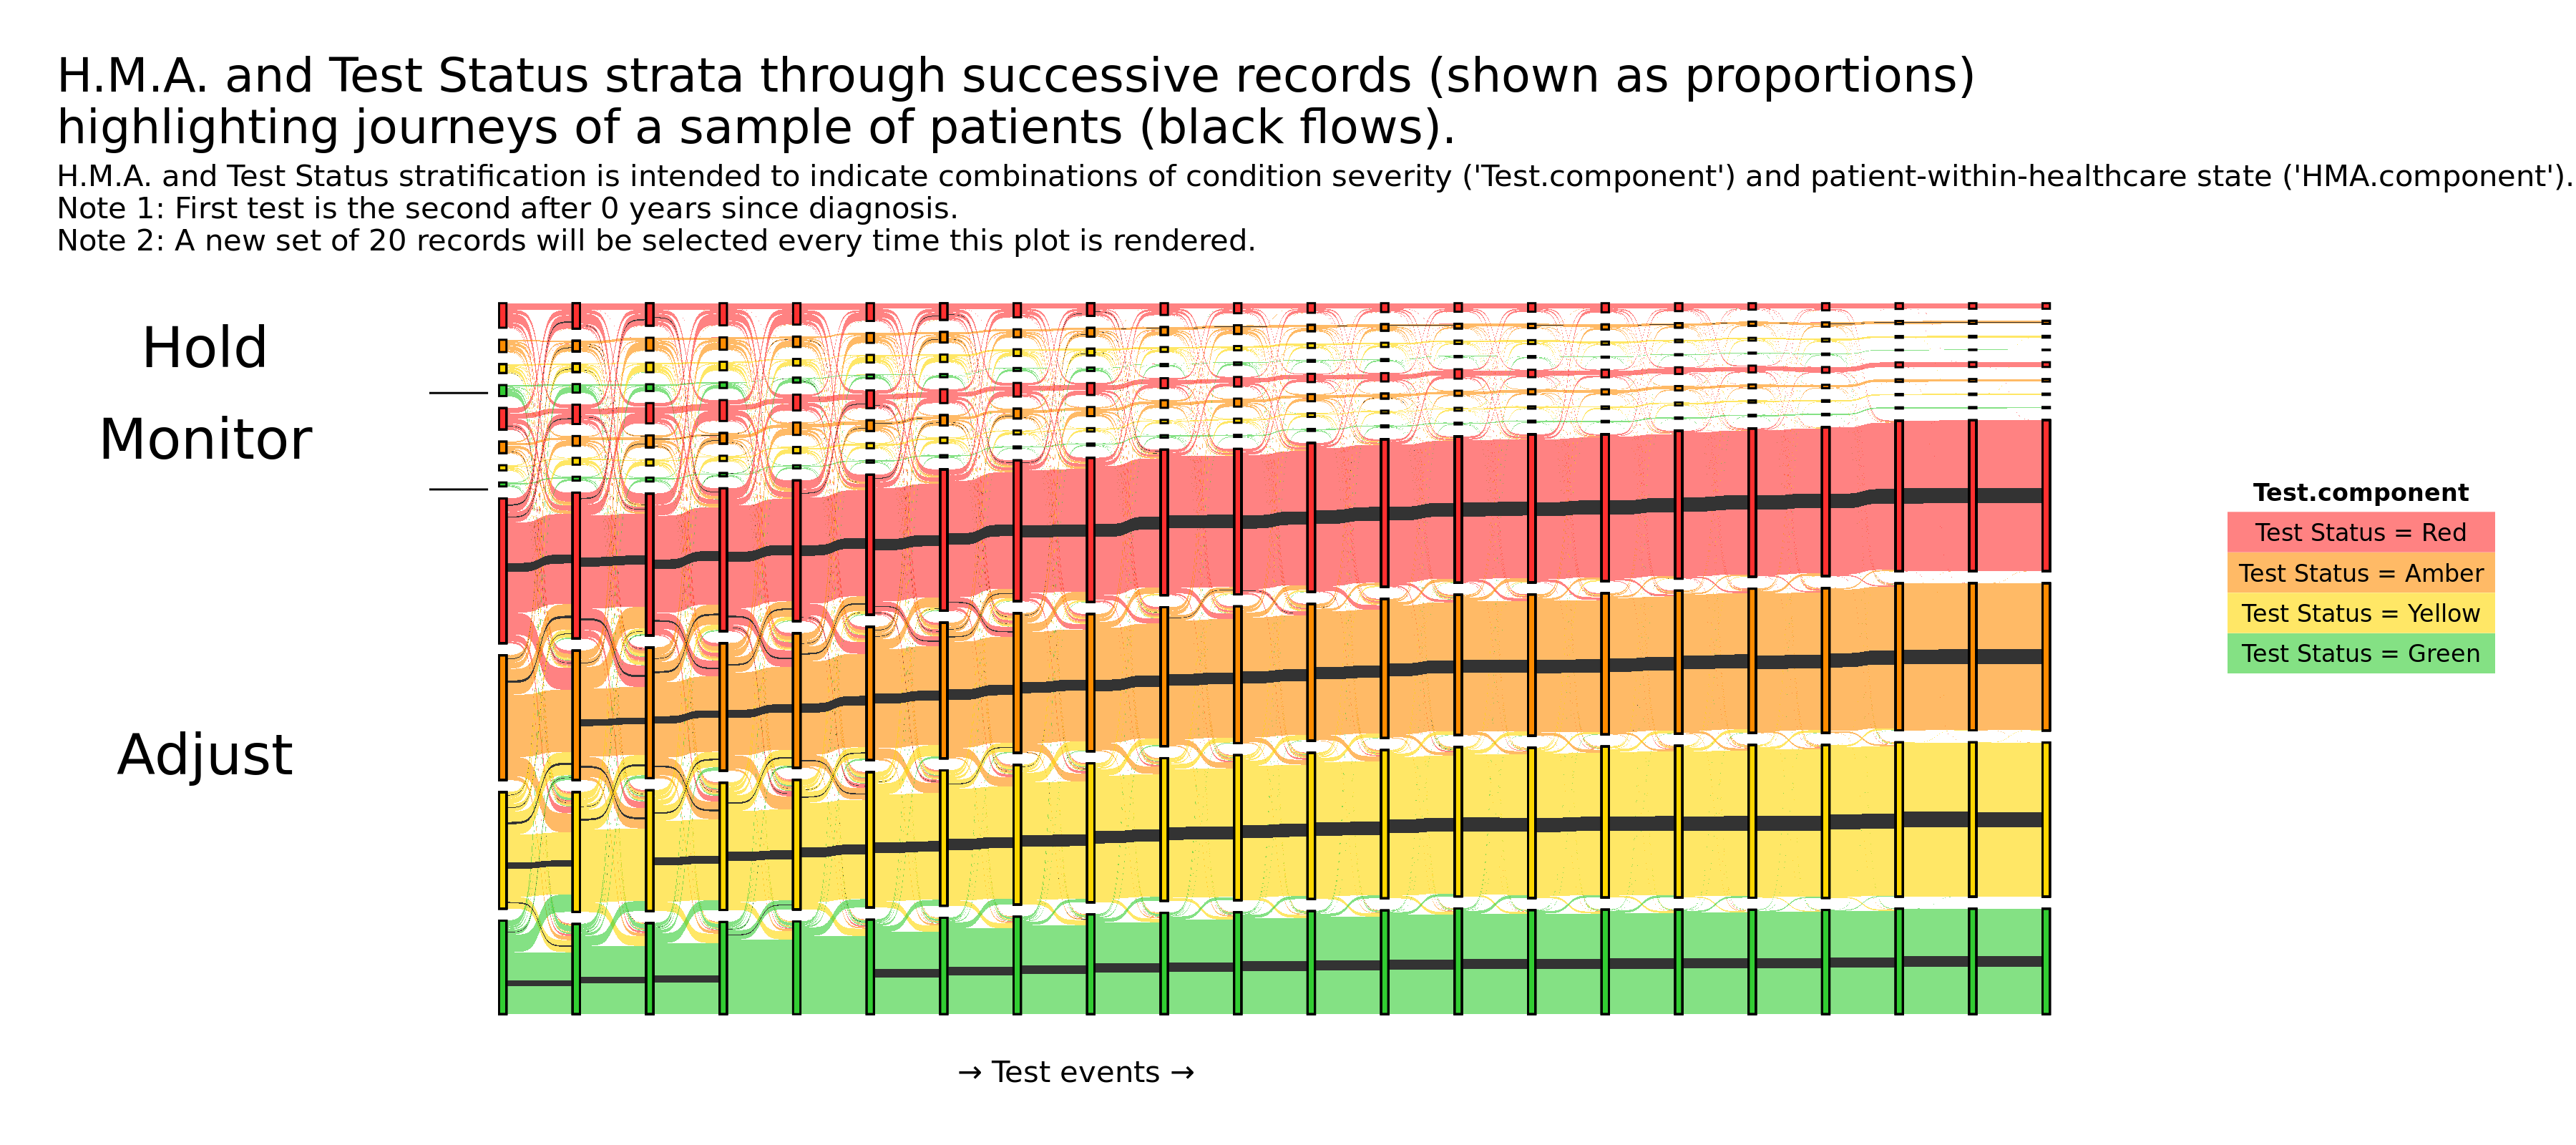

In [144]:
if ( run_Sankey_plots )
    {
        # Set plot parameters.
        n_records_to_sample <- 20
    
        # Make plot data.
        plotData <-
            sts_seqmine_HMAandTestStatus_excludingUnobserved %>%
            # Remove the default start node.
            dplyr::select( - last_col(), -a2 ) %>%
            ggsankey::make_long( colnames( . ), subset.logic = "random", n.random = n_records_to_sample ) %>%
            # Reorder the `node` variable values to make their colours.
            dplyr::mutate_at(
                .vars = vars( node, next_node )
                ,.funs = funs( factor( ., levels = df_HMAandTestStatus_factor %>% dplyr::select( HMAandTestStatus_fct_order ) %>% dplyr::pull() ) )
            ) %>%
            suppressWarnings()
    
        # Calculate where to place the line segment that divides the H.M.A. categories.
        default_space <-
            plotData %>%
            dplyr::mutate(group = 1) %>%
            dplyr::select(-next_x, -next_node, -next_x) %>%
            dplyr::group_by_all() %>%
            dplyr::summarise(freq = dplyr::n(), .groups = "keep") %>%
            dplyr::ungroup() %>%
            # The follow is adapted from ggsankey:::find_default_space().
            dplyr::group_by(x) %>%
            dplyr::summarise(n_groups = dplyr::n_distinct(node),
                      freq = sum(freq, na.rm = TRUE)) %>%
            dplyr::mutate(v = freq / n_groups / 4) %>%
            dplyr::pull(v) %>%
            max()
        n_patients_Hold_at_start <- sts_seqmine_HMAandTestStatus_excludingUnobserved %>% dplyr::filter( stringr::str_detect( a3, pattern = "Hold" ) ) %>% nrow()
        n_patients_Monitor_at_start <- sts_seqmine_HMAandTestStatus_excludingUnobserved %>% dplyr::filter( stringr::str_detect( a3, pattern = "Monitor" ) ) %>% nrow()
        n_patients_Adjust_at_start <- sts_seqmine_HMAandTestStatus_excludingUnobserved %>% dplyr::filter( stringr::str_detect( a3, pattern = "Adjust" ) ) %>% nrow()
        n_patients_half <- sum( n_patients_Hold_at_start, n_patients_Monitor_at_start, n_patients_Adjust_at_start ) / 2
        y_segment_Adjust <- n_patients_Adjust_at_start + ( 4 * default_space ) 
        y_segment_Monitor <- y_segment_Adjust + n_patients_Monitor_at_start + ( 4.5 * default_space ) 
        top <- y_segment_Monitor + n_patients_Hold_at_start +  ( 3 * default_space )
        y_label_Hold <- y_segment_Monitor + ( ( ( 3 * default_space ) + n_patients_Hold_at_start ) / 2 )
        y_label_Monitor <- y_segment_Monitor - ( ( ( 4 * default_space ) + n_patients_Monitor_at_start ) / 2 )
        y_label_Adjust <- y_segment_Adjust - ( ( ( 4 * default_space ) + n_patients_Adjust_at_start ) / 2 )
        y_segment_Adjust <- y_segment_Adjust - ( top / 2 )
        y_segment_Monitor <- y_segment_Monitor - ( top / 2 )
        y_label_Hold <- y_label_Hold - ( top / 2 )
        y_label_Monitor <- y_label_Monitor - ( top / 2 )
        y_label_Adjust <- y_label_Adjust - ( top / 2 )

        # Make plot graphic.
        plot_sankey <-
            plotData %>%
            ggplot(
                aes(
                    x = x
                    ,next_x = next_x
                    ,node = node %>% factor( ., levels = rev( levels( . ) ) )            # I reverse the order because ggsankey orders 
                    ,next_node = next_node %>% factor( ., levels = rev( levels( . ) ) )  # bottom to top while the legend is ordered
                    ,fill = node                                                         # top to bottom.
                )
            ) +
            # Plot Sankey.
            ggsankey::geom_sankey(
                flow.alpha = 0.6 # flow.alpha is deciding the transparency of the ribbon colour.
                ,node.color = 1
                #,space = 33
            ) +
            ggsankey::geom_sankey_subset( mapping = ggplot2::aes( subset.idx = subset.idx ) ) +
            # Annotate the left side of the plot with labels.
            annotate("segment", x = 0, xend = 0.8, y = y_segment_Monitor, yend = y_segment_Monitor ) +
            annotate("segment", x = 0, xend = 0.8, y = y_segment_Adjust, yend = y_segment_Adjust ) +
            annotate("text", x = -5, label = "\t\tHold", size = 10, y = y_label_Hold ) +
            annotate("text", x = -5, label = "\t\tMonitor", size = 10, y = y_label_Monitor ) +
            annotate("text", x = -5, label = "\t\tAdjust", size = 10, y = y_label_Adjust ) +
            labs(
                title = "H.M.A. and Test Status strata through successive records (shown as proportions)\nhighlighting journeys of a sample of patients (black flows)."
                ,subtitle =
                    paste0(
                        "H.M.A. and Test Status stratification is intended to indicate combinations of condition severity (\'Test.component"
                        ,"\') and patient-within-healthcare state (\'HMA.component\').\n"
                        ,"Note 1: First test is the second after ", lubridate::interval( date_diagnosis_threshold, date_followup_start ) / lubridate::years(1), " years since diagnosis.\n"
                        ,"Note 2: A new set of ", n_records_to_sample," records will be selected every time this plot is rendered."
                    )
                ,x = "\u2192 Test events \u2192"
            ) +
            # Colour the strata using a traffic-light palette.
            scale_fill_manual( values = df_HMAandTestStatus_factor %>% dplyr::select( HMAandTestStatus_colours_order ) %>% dplyr::pull() %>% scales::alpha(1) ) + # scales::alpha() is deciding the transparency of the bar colours.
            scale_y_continuous( breaks = seq(-5000,5000,500) ) +
            # Finish theme.
            theme_minimal() +
            theme(
                title = element_text( size = 20 )
                ,plot.subtitle = element_text( size = 15 )
                ,axis.title = element_text( size = 15 )
                ,plot.caption = ggtext::element_markdown( size = 10, hjust = 0 )
                ,plot.caption.position = 'plot'
                ,plot.title.position = 'plot'
                ,legend.position = 'none'
                ,axis.text.y = element_blank()
                ,axis.title.y = element_blank()
                ,axis.text.x = element_blank()
                ,plot.margin = unit( c(t = 1, r = 1, b = 1, l = 1), "cm")
                ,panel.grid.major = element_blank()
                ,panel.grid.minor = element_blank()
                )

        # Make table explaining the strata.
        plot_table_excludingUnobserved <-
            HMAandTestStatus_display_table %>%
            dplyr::filter( Test.component != "Unobserved" ) %>%
            dplyr::select( Test.component ) %>%
            dplyr::slice_head( n = 4 ) %>%
            # Basic table layout.
            gridExtra::tableGrob(
                rows = NULL
                ,theme = 
                ttheme_minimal(
                    core = list(
                        bg_params = list( fill = df_HMAandTestStatus_factor %>% dplyr::select( HMAandTestStatus_colours_order ) %>% dplyr::slice_head( n = 4 ) %>% dplyr::pull() %>% scales::alpha(0.6), col = NA ) # scales::alpha() is deciding the transparency of the table colours.
                    )
                )
            )           

        # Plot.
        options( repr.plot.width = 18, repr.plot.height = 8, repr.plot.res = 200 )

        plot_HMAandTestStatus_Sankey_excludingUnobserved <-
            cowplot::plot_grid(
                plot_sankey, plot_table_excludingUnobserved
                ,nrow = 1
                ,rel_widths = c( 5/6, 1/6 )
            )

        plot_HMAandTestStatus_Sankey_excludingUnobserved
    }

Some initial observations from the H.M.A. and Test Status Sankey diagram:
1. __Most patient records indicating 'Hold' or 'Monitor' have a Red test status.__
    - Evidenced by the largest bars in the 'Hold' and 'Monitor' states being Red, throughout.
2. __Unlike the previous iteration where we looked at sequences from diagosis, these sequences from 10 years after diagnosis show an unchanging probability of changing test-status values between tests.__
    - Evidenced by a consistent size of ribbons joining different colours, as we move from left to right in the graphic.

#### T-and-I strata

In the next plot, the Sankey plot visualises the proportions of patient records moving between strata of the T-and-I stratification.

The T-and-I stratification is something CB proposed. It has 17 strata derived from combining the test status, T, {Test status = Red, Test status = Amber, Test status = Yellow, Test status = Green} with a variable indicating the count of unique medications prescribed in previous inter-test intervals, P, {0, 1, 2, 3}, i.e. poly-pharmacy. One additional strata is designated for where errors arise in the data.

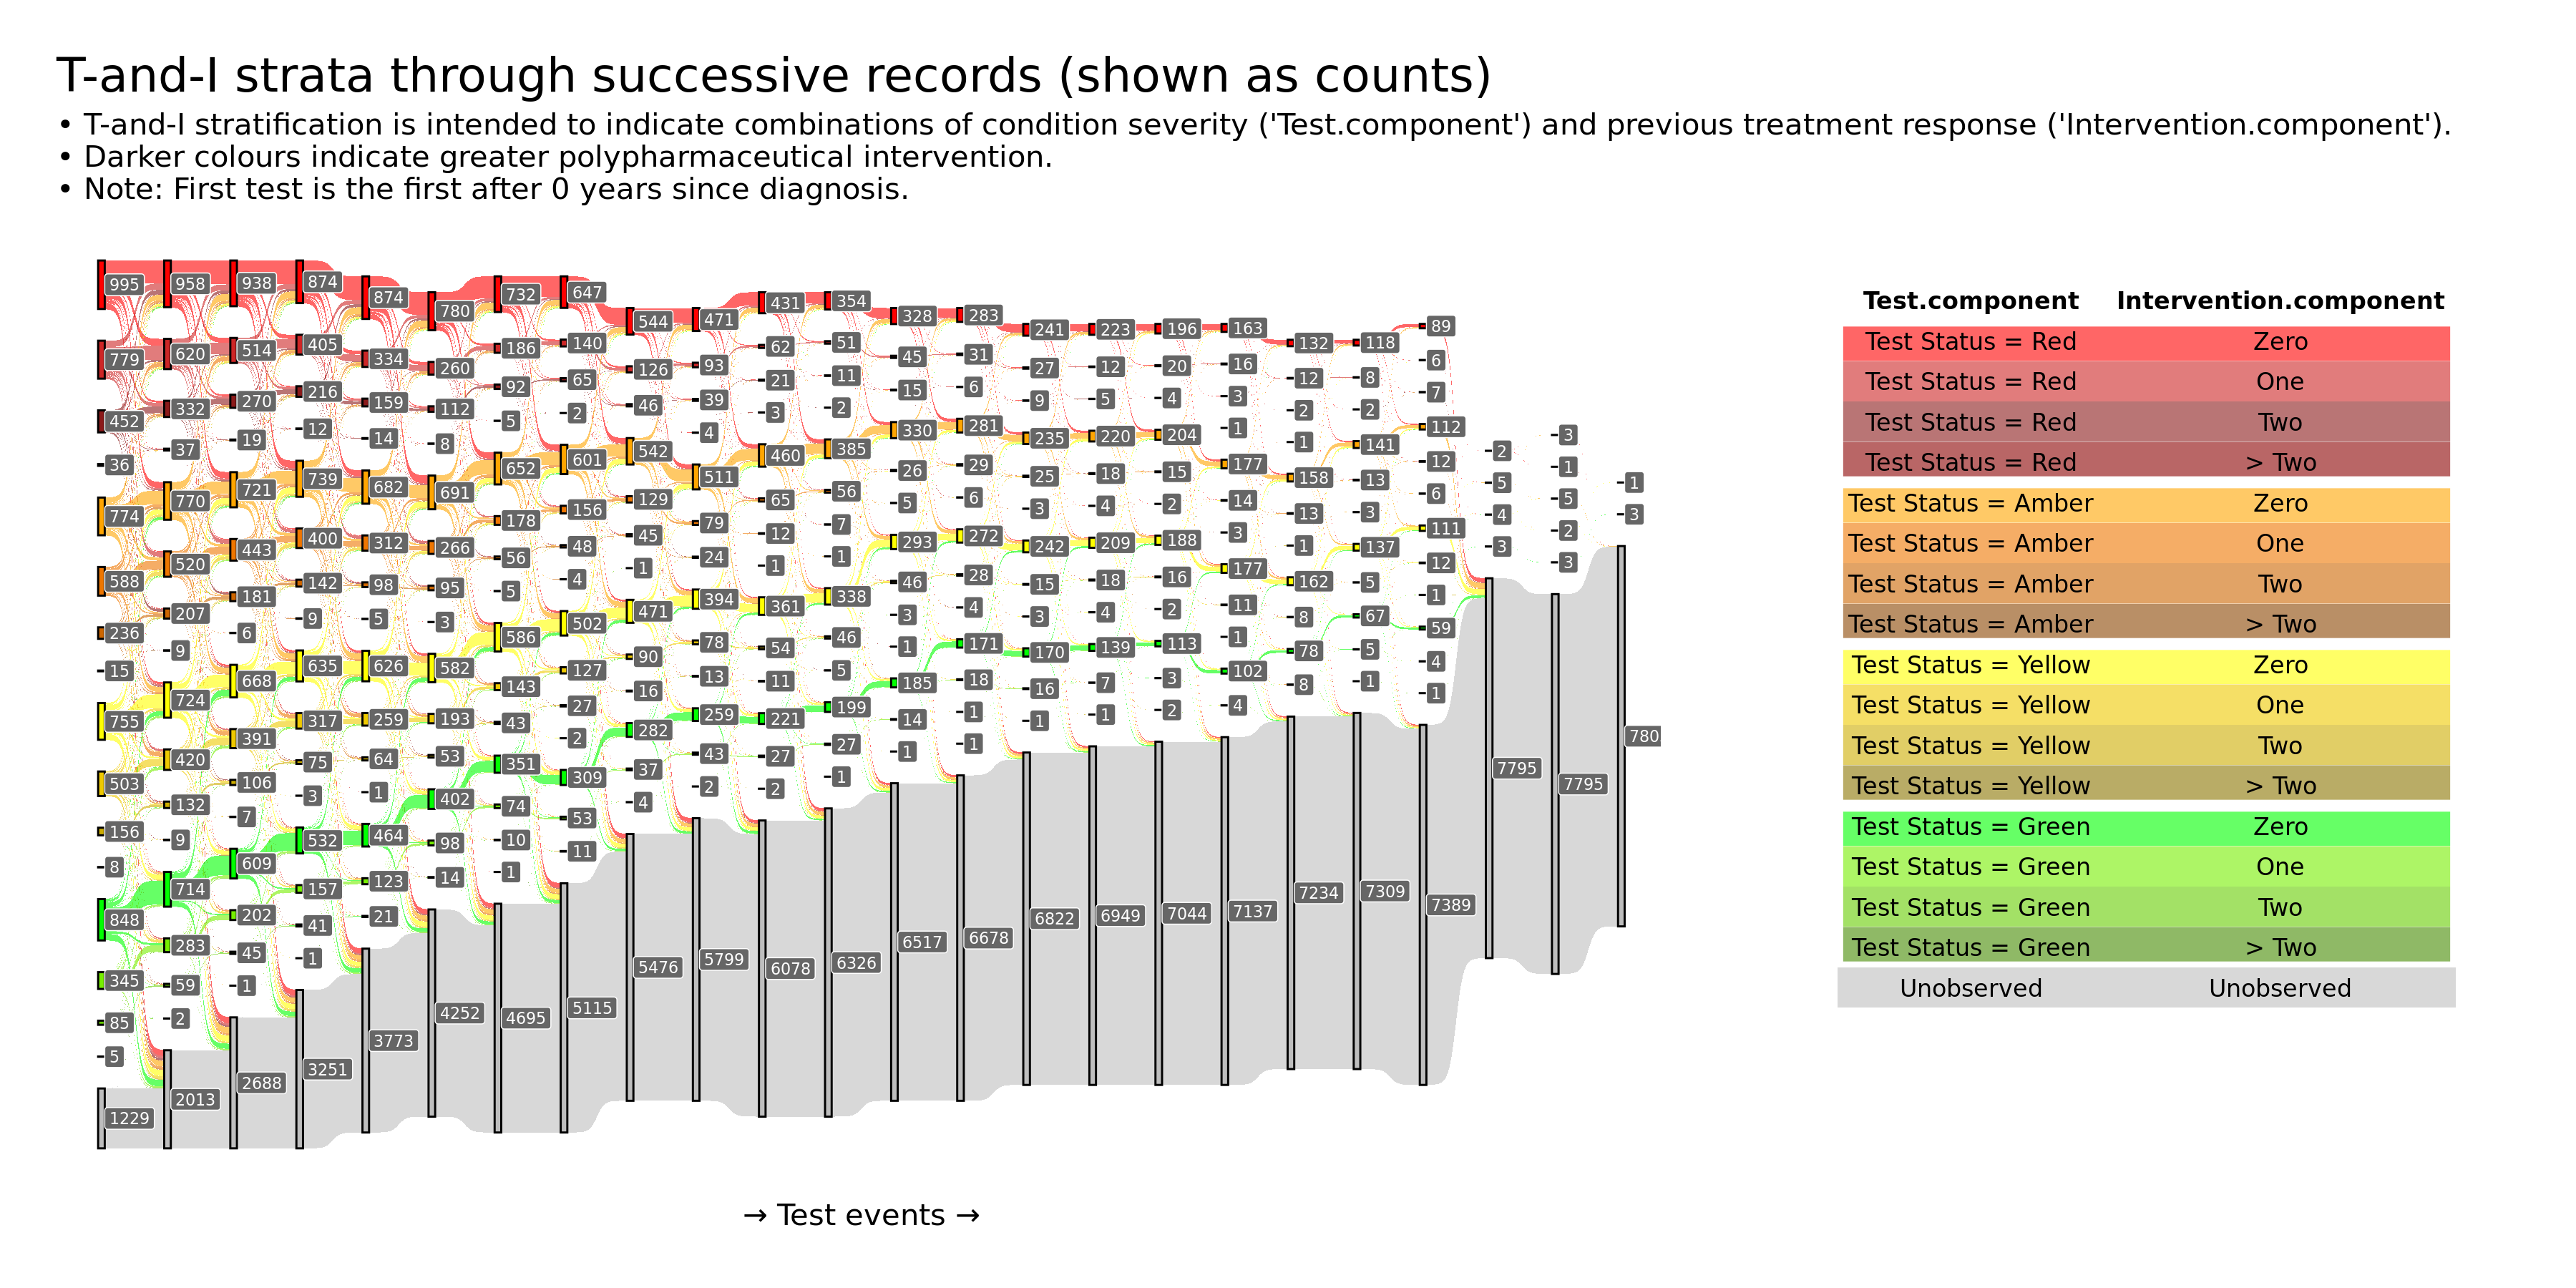

In [18]:
if ( run_Sankey_plots )
    {
        # Make plot data.
        plotData <-
            sts_seqmine_TandI %>%
            dplyr::select( - last_col() ) %>%
            ggsankey::make_long( colnames( . ) ) %>%
            # Reorder the `node` variable values to make their colours.
            dplyr::mutate_at(
                .vars = vars( node, next_node )
                ,.funs = funs( factor( ., levels = df_TandI_factor %>% dplyr::select( TandI_fct_order ) %>% dplyr::pull() ) )
            ) %>%
            suppressWarnings()

        # Make plot graphic.
        plot_sankey <-
            plotData %>%
            ggplot(
                aes(
                    x = x
                    ,next_x = next_x
                    ,node = node %>% factor( ., levels = rev( levels( . ) ) )            # I reverse the order because ggsankey orders 
                    ,next_node = next_node %>% factor( ., levels = rev( levels( . ) ) )  # bottom to top while the legend is ordered
                    ,fill = node                                                         # top to bottom.
                )
            ) +
            ggsankey::geom_sankey(
                flow.alpha = 0.6 # flow.alpha is deciding the transparency of the ribbon colour.
                ,node.color = 1
            ) +
            ggsankey::geom_sankey_label(
                aes(
                  x = as.numeric(x) + .05,
                  label = after_stat(paste0(freq))
                ),
                size = 8 / .pt, color = "white", fill = "gray40",
                hjust = 0
              ) +
            labs(
                title = "T-and-I strata through successive records (shown as counts)"
                ,subtitle =
                    paste0(
                        "\u2022 T-and-I stratification is intended to indicate combinations of condition severity (\'Test.component"
                        ,"\') and previous treatment response (\'Intervention.component\').\n"
                        ,"\u2022 Darker colours indicate greater polypharmaceutical intervention.\n"
                        ,paste0("\u2022 Note: First test is the first after ", lubridate::interval( date_diagnosis_threshold, date_followup_start ) / lubridate::years(1), " years since diagnosis.")
                    )
                ,x = "\u2192 Test events \u2192"
            ) +
            # Colour the strata using a traffic-light palette.
            scale_fill_manual( values = df_TandI_factor %>% dplyr::select( TandI_colours_order ) %>% dplyr::pull() %>% scales::alpha(1) ) + # scales::alpha() is deciding the transparency of the bar colours.
            theme_minimal() +
            theme(
                title = element_text( size = 20 )
                ,plot.subtitle = element_text( size = 15 )
                ,axis.title = element_text( size = 15 )
                ,plot.caption = ggtext::element_markdown( size = 10, hjust = 0 )
                ,plot.caption.position = 'plot'
                ,plot.title.position = 'plot'
                ,legend.position = 'none'
                ,axis.text.y = element_blank()
                ,axis.text.x = element_blank()
                ,plot.margin = unit( c(1, 1, 1, 1), "cm")
                ,axis.title.y = element_text( margin = margin( r = 20 ) )
                ,panel.grid.major = element_blank()
                ,panel.grid.minor = element_blank()
                )

        # Make table explaining the strata.
        plot_table <-
            TandI_display_table %>%
            dplyr::select( - Value ) %>%
            # Basic table layout.
            gridExtra::tableGrob(
                rows = NULL
                ,theme = 
                ttheme_minimal(
                    core = list(
                        bg_params = list( fill = df_TandI_factor %>% dplyr::select( TandI_colours_order ) %>% dplyr::pull() %>% scales::alpha(0.6), col = NA ) # scales::alpha() is deciding the transparency of the table colours.
                    )
                )
            ) %>%
            # Add sub-table borders to set the groups of colours apart.
            gtable::gtable_add_grob(
                grobs = grid::rectGrob( gp = gpar( fill = NA, col = "white", lwd = 8 ) )
                ,t = 2, b = 5, l = 1, r = 2
            ) %>%
            gtable::gtable_add_grob(
                grobs = grid::rectGrob( gp = gpar( fill = NA, col = "white", lwd = 8 ) )
                ,t = 6, b = 9, l = 1, r = 2
            ) %>%
            gtable::gtable_add_grob(
                grobs = grid::rectGrob( gp = gpar( fill = NA, col = "white", lwd = 8 ) )
                ,t = 10, b = 13, l = 1, r = 2
            ) %>%
            gtable::gtable_add_grob(
                grobs = grid::rectGrob( gp = gpar( fill = NA, col = "white", lwd = 8 ) )
                ,t = 14, b = 17, l = 1, r = 2
            )

        # Plot.
        options( repr.plot.width = 18, repr.plot.height = 9, repr.plot.res = 200 )

        plot_TandI_Sankey <-
            cowplot::plot_grid(
                plot_sankey, plot_table
                ,nrow = 1
                ,rel_widths = c( 2/3, 1/3 )
            )

        plot_TandI_Sankey
    }

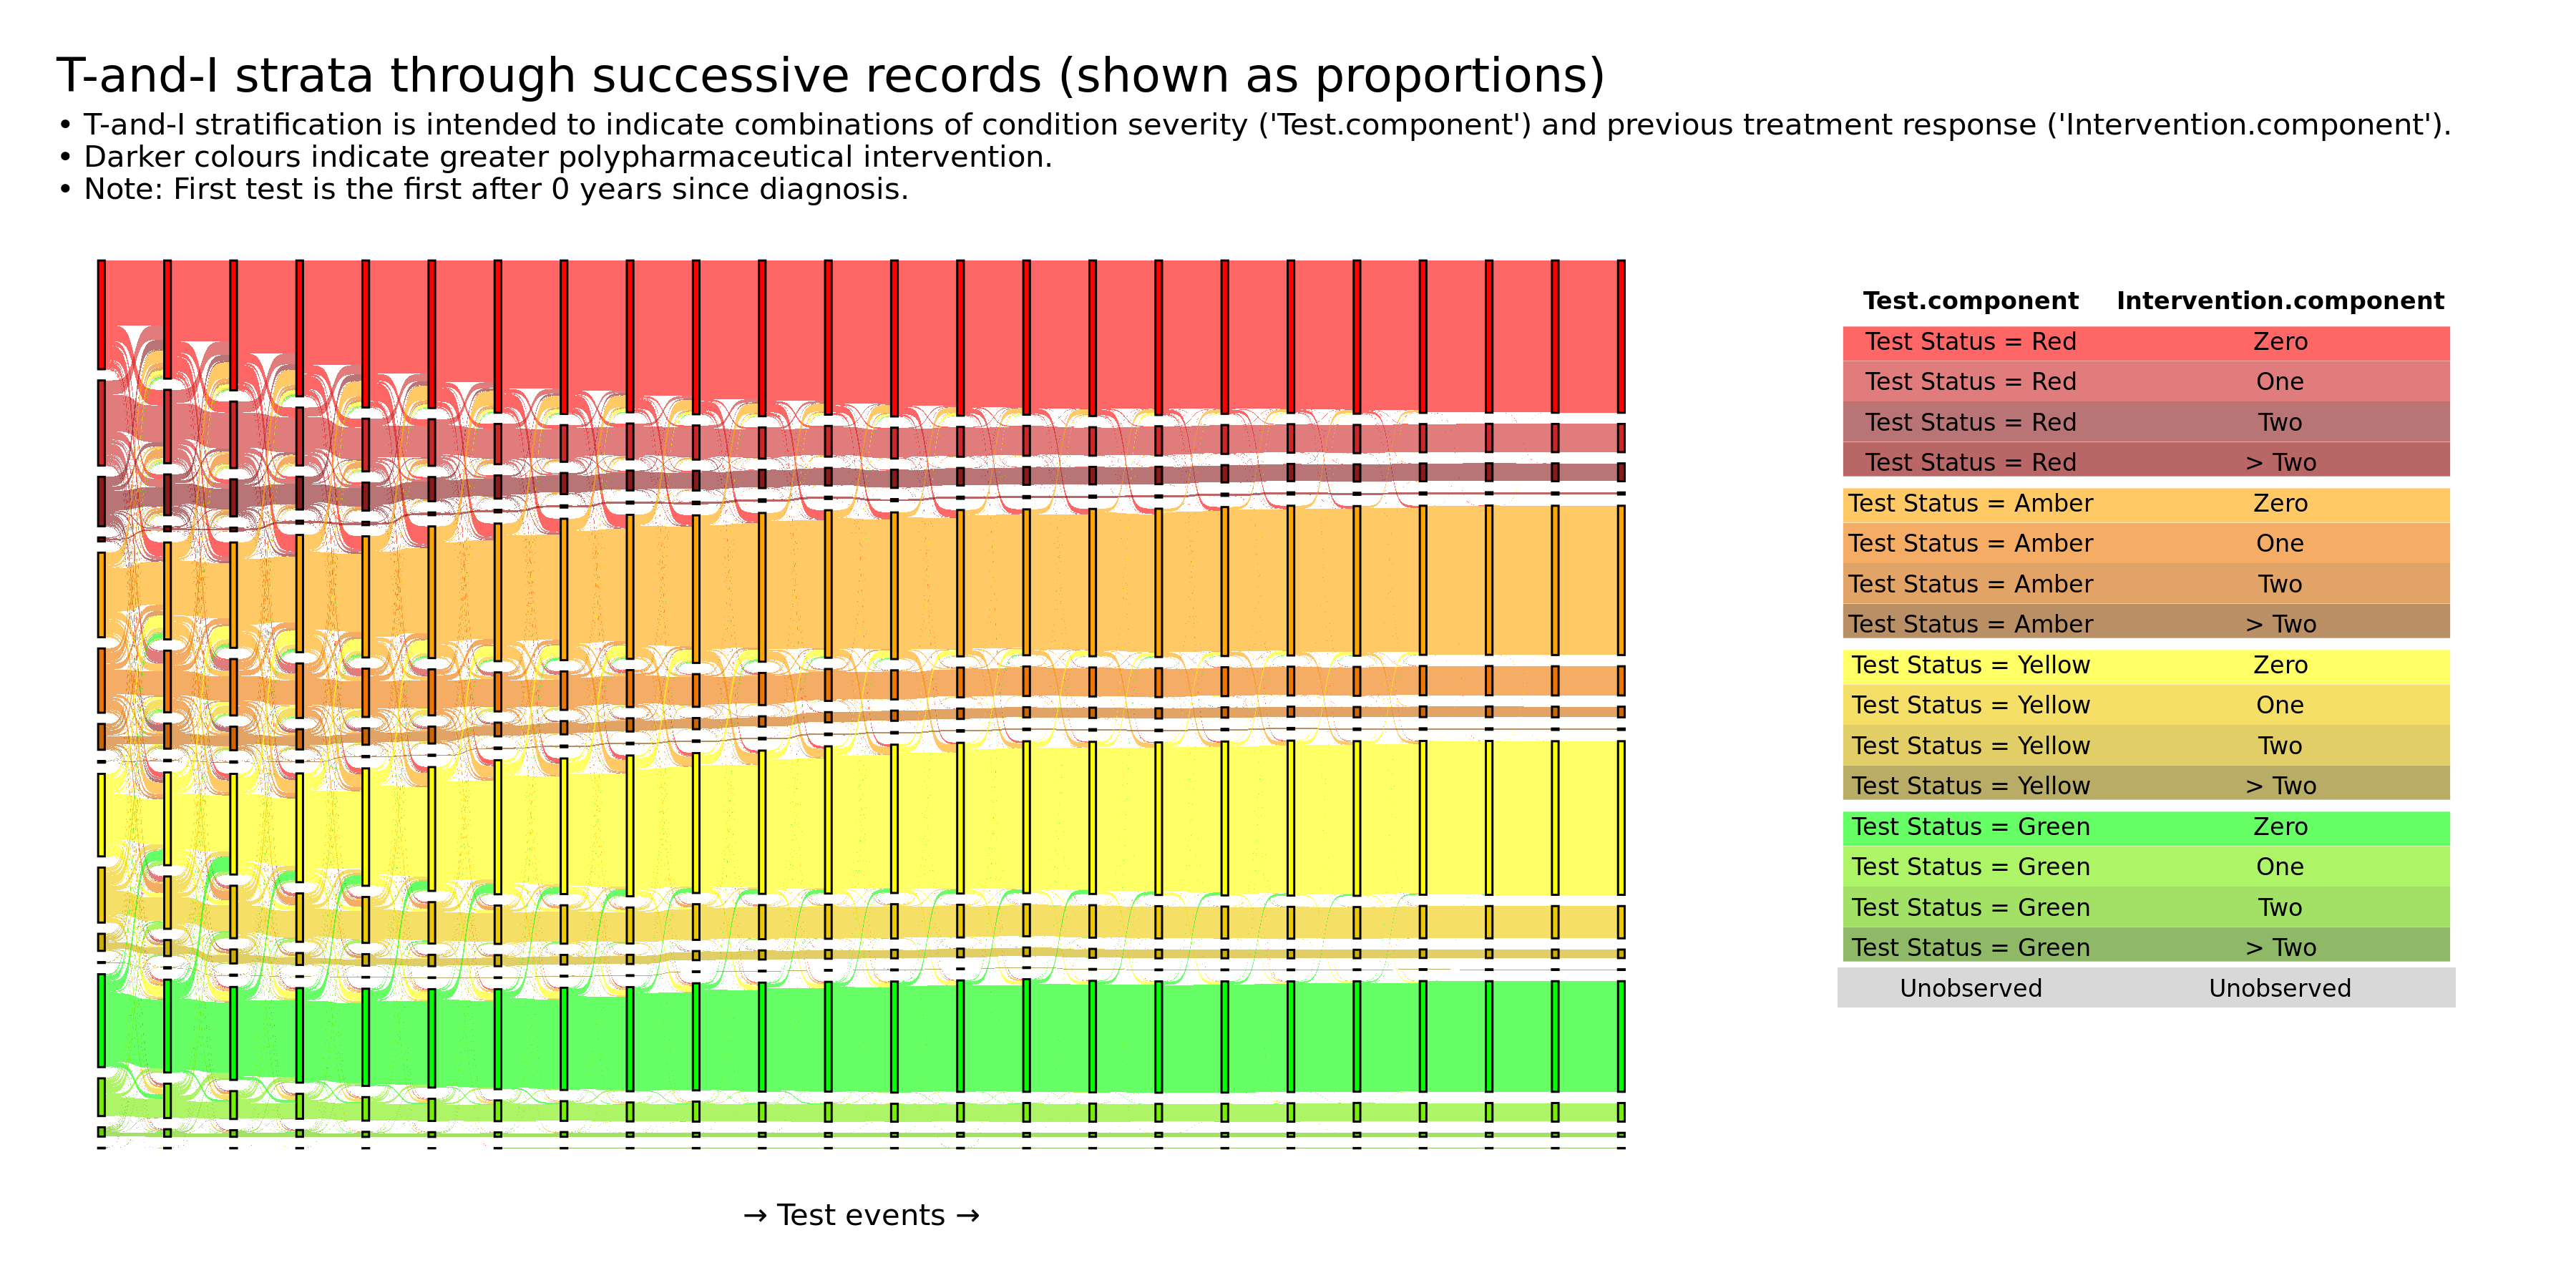

In [19]:
if ( run_Sankey_plots )
    {
        # Make plot data.
        plotData <-
            sts_seqmine_TandI_excludingUnobserved %>%
            dplyr::select( - last_col() ) %>%
            ggsankey::make_long( colnames( . ) ) %>%
            # Reorder the `node` variable values to make their colours.
            dplyr::mutate_at(
                .vars = vars( node, next_node )
                ,.funs = funs( factor( ., levels = df_TandI_factor %>% dplyr::select( TandI_fct_order ) %>% dplyr::pull() ) )
            ) %>%
            suppressWarnings()

        # Make plot graphic.
        plot_sankey <-
            plotData %>%
            ggplot(
                aes(
                    x = x
                    ,next_x = next_x
                    ,node = node %>% factor( ., levels = rev( levels( . ) ) )            # I reverse the order because ggsankey orders 
                    ,next_node = next_node %>% factor( ., levels = rev( levels( . ) ) )  # bottom to top while the legend is ordered
                    ,fill = node                                                         # top to bottom.
                )
            ) +
            ggsankey::geom_sankey(
                flow.alpha = 0.6 # flow.alpha is deciding the transparency of the ribbon colour.
                ,node.color = 1
            ) +
 #           ggsankey::geom_sankey_label(
 #               aes(
 #                 x = as.numeric(x) + .05,
 #                 label = after_stat(paste0(freq))
 #               ),
 #               size = 8 / .pt, color = "white", fill = "gray40",
 #               hjust = 0
 #             ) +
            labs(
                title = "T-and-I strata through successive records (shown as proportions)"
                ,subtitle =
                    paste0(
                        "\u2022 T-and-I stratification is intended to indicate combinations of condition severity (\'Test.component"
                        ,"\') and previous treatment response (\'Intervention.component\').\n"
                        ,"\u2022 Darker colours indicate greater polypharmaceutical intervention.\n"
                        ,paste0("\u2022 Note: First test is the first after ", lubridate::interval( date_diagnosis_threshold, date_followup_start ) / lubridate::years(1), " years since diagnosis.")
                    )
                ,x = "\u2192 Test events \u2192"
            ) +
            # Colour the strata using a traffic-light palette.
            scale_fill_manual( values = df_TandI_factor %>% dplyr::select( TandI_colours_order ) %>% dplyr::pull() %>% scales::alpha(1) ) + # scales::alpha() is deciding the transparency of the bar colours.
            theme_minimal() +
            theme(
                title = element_text( size = 20 )
                ,plot.subtitle = element_text( size = 15 )
                ,axis.title = element_text( size = 15 )
                ,plot.caption = ggtext::element_markdown( size = 10, hjust = 0 )
                ,plot.caption.position = 'plot'
                ,plot.title.position = 'plot'
                ,legend.position = 'none'
                ,axis.text.y = element_blank()
                ,axis.text.x = element_blank()
                ,plot.margin = unit( c(1, 1, 1, 1), "cm")
                ,axis.title.y = element_text( margin = margin( r = 20 ) )
                ,panel.grid.major = element_blank()
                ,panel.grid.minor = element_blank()
                )

        # Make table explaining the strata.
        plot_table <-
            TandI_display_table %>%
            dplyr::select( - Value ) %>%
            # Basic table layout.
            gridExtra::tableGrob(
                rows = NULL
                ,theme = 
                ttheme_minimal(
                    core = list(
                        bg_params = list( fill = df_TandI_factor %>% dplyr::select( TandI_colours_order ) %>% dplyr::pull() %>% scales::alpha(0.6), col = NA ) # scales::alpha() is deciding the transparency of the table colours.
                    )
                )
            ) %>%
            # Add sub-table borders to set the groups of colours apart.
            gtable::gtable_add_grob(
                grobs = grid::rectGrob( gp = gpar( fill = NA, col = "white", lwd = 8 ) )
                ,t = 2, b = 5, l = 1, r = 2
            ) %>%
            gtable::gtable_add_grob(
                grobs = grid::rectGrob( gp = gpar( fill = NA, col = "white", lwd = 8 ) )
                ,t = 6, b = 9, l = 1, r = 2
            ) %>%
            gtable::gtable_add_grob(
                grobs = grid::rectGrob( gp = gpar( fill = NA, col = "white", lwd = 8 ) )
                ,t = 10, b = 13, l = 1, r = 2
            ) %>%
            gtable::gtable_add_grob(
                grobs = grid::rectGrob( gp = gpar( fill = NA, col = "white", lwd = 8 ) )
                ,t = 14, b = 17, l = 1, r = 2
            )

        # Plot.
        options( repr.plot.width = 18, repr.plot.height = 9, repr.plot.res = 200 )

        plot_TandI_Sankey_excludingUnobserved <-
            cowplot::plot_grid(
                plot_sankey, plot_table
                ,nrow = 1
                ,rel_widths = c( 2/3, 1/3 )
            )

        plot_TandI_Sankey_excludingUnobserved
    }

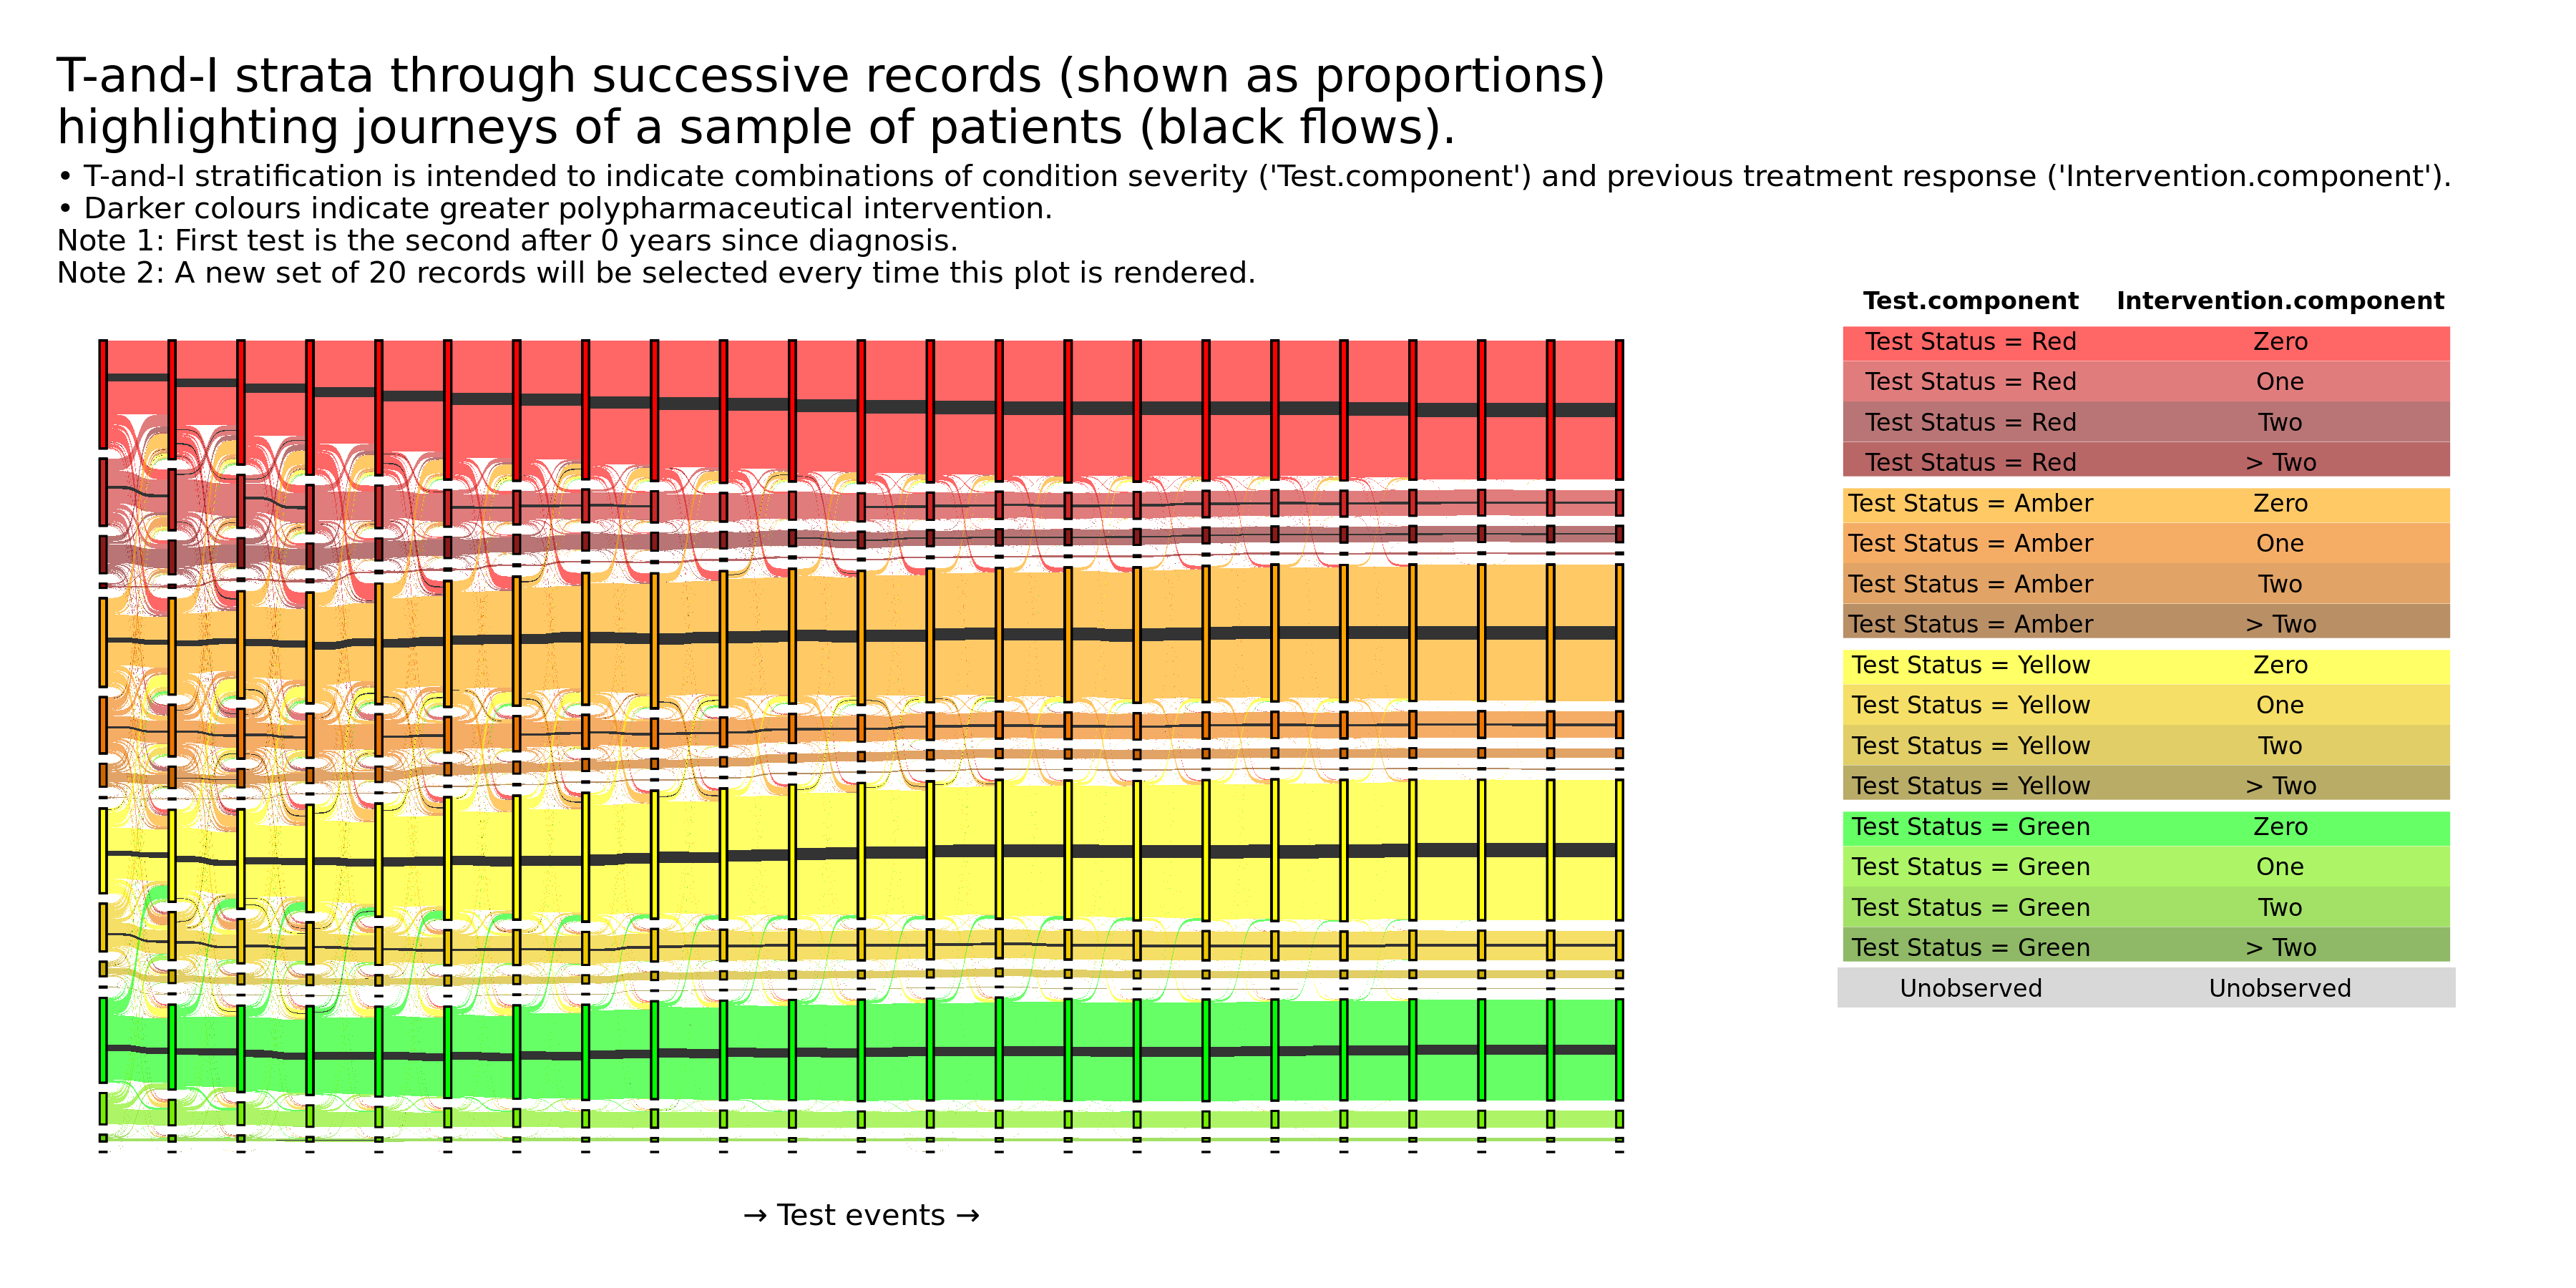

In [21]:
if ( run_Sankey_plots )
    {
         # Set plot parameters.
        n_records_to_sample <- 20
    
        # Make plot data.
        plotData <-
            sts_seqmine_TandI_excludingUnobserved %>%
            # Remove the default start node.
            dplyr::select( - last_col(), -a2 ) %>%
            ggsankey::make_long( colnames( . ), subset.logic = "random", n.random = n_records_to_sample ) %>%
            # Reorder the `node` variable values to make their colours.
            dplyr::mutate_at(
                .vars = vars( node, next_node )
                ,.funs = funs( factor( ., levels = df_TandI_factor %>% dplyr::select( TandI_fct_order ) %>% dplyr::pull() ) )
            ) %>%
            suppressWarnings()
    
        # Make plot graphic.
        plot_sankey <-
            plotData %>%
            ggplot(
                aes(
                    x = x
                    ,next_x = next_x
                    ,node = node %>% factor( ., levels = rev( levels( . ) ) )            # I reverse the order because ggsankey orders 
                    ,next_node = next_node %>% factor( ., levels = rev( levels( . ) ) )  # bottom to top while the legend is ordered
                    ,fill = node                                                         # top to bottom.
                )
            ) +
            ggsankey::geom_sankey(
                flow.alpha = 0.6 # flow.alpha is deciding the transparency of the ribbon colour.
                ,node.color = 1
            ) +
            ggsankey::geom_sankey_subset( mapping = ggplot2::aes( subset.idx = subset.idx ) ) +
 #           ggsankey::geom_sankey_label(
 #               aes(
 #                 x = as.numeric(x) + .05,
 #                 label = after_stat(paste0(freq))
 #               ),
 #               size = 8 / .pt, color = "white", fill = "gray40",
 #               hjust = 0
 #             ) +
            labs(
                title = "T-and-I strata through successive records (shown as proportions)\nhighlighting journeys of a sample of patients (black flows)."
                ,subtitle =
                    paste0(
                        "\u2022 T-and-I stratification is intended to indicate combinations of condition severity (\'Test.component"
                        ,"\') and previous treatment response (\'Intervention.component\').\n"
                        ,"\u2022 Darker colours indicate greater polypharmaceutical intervention.\n"
                        ,"Note 1: First test is the second after ", lubridate::interval( date_diagnosis_threshold, date_followup_start ) / lubridate::years(1), " years since diagnosis.\n"
                        ,"Note 2: A new set of ", n_records_to_sample," records will be selected every time this plot is rendered."
                    )
                ,x = "\u2192 Test events \u2192"
            ) +
            # Colour the strata using a traffic-light palette.
            scale_fill_manual( values = df_TandI_factor %>% dplyr::select( TandI_colours_order ) %>% dplyr::pull() %>% scales::alpha(1) ) + # scales::alpha() is deciding the transparency of the bar colours.
            theme_minimal() +
            theme(
                title = element_text( size = 20 )
                ,plot.subtitle = element_text( size = 15 )
                ,axis.title = element_text( size = 15 )
                ,plot.caption = ggtext::element_markdown( size = 10, hjust = 0 )
                ,plot.caption.position = 'plot'
                ,plot.title.position = 'plot'
                ,legend.position = 'none'
                ,axis.text.y = element_blank()
                ,axis.text.x = element_blank()
                ,plot.margin = unit( c(1, 1, 1, 1), "cm")
                ,axis.title.y = element_text( margin = margin( r = 20 ) )
                ,panel.grid.major = element_blank()
                ,panel.grid.minor = element_blank()
                )

        # Make table explaining the strata.
        plot_table <-
            TandI_display_table %>%
            dplyr::select( - Value ) %>%
            # Basic table layout.
            gridExtra::tableGrob(
                rows = NULL
                ,theme = 
                ttheme_minimal(
                    core = list(
                        bg_params = list( fill = df_TandI_factor %>% dplyr::select( TandI_colours_order ) %>% dplyr::pull() %>% scales::alpha(0.6), col = NA ) # scales::alpha() is deciding the transparency of the table colours.
                    )
                )
            ) %>%
            # Add sub-table borders to set the groups of colours apart.
            gtable::gtable_add_grob(
                grobs = grid::rectGrob( gp = gpar( fill = NA, col = "white", lwd = 8 ) )
                ,t = 2, b = 5, l = 1, r = 2
            ) %>%
            gtable::gtable_add_grob(
                grobs = grid::rectGrob( gp = gpar( fill = NA, col = "white", lwd = 8 ) )
                ,t = 6, b = 9, l = 1, r = 2
            ) %>%
            gtable::gtable_add_grob(
                grobs = grid::rectGrob( gp = gpar( fill = NA, col = "white", lwd = 8 ) )
                ,t = 10, b = 13, l = 1, r = 2
            ) %>%
            gtable::gtable_add_grob(
                grobs = grid::rectGrob( gp = gpar( fill = NA, col = "white", lwd = 8 ) )
                ,t = 14, b = 17, l = 1, r = 2
            )

        # Plot.
        options( repr.plot.width = 18, repr.plot.height = 9, repr.plot.res = 200 )

        plot_TandI_Sankey_excludingUnobserved <-
            cowplot::plot_grid(
                plot_sankey, plot_table
                ,nrow = 1
                ,rel_widths = c( 2/3, 1/3 )
            )

        plot_TandI_Sankey_excludingUnobserved
    }

Some initial observations from the T-and-I Sankey diagram:
1. __Within each test-status level, the largest proportion of patient records indicate no medication use.
    - Evidenced by the vertical bars of each colour being largest for the 'Zero' intevention compotnent.
2. __Unlike the previous iteration where we looked at sequences from diagosis, these sequences from 10 years after diagnosis show an increase the proportion of records indicating a given test status with no prescription.__
    - Evidenced by a gradual increase in the size of ribbons joining the same colours, as we move from left to right in the graphic.

In [ ]:
###################### NOTHING HAS BEEN UPDATED BEYOND THIS POINT ###############################

#### Multimorbidity strata

In the next plot, the Sankey plot visualises the proportions of patient records moving from no multimorbidity to multimorbidity.

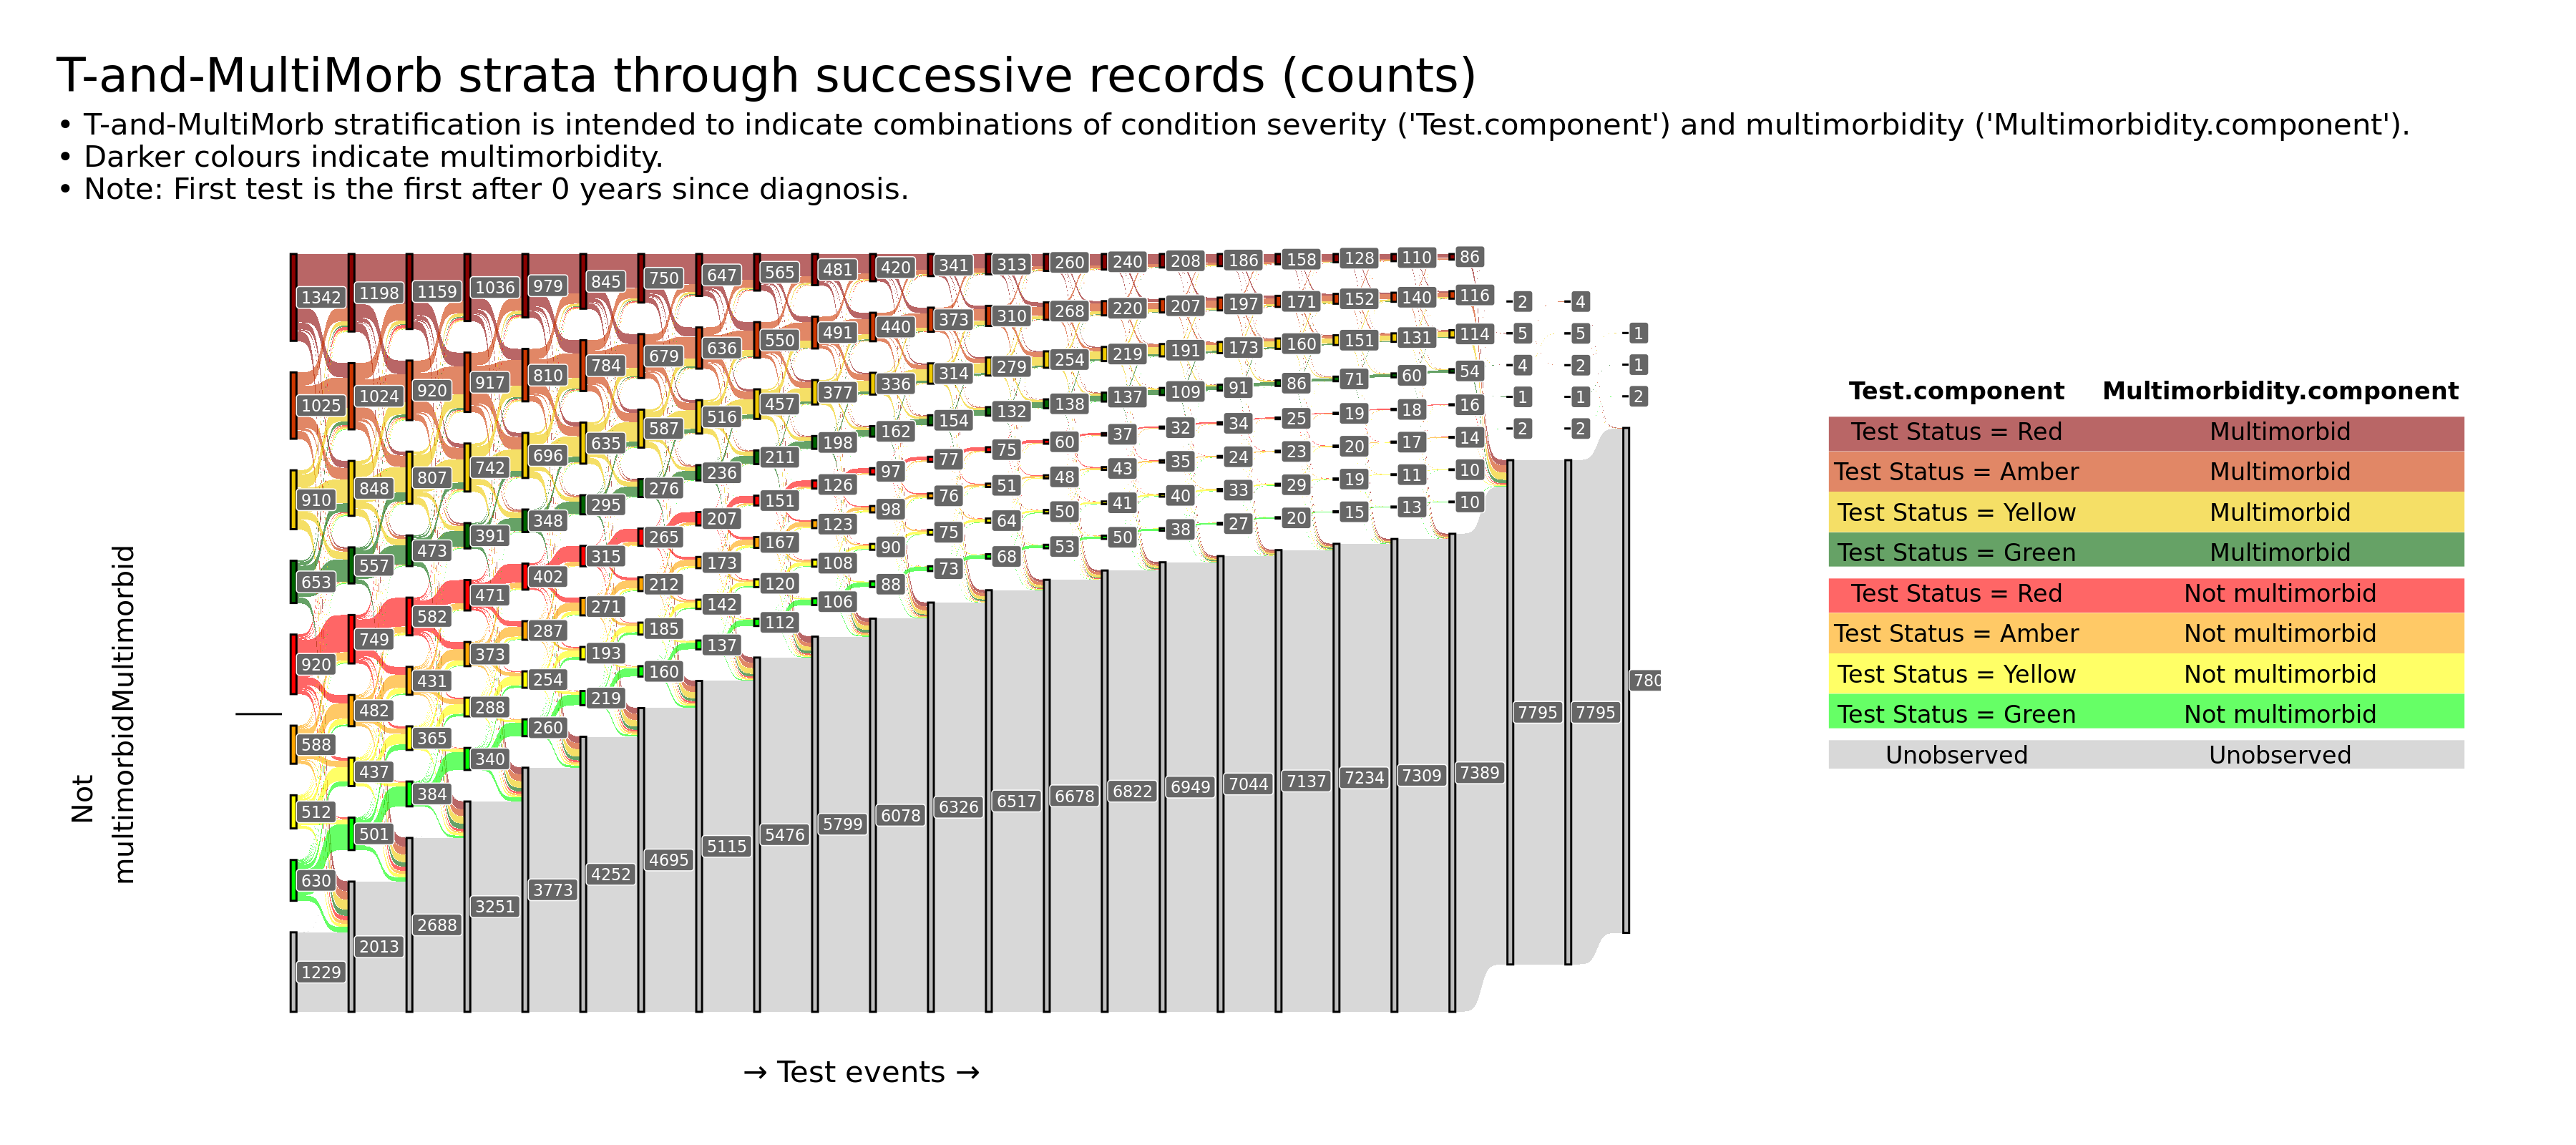

In [22]:
if ( run_Sankey_plots )
    {
        # Make plot data.
        plotData <-
            sts_seqmine_TandMultiMorb %>%
            # Remove the default start node.
            dplyr::select( - last_col() ) %>%
            ggsankey::make_long( colnames( . ) ) %>%
            # Reorder the `node` variable values to make their colours.
            dplyr::mutate_at(
                .vars = vars( node, next_node )
                ,.funs = funs( factor( ., levels = df_TandMultiMorb_factor %>% dplyr::select( TandMultiMorb_fct_order ) %>% dplyr::pull() ) )
            ) %>%
            suppressWarnings()
    
        # Calculate where to place the line segment that divides the multimorb from the not-multimorbid strata.
        n_patients_Multimorb_at_start <- sts_seqmine_TandMultiMorb %>% filter( !stringr::str_detect( a2, pattern = "Not" ) ) %>% nrow()
        n_patients_notMultimorb_at_start <- sts_seqmine_TandMultiMorb %>% filter( stringr::str_detect( a2, pattern = "Not" ) ) %>% nrow()
        segment_offset <-
            ifelse(
                n_patients_notMultimorb_at_start < n_patients_Multimorb_at_start
                ,( ( n_patients_Multimorb_at_start + n_patients_notMultimorb_at_start ) / 2 ) - n_patients_Multimorb_at_start
                ,( ( n_patients_Multimorb_at_start + n_patients_notMultimorb_at_start ) / 2 ) + n_patients_notMultimorb_at_start
            )
            

        # Make plot graphic.
        plot_sankey <-
            plotData %>%
            ggplot(
                aes(
                    x = x
                    ,next_x = next_x
                    ,node = node %>% factor( ., levels = rev( levels( . ) ) )            # I reverse the order because ggsankey orders 
                    ,next_node = next_node %>% factor( ., levels = rev( levels( . ) ) )  # bottom to top while the legend is ordered
                    ,fill = node                                                         # top to bottom.
                )
            ) +
            # Plot Sankey.
            ggsankey::geom_sankey(
                flow.alpha = 0.6 # flow.alpha is deciding the transparency of the ribbon colour.
                ,node.color = 1
                #,space = 33
            ) +
            # Annotate the left side of the plot with labels.
            annotate("segment", x = 0, xend = 0.8, y = segment_offset, yend = segment_offset ) +
            annotate("text", x = -3, y = segment_offset + ( n_patients_notMultimorb_at_start / 2 ), label = "\n\n\nMultimorbid", angle = 90, size = 5, hjust = "center" ) +
            annotate("text", x = -3, y = segment_offset - ( n_patients_notMultimorb_at_start / 2 ), label = "\n\nNot\nmultimorbid", angle = 90, size = 5, hjust = "center" ) +
            # Overlay count labels.
            ggsankey::geom_sankey_label(
                aes(
                  x = as.numeric(x) + .05,
                  label = after_stat(paste0(freq))
                ),
                size = 8 / .pt, color = "white", fill = "gray40",
                hjust = 0
              ) +
            labs(
                title = "T-and-MultiMorb strata through successive records (counts)"
                ,subtitle =
                    paste0(
                        "\u2022 T-and-MultiMorb stratification is intended to indicate combinations of condition severity (\'Test.component"
                        ,"\') and multimorbidity (\'Multimorbidity.component\').\n"
                        ,"\u2022 Darker colours indicate multimorbidity.\n"
                        ,paste0("\u2022 Note: First test is the first after ", lubridate::interval( date_diagnosis_threshold, date_followup_start ) / lubridate::years(1), " years since diagnosis.")
                    )
                ,x = "\u2192 Test events \u2192"
            ) +
            # Colour the strata using a traffic-light palette.
            scale_fill_manual( values = df_TandMultiMorb_factor %>% dplyr::select( TandMultiMorb_colours_order ) %>% dplyr::pull() %>% scales::alpha(1) ) + # scales::alpha() is deciding the transparency of the bar colours.
            # Finish theme.
            theme_minimal() +
            theme(
                title = element_text( size = 20 )
                ,plot.subtitle = element_text( size = 15 )
                ,axis.title = element_text( size = 15 )
                ,plot.caption = ggtext::element_markdown( size = 10, hjust = 0 )
                ,plot.caption.position = 'plot'
                ,plot.title.position = 'plot'
                ,legend.position = 'none'
                ,axis.text.y = element_blank()
                ,axis.title.y = element_blank()
                ,axis.text.x = element_blank()
                ,plot.margin = unit( c(t = 1, r = 1, b = 1, l = 1), "cm")
                ,panel.grid.major = element_blank()
                ,panel.grid.minor = element_blank()
                )

        # Make table explaining the strata.
        plot_table <-
            TandMultiMorb_display_table %>%
            dplyr::select( - Value ) %>%
            # Basic table layout.
            gridExtra::tableGrob(
                rows = NULL
                ,theme = 
                ttheme_minimal(
                    core = list(
                        bg_params = list( fill = df_TandMultiMorb_factor %>% dplyr::select( TandMultiMorb_colours_order ) %>% dplyr::pull() %>% scales::alpha(0.6), col = NA ) # scales::alpha() is deciding the transparency of the table colours.
                    )
                )
            ) %>%
            # Add sub-table borders to set the groups of colours apart.
            gtable::gtable_add_grob(
                grobs = grid::rectGrob( gp = gpar( fill = NA, col = "white", lwd = 8 ) )
                ,t = 2, b = 5, l = 1, r = 2
            ) %>%
            gtable::gtable_add_grob(
                grobs = grid::rectGrob( gp = gpar( fill = NA, col = "white", lwd = 8 ) )
                ,t = 6, b = 9, l = 1, r = 2
            ) %>%
            gtable::gtable_add_grob(
                grobs = grid::rectGrob( gp = gpar( fill = NA, col = "white", lwd = 8 ) )
                ,t = 10, b = 10, l = 1, r = 2
            )

        # Plot.
        options( repr.plot.width = 18, repr.plot.height = 8, repr.plot.res = 200 )

        plot_TandMultiMorb_Sankey <-
            cowplot::plot_grid(
                plot_sankey, plot_table
                ,nrow = 1
                ,rel_widths = c( 2/3, 1/3 )
            )

        plot_TandMultiMorb_Sankey
    }

In [ ]:
if ( run_Sankey_plots )
    {
        # Make plot data.
        plotData <-
            sts_seqmine_TandMultiMorb_excludingUnobserved %>%
            # Remove the default start node.
            dplyr::select( - last_col() ) %>%
            ggsankey::make_long( colnames( . ) ) %>%
            # Reorder the `node` variable values to make their colours.
            dplyr::mutate_at(
                .vars = vars( node, next_node )
                ,.funs = funs( factor( ., levels = df_TandMultiMorb_factor %>% dplyr::select( TandMultiMorb_fct_order ) %>% dplyr::pull() ) )
            ) %>%
            suppressWarnings()
    
        # Calculate where to place the line segment that divides the multimorb from the not-multimorbid strata.
        n_patients_Multimorb_at_start <- sts_seqmine_TandMultiMorb_excludingUnobserved %>% filter( !stringr::str_detect( a2, pattern = "Not" ) ) %>% nrow()
        n_patients_notMultimorb_at_start <- sts_seqmine_TandMultiMorb_excludingUnobserved %>% filter( stringr::str_detect( a2, pattern = "Not" ) ) %>% nrow()
        segment_offset <-
            ifelse(
                n_patients_notMultimorb_at_start < n_patients_Multimorb_at_start
                ,( ( n_patients_Multimorb_at_start + n_patients_notMultimorb_at_start ) / 2 ) - n_patients_Multimorb_at_start
                ,( ( n_patients_Multimorb_at_start + n_patients_notMultimorb_at_start ) / 2 ) + n_patients_notMultimorb_at_start
            )
            

        # Make plot graphic.
        plot_sankey <-
            plotData %>%
            ggplot(
                aes(
                    x = x
                    ,next_x = next_x
                    ,node = node %>% factor( ., levels = rev( levels( . ) ) )            # I reverse the order because ggsankey orders 
                    ,next_node = next_node %>% factor( ., levels = rev( levels( . ) ) )  # bottom to top while the legend is ordered
                    ,fill = node                                                         # top to bottom.
                )
            ) +
            # Plot Sankey.
            ggsankey::geom_sankey(
                flow.alpha = 0.6 # flow.alpha is deciding the transparency of the ribbon colour.
                ,node.color = 1
                #,space = 33
            ) +
            # Annotate the left side of the plot with labels.
            annotate("segment", x = 0, xend = 0.8, y = segment_offset, yend = segment_offset ) +
            annotate("text", x = -3, y = segment_offset + ( n_patients_notMultimorb_at_start / 2 ), label = "\n\n\nMultimorbid", angle = 90, size = 5, hjust = "center" ) +
            annotate("text", x = -3, y = segment_offset - ( n_patients_notMultimorb_at_start / 2 ), label = "\n\nNot\nmultimorbid", angle = 90, size = 5, hjust = "center" ) +
            # Overlay count labels.
            ggsankey::geom_sankey_label(
                aes(
                  x = as.numeric(x) + .05,
                  label = after_stat(paste0(freq))
                ),
                size = 8 / .pt, color = "white", fill = "gray40",
                hjust = 0
              ) +
            labs(
                title = "T-and-MultiMorb strata through successive records (proportions)"
                ,subtitle =
                    paste0(
                        "\u2022 T-and-MultiMorb stratification is intended to indicate combinations of condition severity (\'Test.component"
                        ,"\') and multimorbidity (\'Multimorbidity.component\').\n"
                        ,"\u2022 Darker colours indicate multimorbidity.\n"
                        ,paste0("\u2022 Note: First test is the first after ", lubridate::interval( date_diagnosis_threshold, date_followup_start ) / lubridate::years(1), " years since diagnosis.")
                    )
                ,x = "\u2192 Test events \u2192"
            ) +
            # Colour the strata using a traffic-light palette.
            scale_fill_manual( values = df_TandMultiMorb_factor %>% dplyr::select( TandMultiMorb_colours_order ) %>% dplyr::pull() %>% scales::alpha(1) ) + # scales::alpha() is deciding the transparency of the bar colours.
            # Finish theme.
            theme_minimal() +
            theme(
                title = element_text( size = 20 )
                ,plot.subtitle = element_text( size = 15 )
                ,axis.title = element_text( size = 15 )
                ,plot.caption = ggtext::element_markdown( size = 10, hjust = 0 )
                ,plot.caption.position = 'plot'
                ,plot.title.position = 'plot'
                ,legend.position = 'none'
                ,axis.text.y = element_blank()
                ,axis.title.y = element_blank()
                ,axis.text.x = element_blank()
                ,plot.margin = unit( c(t = 1, r = 1, b = 1, l = 1), "cm")
                ,panel.grid.major = element_blank()
                ,panel.grid.minor = element_blank()
                )

        # Make table explaining the strata.
        plot_table <-
            TandMultiMorb_display_table %>%
            dplyr::filter( Value != "Unobserved" ) %>%
            dplyr::select( - Value ) %>%
            # Basic table layout.
            gridExtra::tableGrob(
                rows = NULL
                ,theme = 
                ttheme_minimal(
                    core = list(
                        bg_params = list( fill = df_TandMultiMorb_factor %>% dplyr::select( TandMultiMorb_colours_order ) %>% dplyr::pull() %>% scales::alpha(0.6), col = NA ) # scales::alpha() is deciding the transparency of the table colours.
                    )
                )
            ) %>%
            # Add sub-table borders to set the groups of colours apart.
            gtable::gtable_add_grob(
                grobs = grid::rectGrob( gp = gpar( fill = NA, col = "white", lwd = 8 ) )
                ,t = 2, b = 5, l = 1, r = 2
            ) %>%
            gtable::gtable_add_grob(
                grobs = grid::rectGrob( gp = gpar( fill = NA, col = "white", lwd = 8 ) )
                ,t = 6, b = 9, l = 1, r = 2
            ) 

        # Plot.
        options( repr.plot.width = 18, repr.plot.height = 8, repr.plot.res = 200 )

        plot_TandMultiMorb_Sankey_excludingUnobserved <-
            cowplot::plot_grid(
                plot_sankey, plot_table
                ,nrow = 1
                ,rel_widths = c( 2/3, 1/3 )
            )

        plot_TandMultiMorb_Sankey_excludingUnobserved
    }

Some initial observations from the T-and-I Sankey diagram:
1. __Unlike the previous iteration where we looked at sequences from diagosis, these sequences from 10 years after diagnosis show the greatest proportion of records have a Red test status while not being multimorbid (as opposed to yellow and multimorbid).__

In [ ]:
if ( run_laneSwitching_plots )
    {
        # Set plot parameters.
        n_records_to_sample <- 50

        # Make plot data.
        data_arbitrary_record_sequences <-
            sts_seqmine_TandMultiMorb %>%
            dplyr::select( - last_col() ) %>%
            dplyr::sample_n( n_records_to_sample ) %>%
            tidyr::unite(
                col = "seqs"
                , sep = "-"
                ,remove = FALSE
                ) %>%
            dplyr::mutate_at(
                .vars = vars( seqs )
                ,.funs = funs( as.factor(.) )
            ) %>%
            tidyr::pivot_longer(
                cols = !seqs
                ,names_to = "variable"
            ) %>%
            dplyr::mutate_at(
                .vars = vars( variable )
                ,.funs = funs(
                    stringr::str_replace( ., "a", "" ) %>% as.integer()
                    )
            ) %>%
            suppressWarnings()

        data_strata_lanes <-
            df_TandMultiMorb_factor %>%
            dplyr::select( TandMultiMorb_fct_order ) %>%
            rep( times = data_arbitrary_record_sequences %>% dplyr::distinct( variable ) %>% nrow() ) %>%
            as.data.frame() %>%
            `colnames<-`( data_arbitrary_record_sequences %>% dplyr::distinct( variable ) %>% dplyr::pull() ) %>%
            tidyr::pivot_longer(
                cols = everything()
                ,names_to = "variable"
            ) %>%
            dplyr::mutate_at(
                .vars = vars( variable )
                ,.funs = funs(
                    stringr::str_replace( ., "a", "" ) %>% as.integer()
                    )
            ) %>%
            suppressWarnings()

        # Make plot graphic.
        plot_laneSwitching <-
            ggplot() +
            # ## Plot the ribbons / lanes for each stratum.
            geom_raster(
                data = data_strata_lanes
                ,aes(
                    x = variable
                    ,y = value %>% factor( ., levels = rev( levels( . ) ) )
                    ,fill = value
                    ,alpha = 0.5
                )
            ) +
            # ## Plot a white line segment to separate the two groups.
            annotate("segment", x = 1.5, xend = n_iterations+1.5, y = 1.5, yend = 1.5, linewidth = 5, colour = "white" ) +
            annotate("segment", x = 1.5, xend = n_iterations+1.5, y = 5.5, yend = 5.5, linewidth = 5, colour = "white" ) +
            # ## Plot the randomly-selected sequences as lines.
            geom_path(
                data = data_arbitrary_record_sequences
                ,aes(
                    x = variable
                    ,y = value
                    ,group = seqs
                )
                ,position = position_jitter( width = 0, height = 0.2 )
            ) +
            # ## Format the plot.
            scale_fill_manual(
                values = df_TandMultiMorb_factor %>% dplyr::select( TandMultiMorb_colours_order ) %>% dplyr::pull()
            ) +
            scale_alpha(guide = 'none') +
            labs(
                title = "\"Lane switching\" of randomly-selected sequences of successive records: T-and-MultiMorb category"
                ,subtitle =
                    paste0(
                        "\u2022 T-and-Multimorbidity stratification is intended to indicate combinations of condition severity (\'Test.component"
                        ,"\') and multimorbidity (\'Multimorbidity.component\').\n"
                        ,"\u2022 Darker colours indicate multimorbidity.\n"
                        ,paste0("\u2022 Note: First test is the first after ", lubridate::interval( date_diagnosis_threshold, date_followup_start ) / lubridate::years(1), " years since diagnosis.")
                    )
                ,x = "\u2192 Test events \u2192"
            ) +
            theme_minimal() +
            theme(
                title = element_text( size = 20 )
                ,plot.subtitle = element_text( size = 15 )
                ,axis.title = element_text( size = 15 )
                ,plot.title.position = 'plot'
                ,plot.caption = ggtext::element_markdown( size = 10, hjust = 0 )
                ,plot.caption.position = 'plot'
                ,legend.position = 'none'
                ,plot.margin = unit( c(1, 1, 1, 1), "cm")
                ,axis.text.x = element_blank()
                ,axis.text.y = element_blank()
                ,axis.title.y = element_blank()
                ,panel.grid.major = element_blank()
                ,panel.grid.minor = element_blank()
                )

        # Plot.
        options( repr.plot.width = 18, repr.plot.height = 9, repr.plot.res = 200 )

        plot_laneSwitching_Tand_MultiMorb <-
            cowplot::plot_grid(
                plot_laneSwitching, plot_table
                ,nrow = 1
                ,rel_widths = c( 2/3, 1/3 )
            ) %>%
            cowplot::add_sub(
                label = expression( paste(~bold("Note 1:"), " A new set of records will be selected every time this plot is rendered." ) )
                ,x = 0, hjust = 0
            )  %>%
            cowplot::add_sub(
                label = expression( paste(~bold("Note 2:"), " Vertical \'jitter\' within a lane is applied to distinguish sequences, rather than to indicate within-lane differences." ))
                ,x = 0, hjust = 0
            ) 

        plot_laneSwitching_Tand_MultiMorb %>% cowplot::ggdraw()
    }

In [ ]:
if ( run_laneSwitching_plots )
    {
        TraMineR::seqtab( sts_seqmine_TandMultiMorb ) %>%
        attributes() %>%
        purrr::pluck( "freq" ) %>%
        tibble::rownames_to_column( "sequence" ) %>%
        dplyr::arrange( desc( Freq ) ) %>%
        dplyr::mutate( cum_sum_percent = cumsum( Percent ) ) %>%
        # Remove the leading "None/[0-9]"
        dplyr::mutate_at(
            .vars = vars( sequence )
            ,.funs = funs( stringr::str_replace_all( ., "None/[0-9]*-", "" ) )
            ) %>%
        # Replace the "-" that joins the events with an arrow.
        dplyr::mutate_at(
            .vars = vars( sequence )
            ,.funs = funs( stringr::str_replace_all( ., "-", " \u2192 " ) )
            ) %>%
        # Use words instead of symbols for the number of timesteps.
        dplyr::mutate_at(
            .vars = vars( sequence )
            ,.funs = funs( stringr::str_replace_all( ., "/", " for " ) )
            ) %>%
        # Repalce "Unobserved for [0-9]*" with "End".
        dplyr::mutate_at(
            .vars = vars( sequence )
            ,.funs = funs( stringr::str_replace_all( ., "Unobserved for [0-9]*", "END" ) )
            ) %>%
        suppressWarnings()
    }

### 8.4.2 Build simulation models, if applicable
Not applicable for this iteration.

### 8.4.3 Design and test model evaluation rig

Not applicable for this iteration.

### 8.4.4 Set up and/or update the evidence template
Not applicable for this iteration.

## Stage 5: Evaluation
This tasks for this stage are:
1. Meet with Clinical Review Board to assess validity.
2. Set requirements for next interation of stages 1-5.

### 8.5.1. Meet with Clinical Review Board to assess validity
Notes from meeting of the Clinical Review Board on <day> <date> <month>:
- T

### 8.5.2 Set requirements for next interation of stages 1-5.
Requirements for the next iteration are:
1. 